In [644]:
#Importar librerias
import pandas as pd
import numpy as np


#Graficos
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import *
import plotly.express as px
import plotly.graph_objects as go
import plotly

#Correlacion de variables  
#!pip install dython
from dython import nominal

from imblearn.over_sampling import SMOTE, ADASYN
import shap

#proprocesamiento 
from sklearn.preprocessing import MinMaxScaler

# Importar librerías para ML
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, accuracy_score, precision_recall_curve, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SequentialFeatureSelector

#Modelos
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
import statsmodels.formula.api as smf


import gc # Para liberar memoria.

#No desplegar warning
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')
print("No Warning Shown")

No Warning Shown


In [645]:
## Funciones

# Liberar memoria
def free_mem():
    gc.collect()

In [646]:
#Cargar archivo ver cantidad de columnas y files y desplegar  los 20 primeros registros del dataframe.
df = pd.read_csv("Archivo data - 2023.csv")
print(df.shape)
df.head(10)

(7043, 21)


customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No      30           No   
1  5575-GNVDE    Male              0      No         No    1020          Yes   
2  3668-QPYBK    Male              0      No         No      60          Yes   
3  7795-CFOCW    Male              0      No         No    1350           No   
4  9237-HQITU  Female              0      No         No      60          Yes   
5  9305-CDSKC  Female              0      No         No     240          Yes   
6  1452-KIOVK    Male              0      No        Yes     660          Yes   
7  6713-OKOMC  Female              0      No         No     300           No   
8  7892-POOKP  Female              0     Yes         No     840          Yes   
9  6388-TABGU    Male              0      No        Yes    1860          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   
5               Yes     Fiber optic             No  ...              Yes   
6               Yes     Fiber optic             No  ...               No   
7  No phone service             DSL            Yes  ...               No   
8               Yes     Fiber optic             No  ...              Yes   
9                No             DSL            Yes  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   
5          No         Yes             Yes  Month-to-month              Yes   
6          No         Yes              No  Month-to-month              Yes   
7          No          No              No  Month-to-month               No   
8         Yes         Yes             Yes  Month-to-month              Yes   
9          No          No              No        One year               No   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  
5           Electronic check          99.65         820.5   Yes  
6    Credit card (automatic)          89.10        1949.4    No  
7               Mailed check          29.75         301.9    No  
8           Electronic check         104.80       3046.05   Yes  
9  Bank transfer (automatic)          56.15       3487.95    No  

[10 rows x 21 columns]

 <h1>Información del Cliente</h1>
    <ul>
        <li><strong>customerID:</strong> identificador del cliente</li>
        <li><strong>gender:</strong> género del cliente (male-hombre/female-mujer)</li>
        <li><strong>SeniorCitizen:</strong> indicador sobre si el cliente es un ciudadano de la tercera edad (1/0)</li>
        <li><strong>Partner:</strong> el cliente posee pareja (Yes/No)</li>
        <li><strong>Dependents:</strong> el cliente posee dependientes (Yes/No)</li>
        <li><strong>Tenure:</strong> antigüedad del cliente en días</li>
        <li><strong>PhoneService:</strong> el cliente posee servicio telefónico (Yes/No)</li>
        <li><strong>MultipleLines:</strong> el cliente posee más de una línea telefónica (Yes/No/No phone service)</li>
        <li><strong>InternetService:</strong> proveedor de servicio de internet del cliente (DSL/Fiber optic/No)</li>
        <li><strong>OnlineSecurity:</strong> el cliente posee seguridad online (Yes/No/No internet service)</li>
        <li><strong>OnlineBackup:</strong> el cliente posee copias de seguridad online (Yes/No/No internet service)</li>
        <li><strong>DeviceProtection:</strong> el cliente posee protección para dispositivo (Yes/No/No internet service)</li>
        <li><strong>TechSupport:</strong> el cliente posee soporte técnico (Yes/No/No internet service)</li>
        <li><strong>StreamingTV:</strong> el cliente posee servicio de TV streaming (Yes/No/No internet service)</li>
        <li><strong>StreamingMovies:</strong> el cliente posee servicio de películas en streaming (Yes/No/No internet service)</li>
        <li><strong>Contract:</strong> vigencia del contrato con el cliente (month-to-month, one year, two year)</li>
        <li><strong>PaperlessBilling:</strong> el cliente posee facturación electrónica (Yes/No)</li>
        <li><strong>PaymentMethod:</strong> medio de pago (electronic check, mailed check, bank transfer (automatic), credit card (automatic))</li>
        <li><strong>MonthlyCharges:</strong> cantidad cobrada mensualmente al cliente</li>
        <li><strong>TotalCharges:</strong> cargos totales cobrados al cliente</li>
        <li><strong>Churn:</strong> el cliente ha dejado la compañía en el último mes (Yes/No)</li>
    </ul>

In [647]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


 <h3> Manipulación Inicial de datos </h3>

In [648]:
#Eliminadmos la variable customerID
df = df.drop('customerID', axis = 1)

#Cambiamos tipos de datos
#Encontramos datos vacios en TotalCharges
df= df[df['TotalCharges']!=' ']
#Pasamos el dato a float
df['TotalCharges']= df['TotalCharges'].astype('float64')
df.shape

df['SeniorCitizen'] = df['SeniorCitizen'].astype('category')

In [649]:
df.describe()

tenure  MonthlyCharges  TotalCharges
count  7032.000000     7032.000000   7032.000000
mean    972.653584       64.798208   2283.300441
std     736.357791       30.085974   2266.771362
min      30.000000       18.250000     18.800000
25%     270.000000       35.587500    401.450000
50%     870.000000       70.350000   1397.475000
75%    1650.000000       89.862500   3794.737500
max    2160.000000      118.750000   8684.800000

In [650]:
# Revisamos que no existan variables con datos null
print("Datos Null")
print(df.isnull().mean())

Datos Null
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64


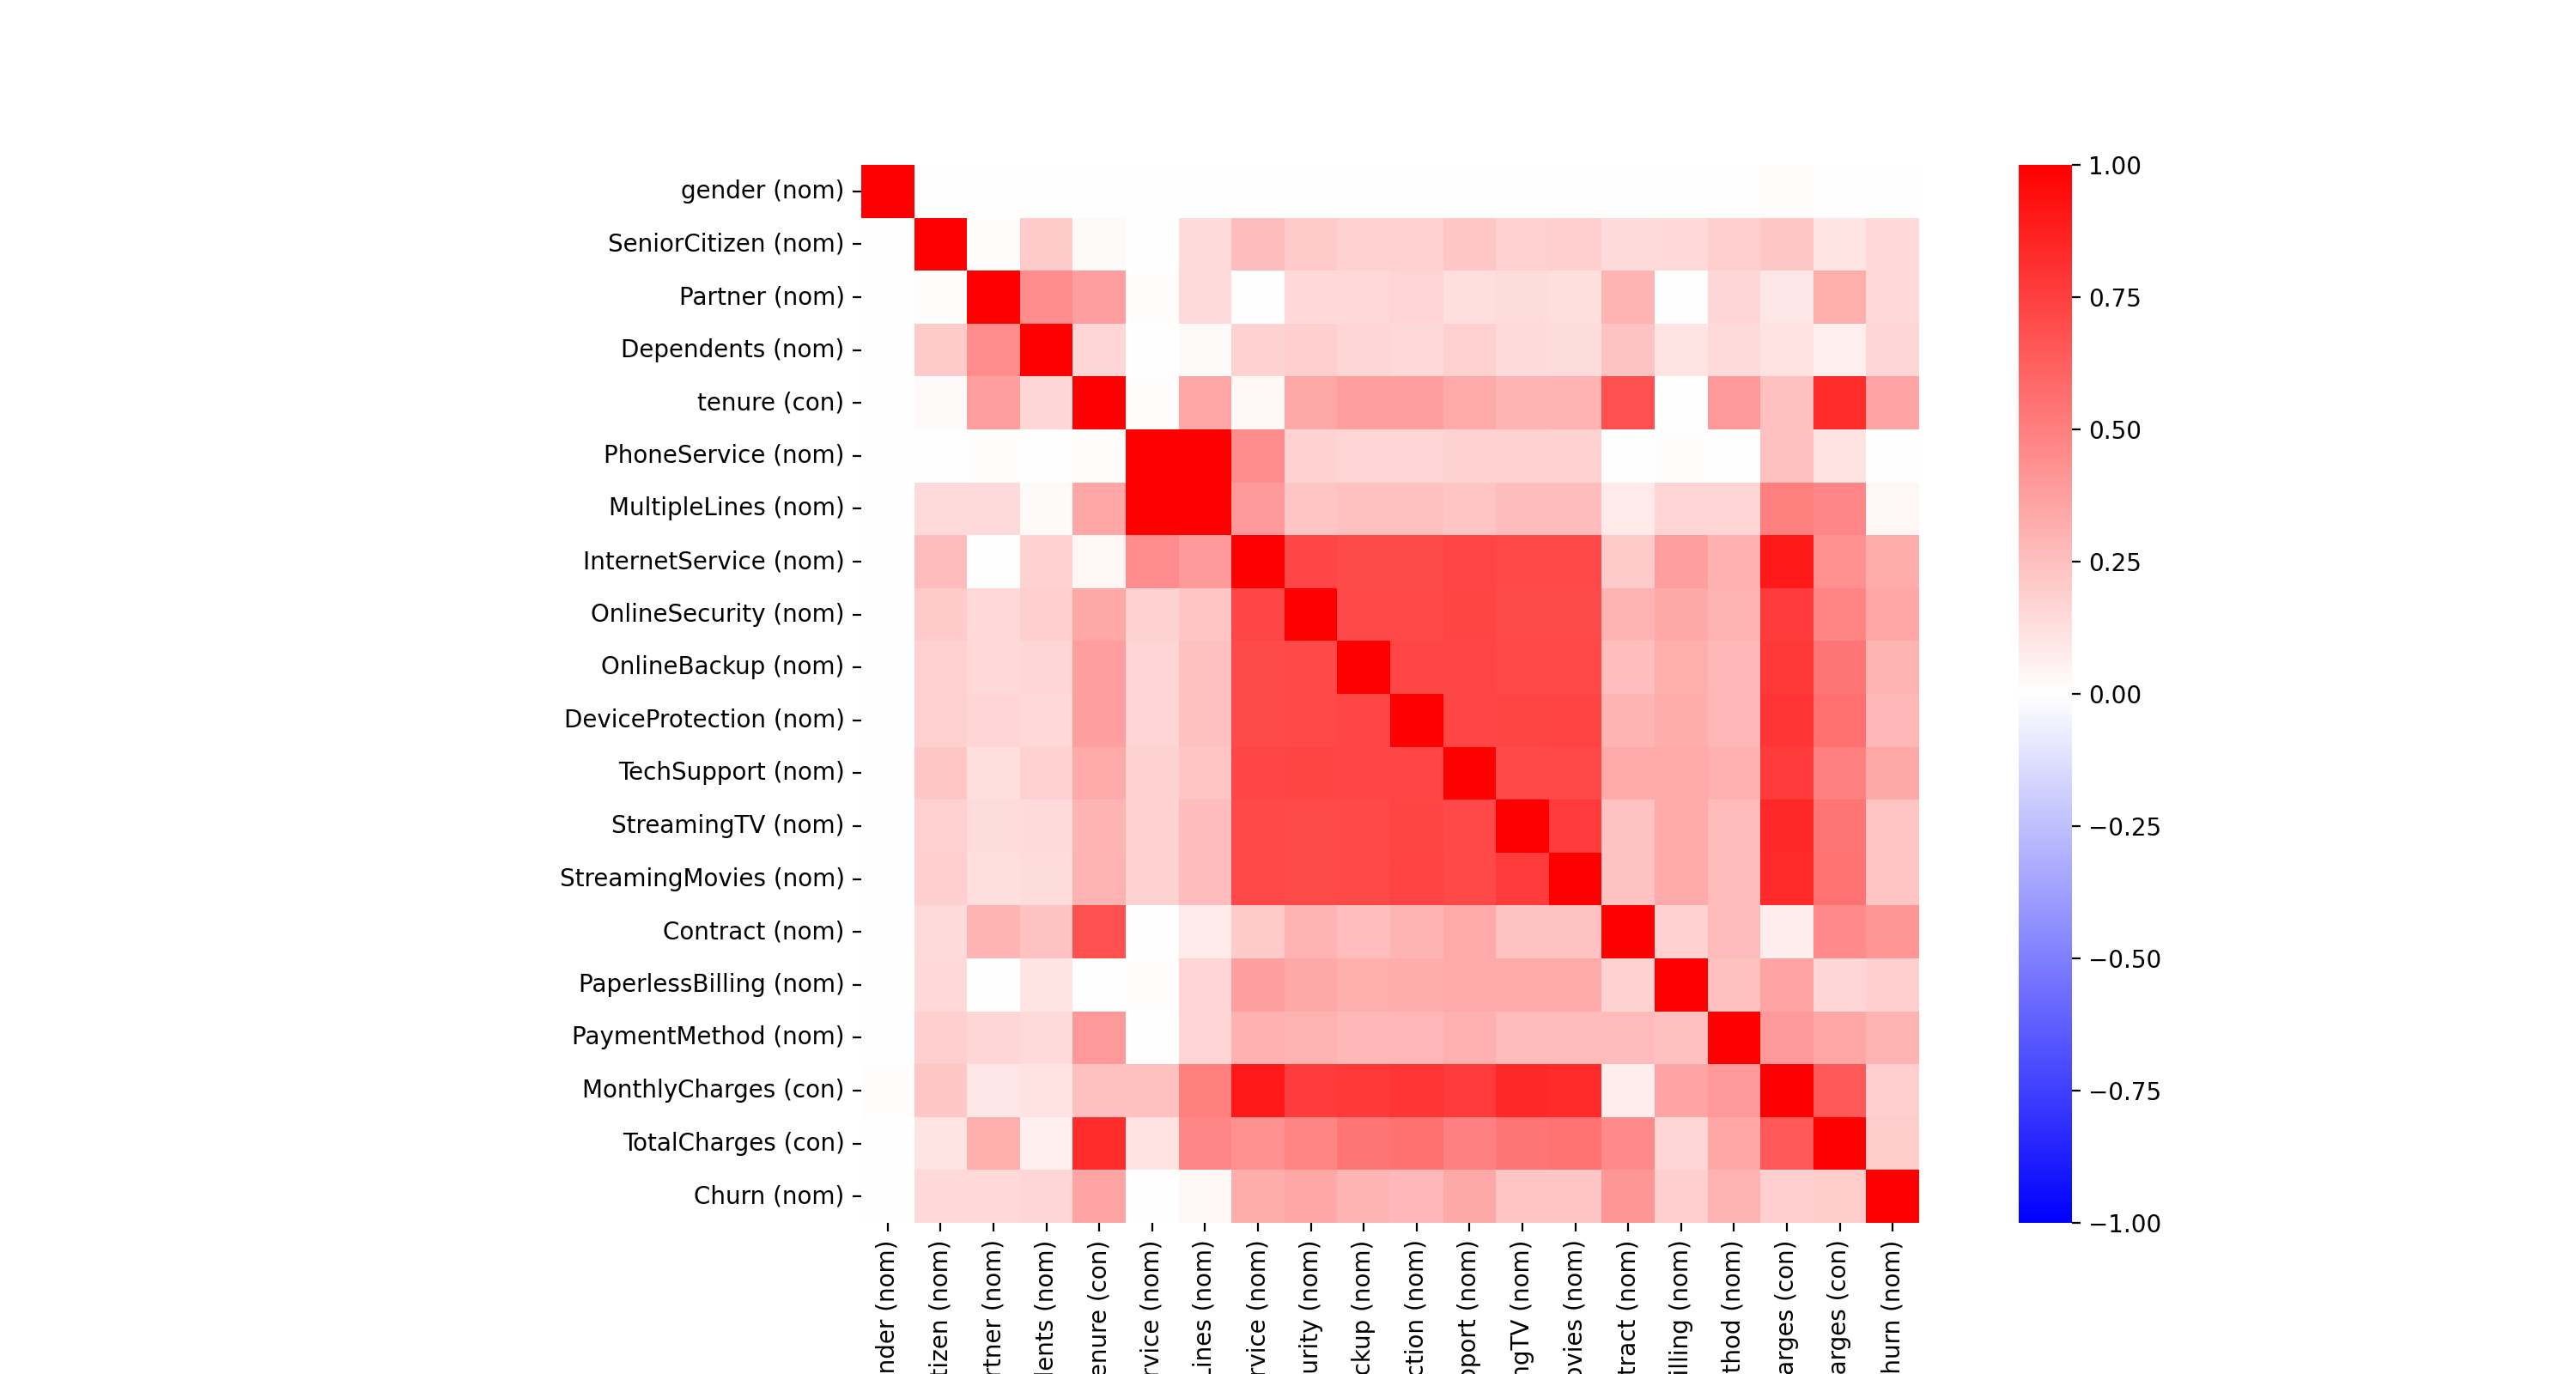

In [651]:
# Plot para matriz de correlacion, verifica todo tipo de correlaciones.
nominal.associations(df, figsize=(15,8), mark_columns=True, cmap='bwr', annot=False);
## Pearson's R for continuous-continuous cases 
## Correlation Ratio for categorical-continuous cases
## Cramer's V or Theil's U for categorical-categorical cases

#Liberar memoria
free_mem()

<h2> Exploracion de datos </h2>

Churn
No     5163
Yes    1869
Name: count, dtype: int64


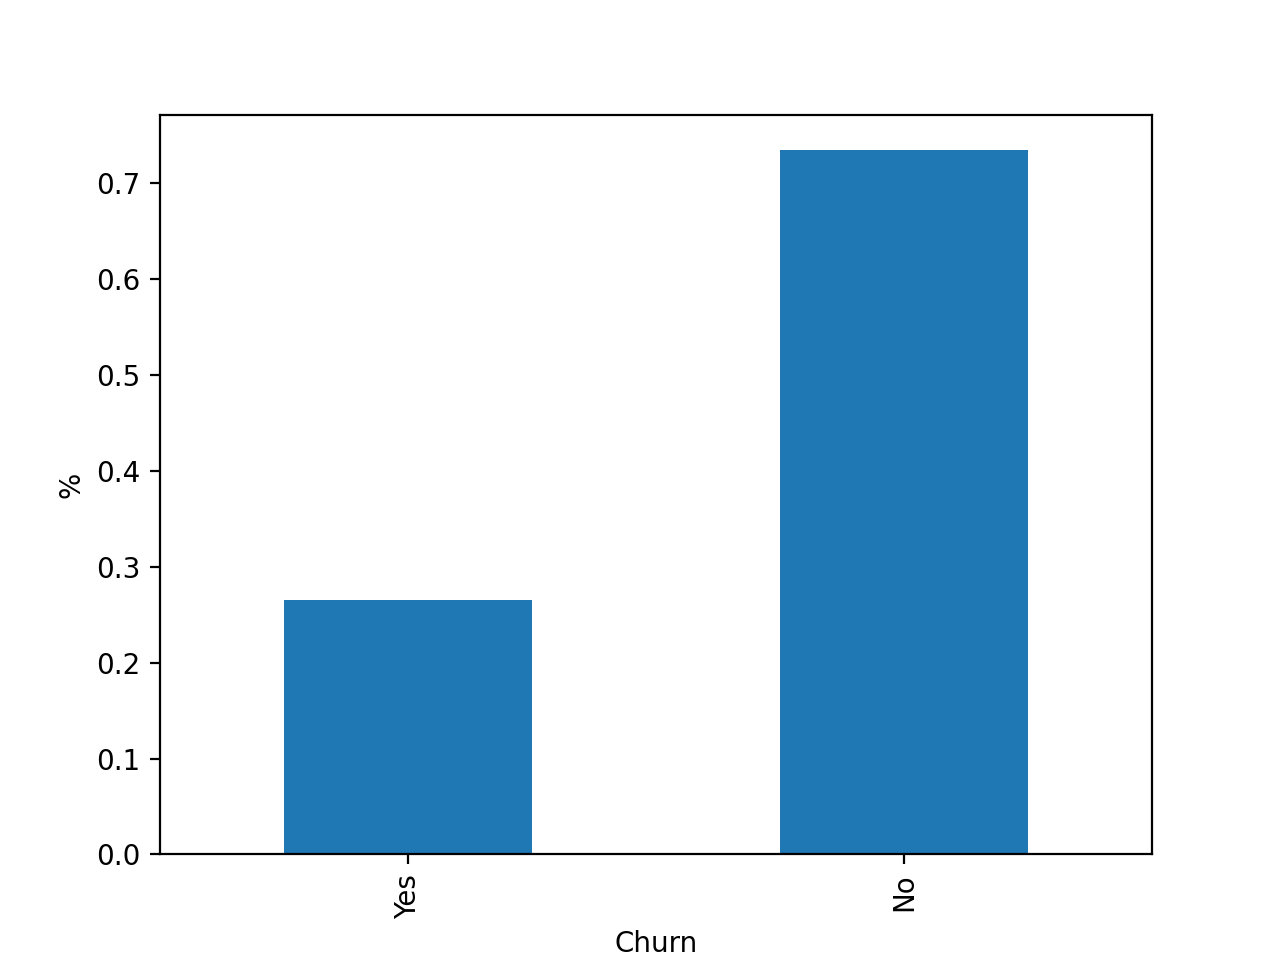

In [652]:
#Revision Variable de estudio
print(df['Churn'].value_counts())
df['Churn'].value_counts(normalize=True).sort_values().plot(title='', kind='bar', ylabel='%')
plt.savefig('recid.png')

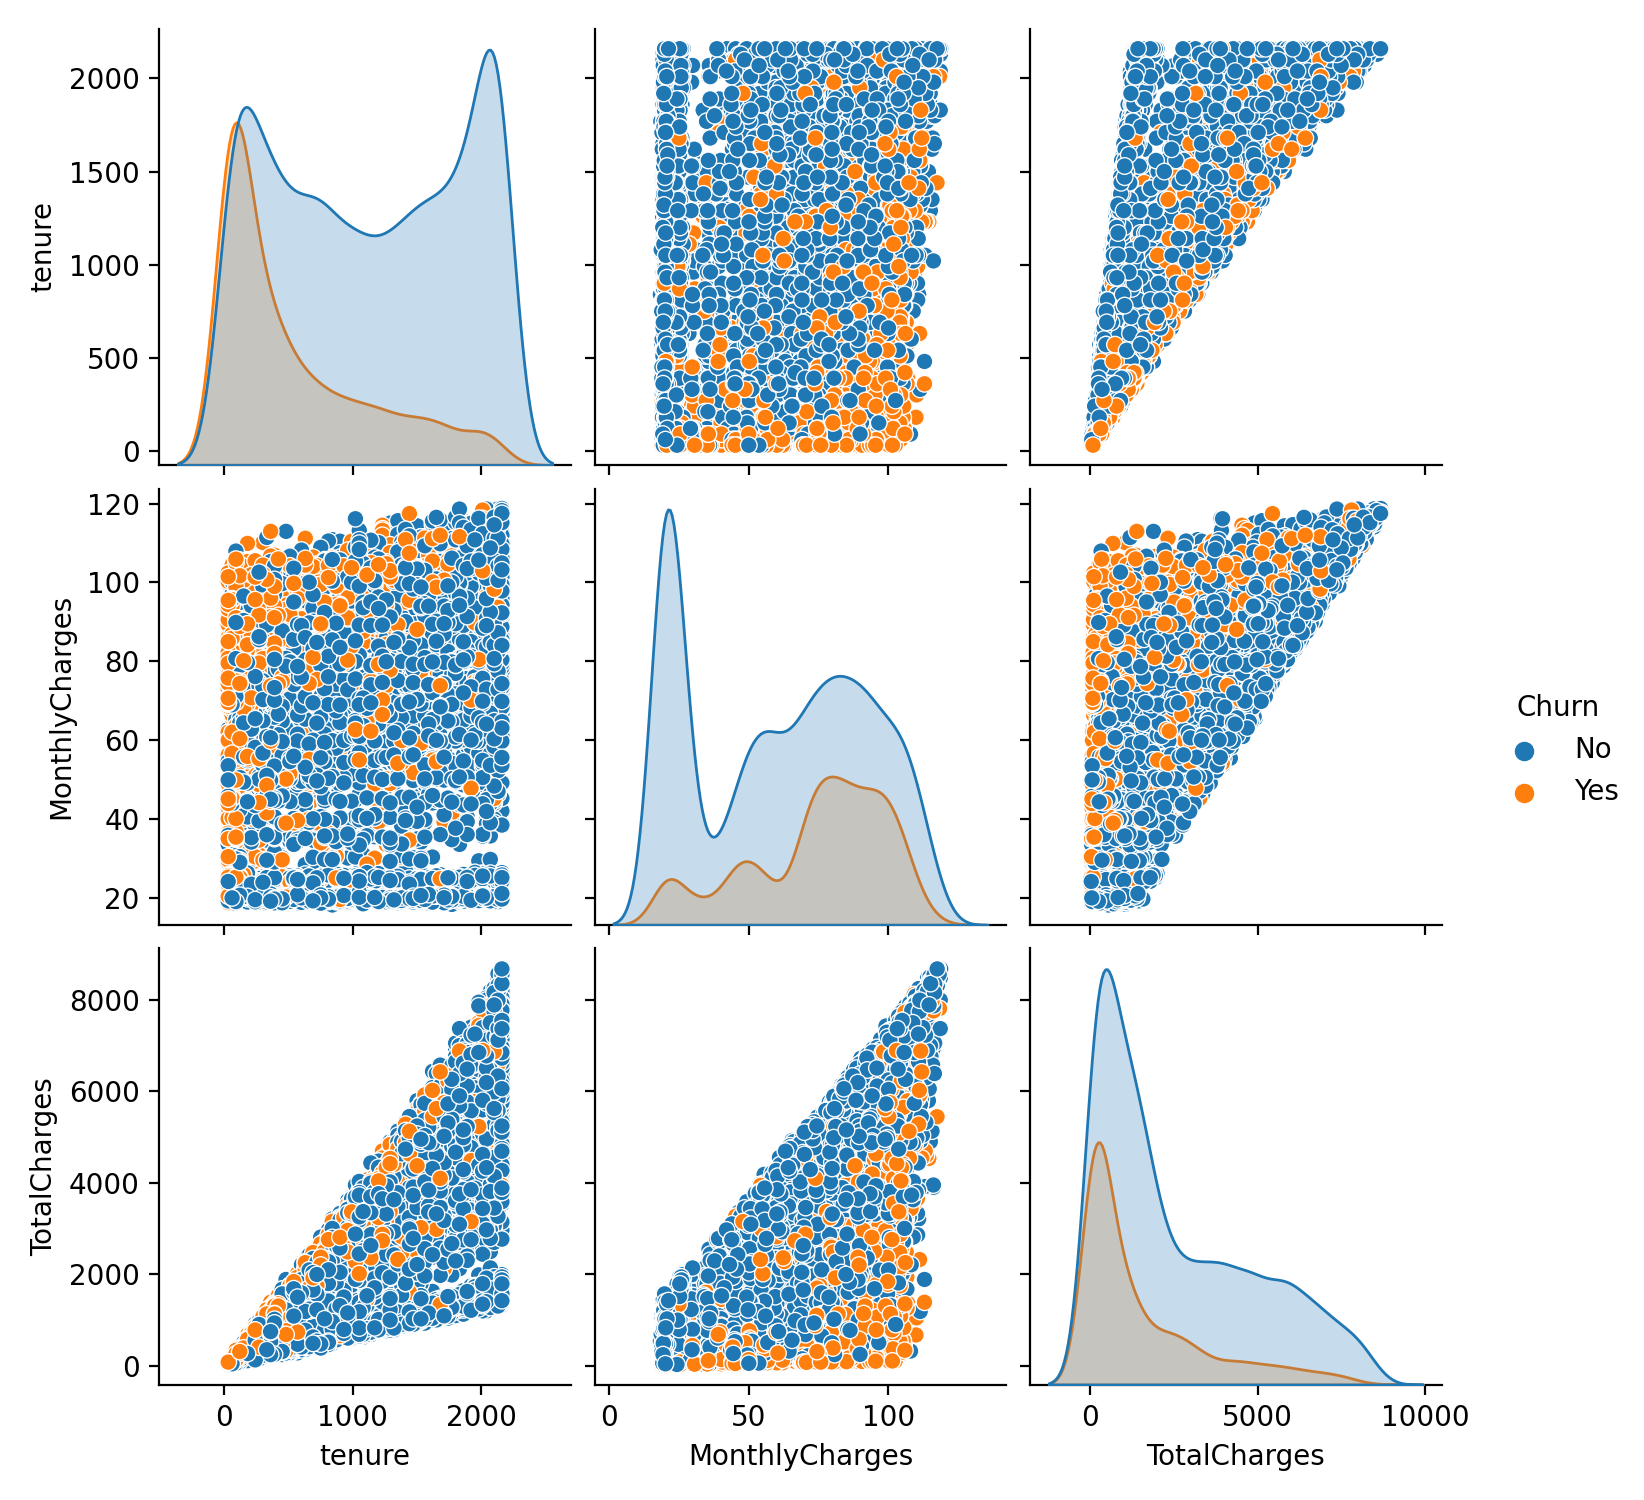

In [653]:
#Plotting the pair plots para variables numericas.
sns.pairplot(data=df,hue='Churn')

In [654]:
#Plotting boxplot  Tenure: aquellos clientes con mayor tiempo en la compañia tienen menos probabilidades de fuga
fig =px.box(data_frame=df,y='tenure',x='Churn',color='Churn')
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [655]:
## Revisamos variables "MonthlyCharges" y "TotalCharges" para ver si estan muy correlacionadas.
# tienen una correlacion positiva, y podemos ver que en aquellos cobros mas altos existe mas probabilidad de fuga.

#Revision TotalCharges total cargos
fig = px.box(data_frame=df,y='TotalCharges',x='Churn',color='Churn')
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [656]:
#Revision MonthlyCharges cargos mensuales
fig = px.box(data_frame=df,y='MonthlyCharges',x='Churn',color='Churn')
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

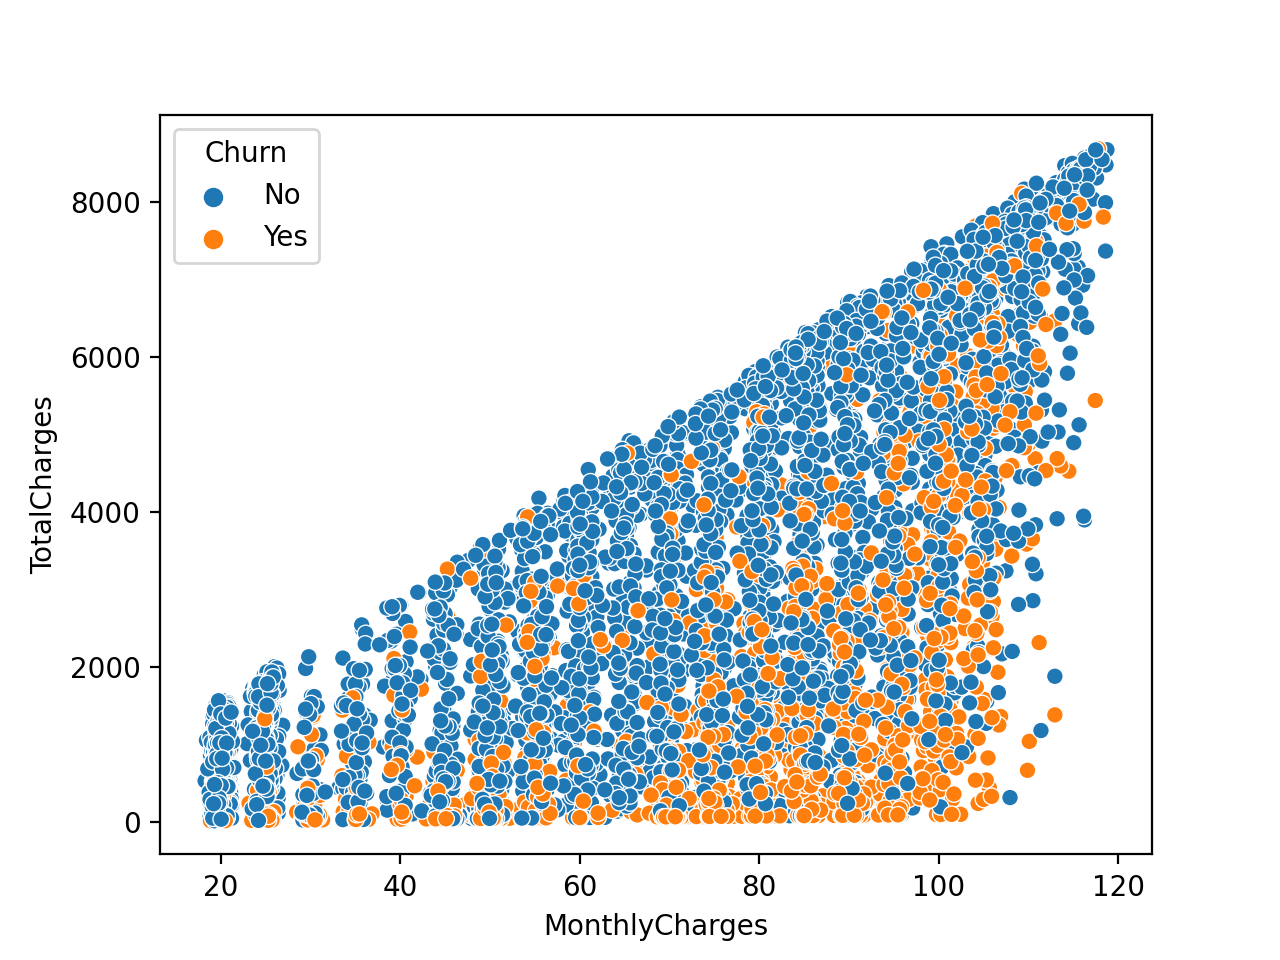

In [657]:

sns.scatterplot(data=df, x="MonthlyCharges", y="TotalCharges", hue='Churn')

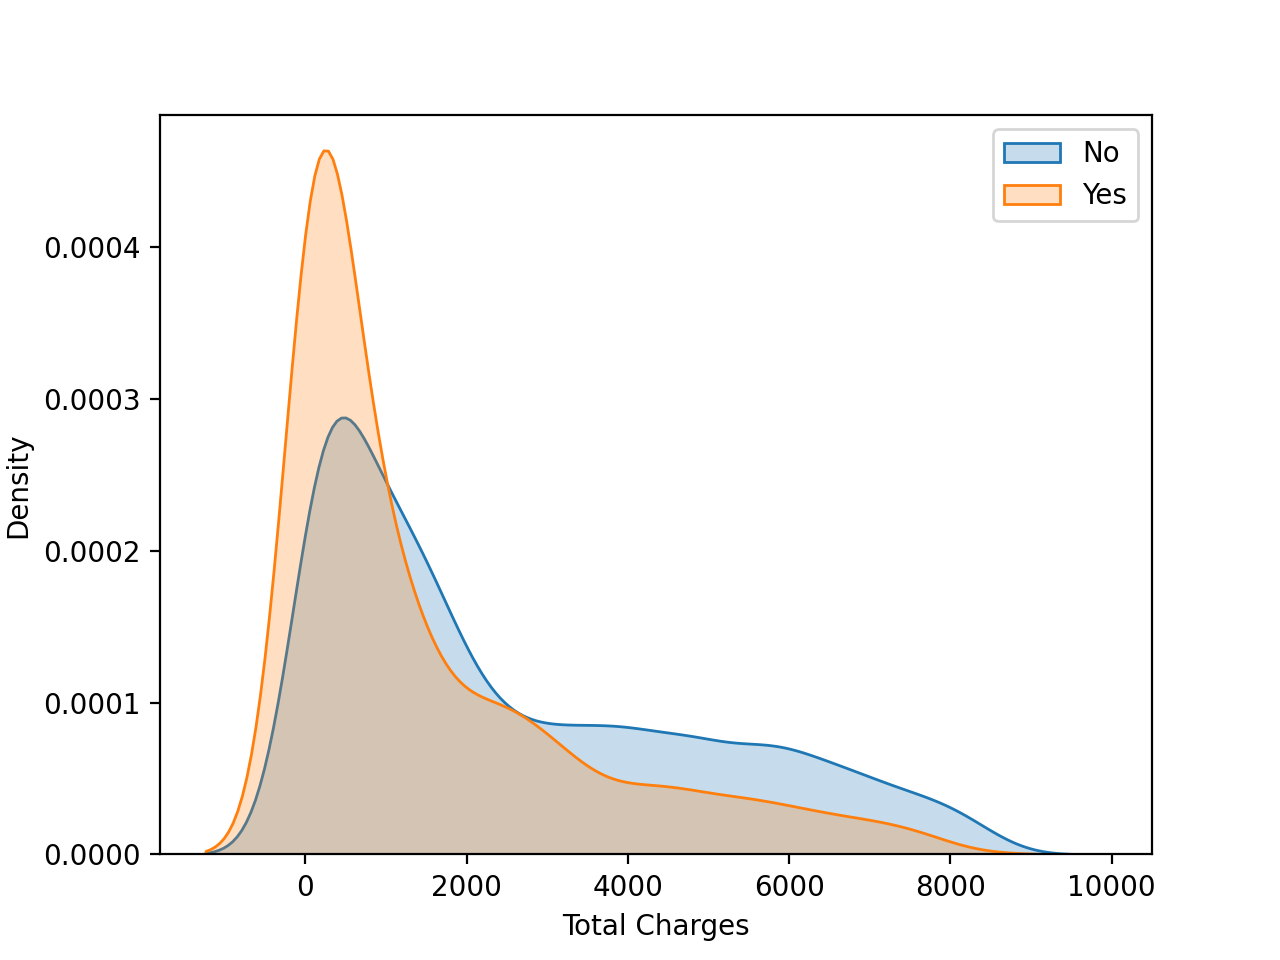

In [658]:
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No') ],
                shade = True);
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes') ],
                 shade= True);
ax.legend(["No","Yes"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');


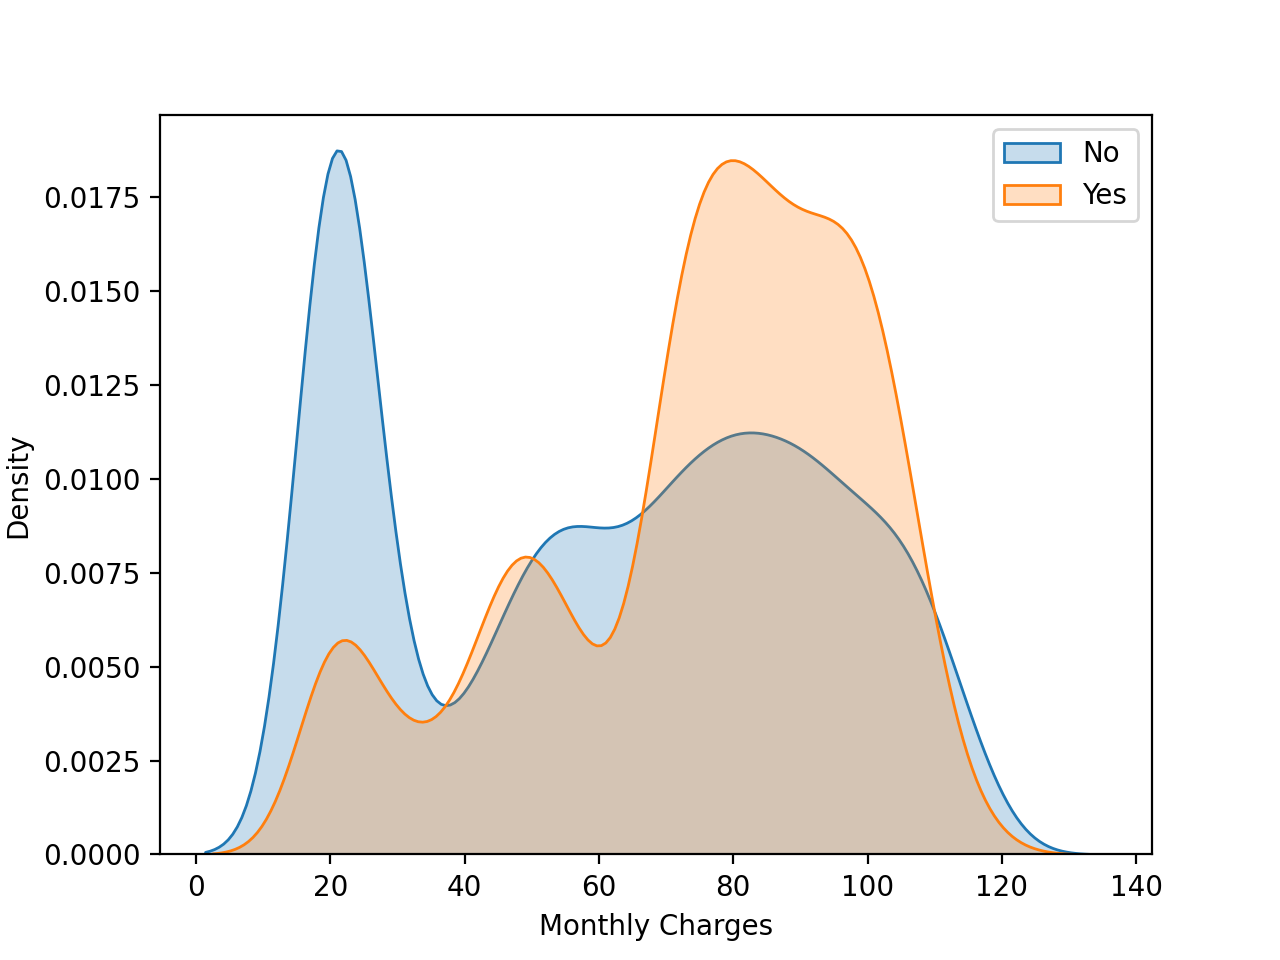

In [659]:
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                 shade = True);
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
                shade= True);
ax.legend(["No","Yes"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');


In [567]:
# Vemos que la mayor parte de las fugas se encunetra en quellos con contrato mensual.
fig = px.histogram(df, x="Contract", color="Churn", barmode="group", )
fig.update_layout(width=700, height=500, bargap=0.1)

fig.show()

In [568]:

# Vemos que las personas con apgo automatico tienen menos probabilidades de fuga
fig = px.histogram(df, x="PaymentMethod", color="Churn", barmode="group")
fig.update_layout(width=700, height=500, bargap=0.1)

fig.show()

In [569]:
# Vemos que las personas que tienen contratato fibra optica tienen una proporcion mayor de fugas, podria ser por un mal servicio.
fig = px.histogram(df, x="InternetService", color="Churn", barmode="group")
fig.update_layout(width=700, height=500, bargap=0.1)

fig.show()

In [570]:
# aquellas personas sin soporte tecnico tienen mas probabilidades de fuga
fig = px.histogram(df, x="TechSupport", color="Churn", barmode="group")
fig.update_layout(width=700, height=500, bargap=0.1)

fig.show()

In [571]:
#Liberar memoria
free_mem()



<h2> Preparación Datos para modelos </h2>

In [572]:
#pasar variable Y a dicotomica.
df['Churn'] = df['Churn'].apply(lambda x: 0 if x=='No' else 1)

# Dejamos 0 en caso que sea femenino y 1 para hombres
df['gender'] = df['gender'].apply(lambda x: 0 if x=='Female' else 1)

# Dejamos 0 en caso que sea No y 1 para si
df['Partner'] = df['Partner'].apply(lambda x: 0 if x=='No' else 1)

# Dejamos 0 en caso que sea No y 1 para si
df['PhoneService'] = df['PhoneService'].apply(lambda x: 0 if x=='No' else 1)

# Dejamos 0 en caso que sea No y 1 para si
df['Dependents'] = df['Dependents'].apply(lambda x: 0 if x=='No' else 1)


# Dejamos 0 en caso que sea No y 1 para si
df['PaperlessBilling'] = df['PaperlessBilling'].apply(lambda x: 0 if x=='No' else 1)




In [573]:
#Revisamos las variables y se determino que las respuestas "No phone service" 
# en ninguno de los casos era estadisticamente significativas y que ademas esa opcion era recogida en otra 
# caracteristica la eliminamos y pasa a ser como respuesta NO


# Dejamos 0 en caso que sea No y 1 para si
df['MultipleLines'] = df['MultipleLines'].apply(lambda x: 1 if x=='Yes' else 0)
print(df['MultipleLines'].value_counts())

# Dejamos 0 en caso que sea No y 1 para si
df['OnlineBackup'] = df['OnlineBackup'].apply(lambda x: 1 if x=='Yes' else 0)
print(df['OnlineBackup'].value_counts())

# Dejamos 0 en caso que sea No y 1 para si
df['OnlineSecurity'] = df['OnlineSecurity'].apply(lambda x: 1 if x=='Yes' else 0)
print(df['OnlineSecurity'].value_counts())

# Dejamos 0 en caso que sea No y 1 para si
df['DeviceProtection'] = df['DeviceProtection'].apply(lambda x: 1 if x=='Yes' else 0)
print(df['DeviceProtection'].value_counts())


# Dejamos 0 en caso que sea No y 1 para si
df['TechSupport'] = df['TechSupport'].apply(lambda x: 1 if x=='Yes' else 0)
print(df['TechSupport'].value_counts())

# Dejamos 0 en caso que sea No y 1 para si
df['StreamingTV'] = df['StreamingTV'].apply(lambda x: 1 if x=='Yes' else 0)
print(df['StreamingTV'].value_counts())

# Dejamos 0 en caso que sea No y 1 para si
df['StreamingMovies'] = df['StreamingMovies'].apply(lambda x: 1 if x=='Yes' else 0)
print(df['StreamingMovies'].value_counts())



MultipleLines
0    4065
1    2967
Name: count, dtype: int64
OnlineBackup
0    4607
1    2425
Name: count, dtype: int64
OnlineSecurity
0    5017
1    2015
Name: count, dtype: int64
DeviceProtection
0    4614
1    2418
Name: count, dtype: int64
TechSupport
0    4992
1    2040
Name: count, dtype: int64
StreamingTV
0    4329
1    2703
Name: count, dtype: int64
StreamingMovies
0    4301
1    2731
Name: count, dtype: int64


In [574]:
df.head()

gender SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0             0        1           0      30             0   
1       1             0        0           0    1020             1   
2       1             0        0           0      60             1   
3       1             0        0           0    1350             0   
4       0             0        0           0      60             1   

   MultipleLines InternetService  OnlineSecurity  OnlineBackup  \
0              0             DSL               0             1   
1              0             DSL               1             0   
2              0             DSL               1             1   
3              0             DSL               1             0   
4              0     Fiber optic               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  \
0                 0            0            0                0   
1                 1            0            0                0   
2                 0            0            0                0   
3                 1            1            0                0   
4                 0            0            0                0   

         Contract  PaperlessBilling              PaymentMethod  \
0  Month-to-month                 1           Electronic check   
1        One year                 0               Mailed check   
2  Month-to-month                 1               Mailed check   
3        One year                 0  Bank transfer (automatic)   
4  Month-to-month                 1           Electronic check   

   MonthlyCharges  TotalCharges  
0           29.85         29.85  
1           56.95       1889.50  
2           53.85        108.15  
3           42.30       1840.75  
4           70.70        151.65

In [575]:
df.shape

(7032, 19)

In [576]:
# Creamos variables Dummies Para TechSupport
#var_Dummies = pd.get_dummies(df['TechSupport'], prefix = "TechSupport")
#df = pd.concat([df,var_Dummies], axis=1)

# Creamos variables Dummies Para StreamingTV
#var_Dummies = pd.get_dummies(df['StreamingTV'], prefix = "StreamingTV")
#df = pd.concat([df,var_Dummies], axis=1)

# Creamos variables Dummies Para StreamingMovies
#var_Dummies = pd.get_dummies(df['StreamingMovies'], prefix = "StreamingMovies")
#df = pd.concat([df,var_Dummies], axis=1)

# Creamos variables Dummies Para Contract
var_Dummies = pd.get_dummies(df['Contract'], prefix= "Contract")
df = pd.concat([df,var_Dummies], axis=1)

# Creamos variables Dummies Para PaymentMethod
var_Dummies = pd.get_dummies(df['PaymentMethod'], prefix = "PaymentMethod")
df = pd.concat([df,var_Dummies], axis=1)

# Creamos variables Dummies Para MultipleLines
#var_Dummies = pd.get_dummies(df['MultipleLines'], prefix = "MultipleLines")
#df = pd.concat([df,var_Dummies], axis=1)

# Creamos variables Dummies Para InternetService
var_Dummies = pd.get_dummies(df['InternetService'], prefix = "InternetService")
df = pd.concat([df,var_Dummies], axis=1)

# Creamos variables Dummies Para OnlineSecurity
#var_Dummies = pd.get_dummies(df['OnlineSecurity'], prefix = "OnlineSecurity")
#df = pd.concat([df,var_Dummies], axis=1)

# Creamos variables Dummies Para OnlineBackup
#var_Dummies = pd.get_dummies(df['OnlineBackup'], prefix = "OnlineBackup")
#df = pd.concat([df,var_Dummies], axis=1)

# Creamos variables Dummies Para DeviceProtection
#var_Dummies = pd.get_dummies(df['DeviceProtection'], prefix = "DeviceProtection")
#df = pd.concat([df,var_Dummies], axis=1)


In [577]:
print(df.shape)

df.head()

(7032, 29)


gender SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0             0        1           0      30             0   
1       1             0        0           0    1020             1   
2       1             0        0           0      60             1   
3       1             0        0           0    1350             0   
4       0             0        0           0      60             1   

   MultipleLines InternetService  OnlineSecurity  OnlineBackup  ...  \
0              0             DSL               0             1  ...   
1              0             DSL               1             0  ...   
2              0             DSL               1             1  ...   
3              0             DSL               1             0  ...   
4              0     Fiber optic               0             0  ...   

   Contract_Month-to-month  Contract_One year  Contract_Two year  \
0                     True              False              False   
1                    False               True              False   
2                     True              False              False   
3                    False               True              False   
4                     True              False              False   

   PaymentMethod_Bank transfer (automatic)  \
0                                    False   
1                                    False   
2                                    False   
3                                     True   
4                                    False   

  PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                 False                            True   
1                                 False                           False   
2                                 False                           False   
3                                 False                           False   
4                                 False                            True   

  PaymentMethod_Mailed check  InternetService_DSL  \
0                      False                 True   
1                       True                 True   
2                       True                 True   
3                      False                 True   
4                      False                False   

   InternetService_Fiber optic  InternetService_No  
0                        False               False  
1                        False               False  
2                        False               False  
3                        False               False  
4                         True               False  

[5 rows x 29 columns]

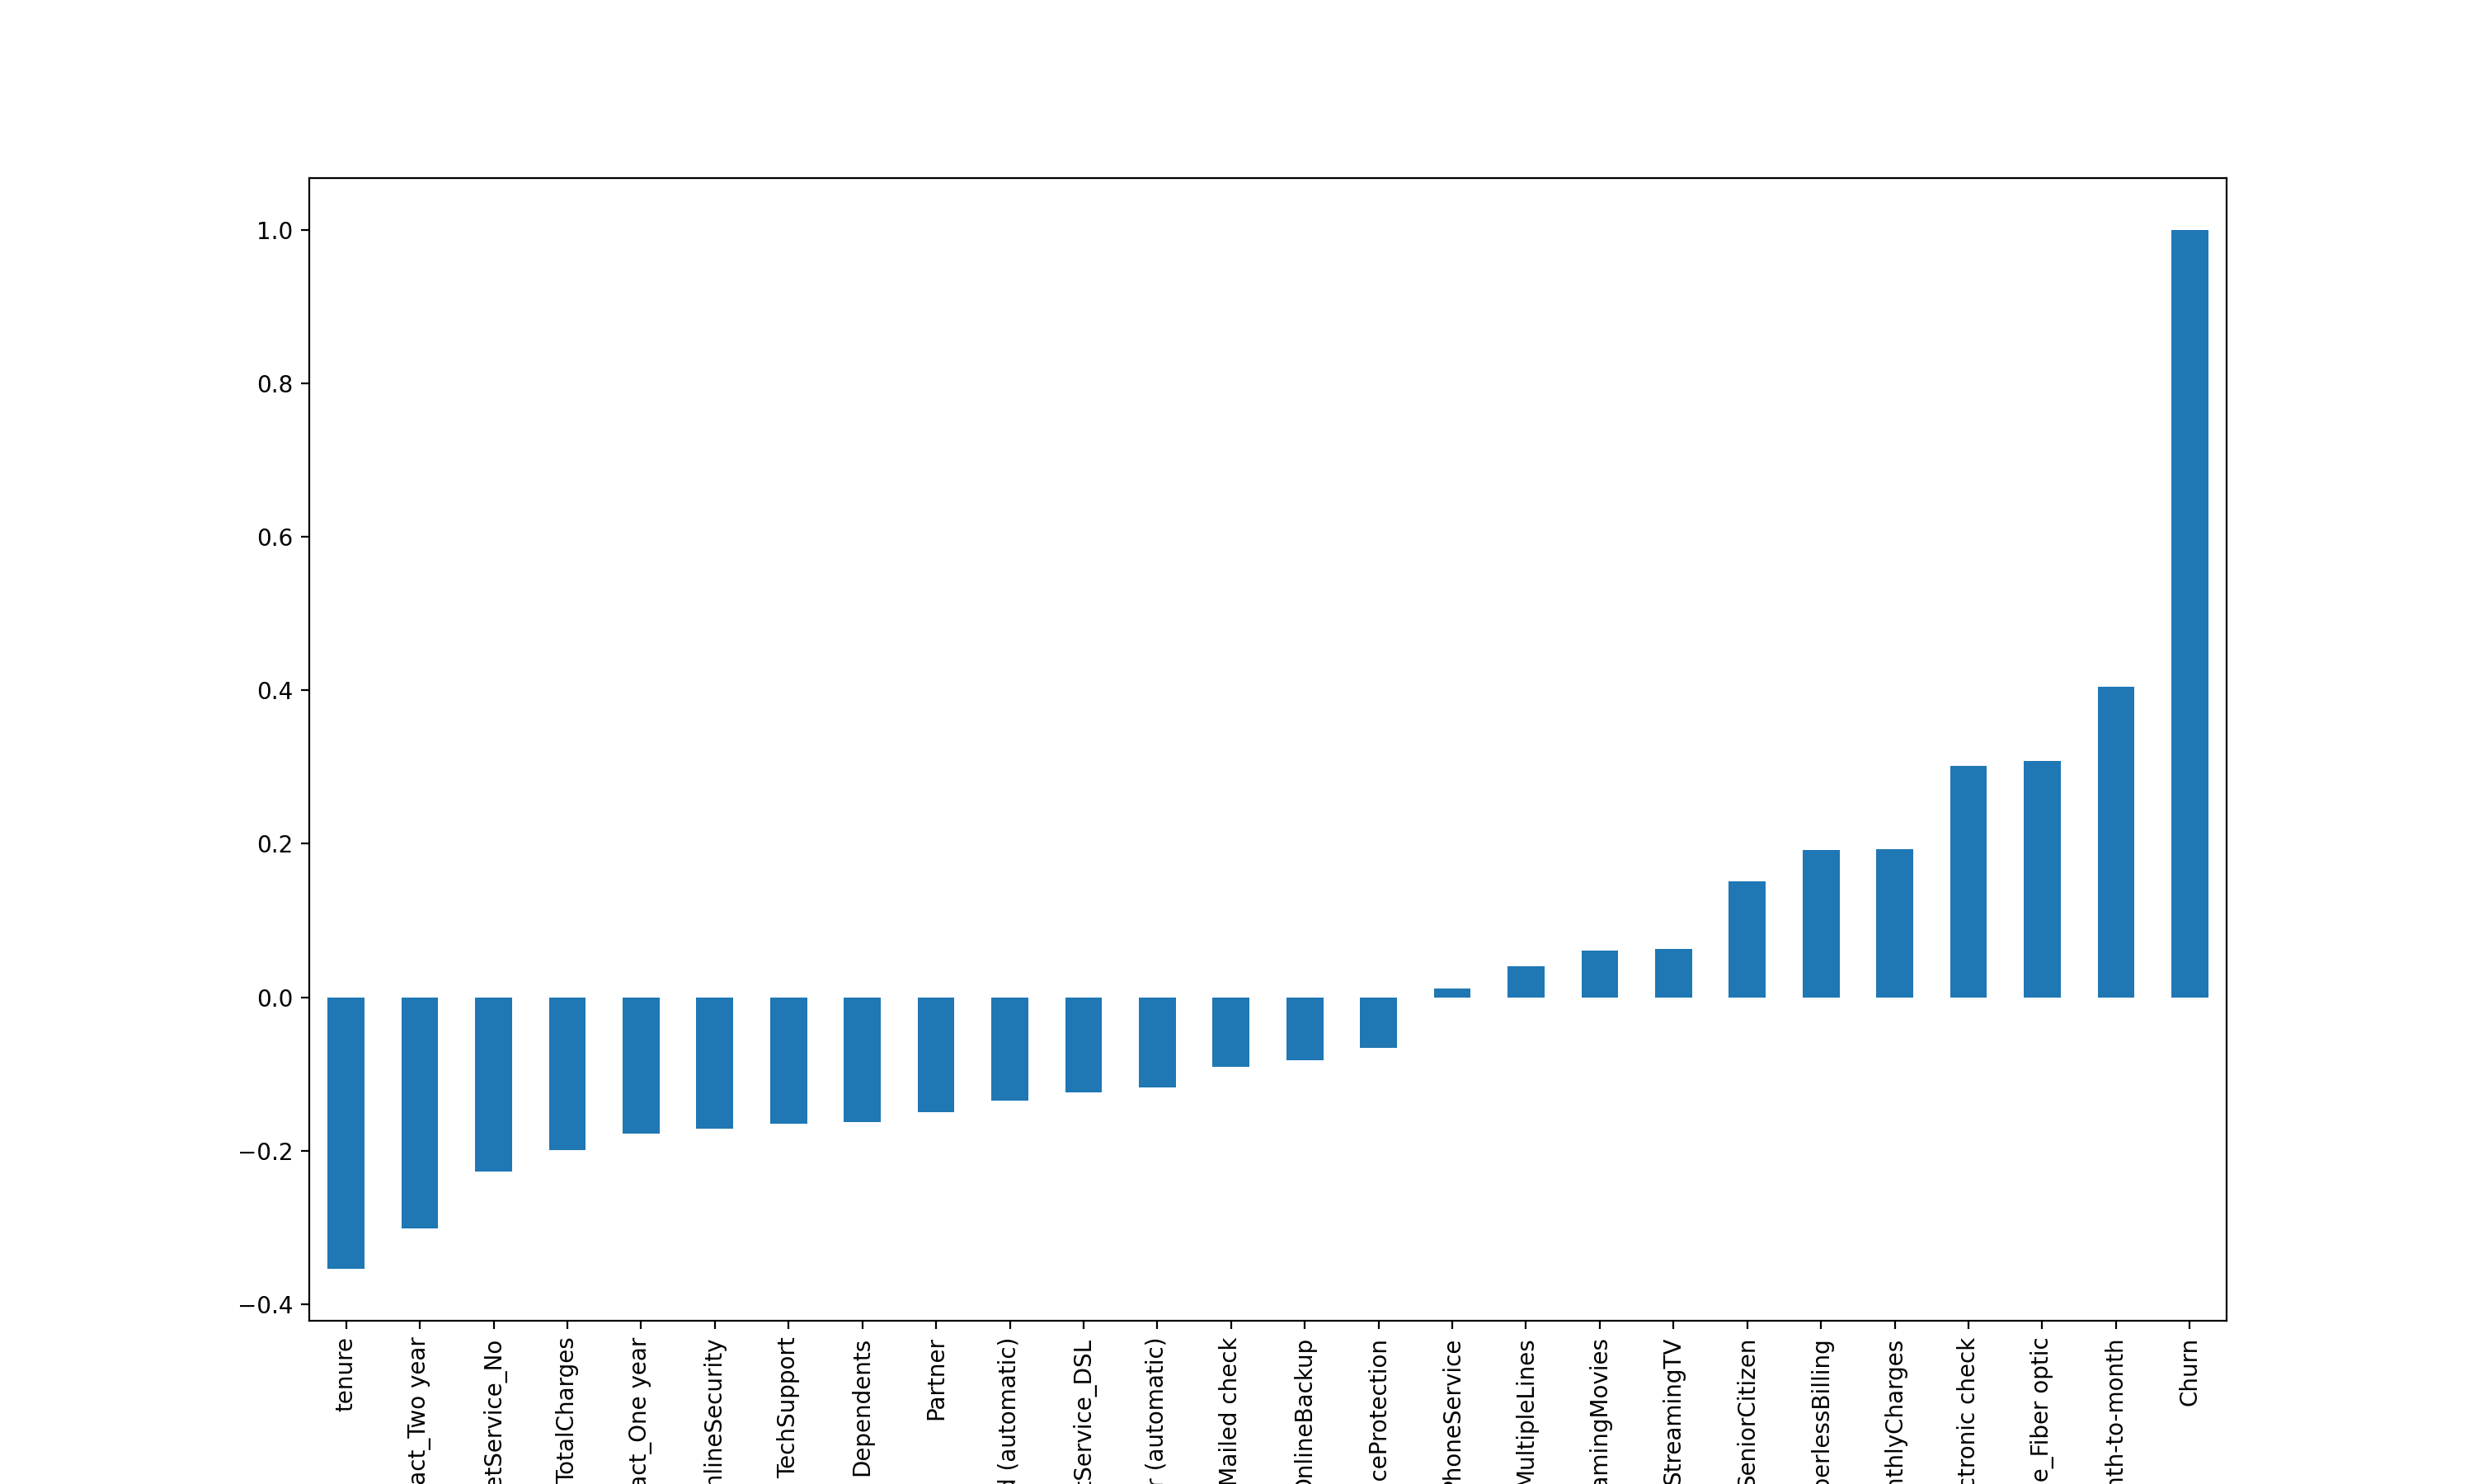

In [578]:
#Variable dependiewnte Y.
y = df['Churn']
# Vemos la correlacion inicial con la variable dependiente. nos sirve para tener una primera mirada.
fig = plt.figure(figsize=(15,9))
df_final.corr()['Churn'].sort_values(ascending=True).plot(kind='bar')
plt.show()

df_final = df_final.drop('Churn', axis = 1)

In [580]:

# 1 Seleccion de variables, todas las variables y se saca una de las dummies.


    # Seleccionamos las columnas para el modelo.

features = [ 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines',  'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 
       'MonthlyCharges', 'TotalCharges', 
       'Contract_One year', 'Contract_Two year','Contract_Month-to-month',
       'PaymentMethod_Bank transfer (automatic)','PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'InternetService_DSL','InternetService_No','InternetService_Fiber optic']


df_final = df[features]
print(df_final.shape)
  
df_final.head()

#Liberar memoria
free_mem()

(7032, 25)


In [582]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(df_final,y,test_size=0.3,random_state=0)
print('Original:\n', y_train.value_counts())
print('Original:\n', y_test.value_counts())

X_train


#Probar con OverSample.
# Dieron resultados similares en Test, por lo que no vale la pena su implementacion.
# Probamos y no tuvo mejorias significativas.
OS = 0

if (OS == 1):
 # X_train, y_train = ADASYN(sampling_strategy='auto',n_jobs=-1).fit_resample(X_train, y_train)

  X_train, y_train = SMOTE(sampling_strategy='auto',n_jobs=-1).fit_resample(X_train,y_train)
  print('\nBalanced:\n', y_train.value_counts())



## Standardizing
scale = MinMaxScaler().fit(X_train)
X_train = scale.transform(X_train)
X_test = scale.transform(X_test)
X_train

Original:
 Churn
0    3608
1    1314
Name: count, dtype: int64
Original:
 Churn
0    1555
1     555
Name: count, dtype: int64


array([[1., 1., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 1., ..., 1., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 1.],
       [0., 1., 1., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [583]:
# Inicializamos Variables.
# Cross-validation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10)

# Store f1-score
model = []
set = []
f1 = []
Acur = []
Prec = []
Rec = []

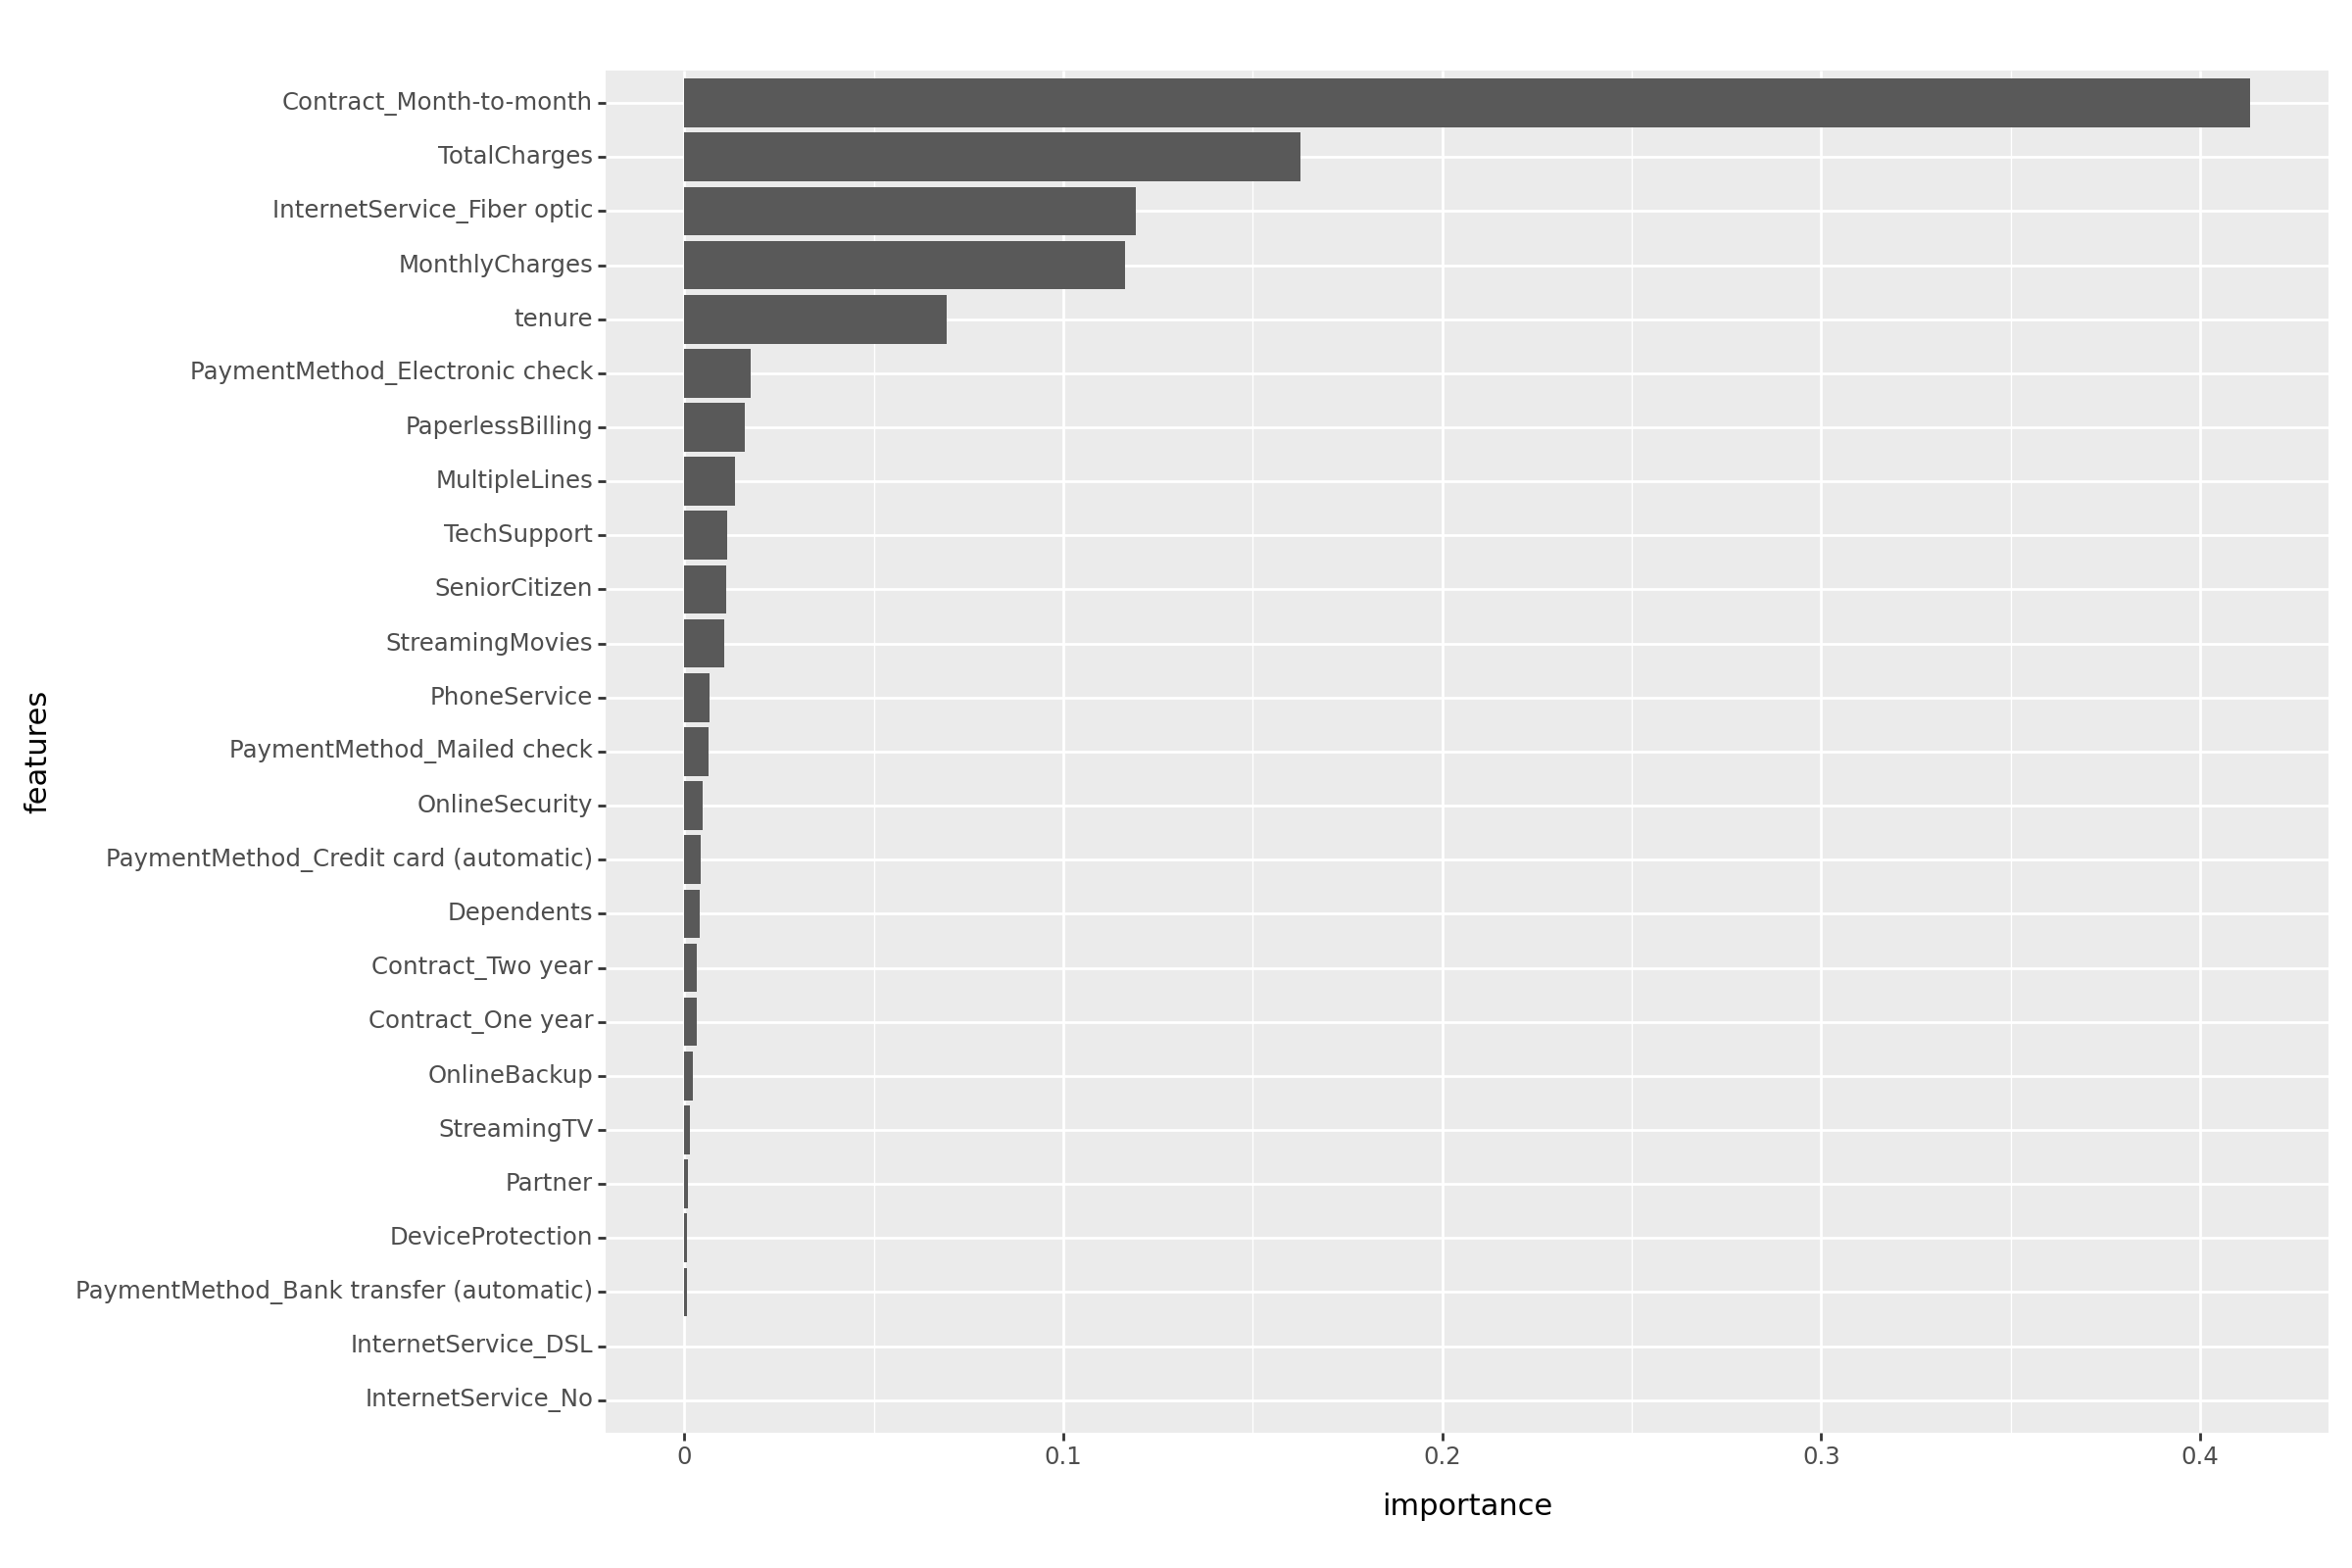

<Figure size 640x480 with 0 Axes>

In [584]:
#Seleccion de variables con Decision treee
X_train = pd.DataFrame(X_train, columns=features)
X_test = pd.DataFrame(X_test, columns=features)
# Performance (train) -----------------------


model_tree = DecisionTreeClassifier(criterion='gini', max_depth=7)

# Model fitting
model_tree.fit(X_train, y_train)

# Feature importance -------------------

importance = pd.DataFrame({'features': X_train.columns.values, 'importance' : model_tree.feature_importances_})
importance_order = importance.sort_values('importance', ascending=True)['features'].to_list()

print(ggplot(importance, aes(x='features', y='importance')) + scale_x_discrete(limits=importance_order) 
    + geom_col() + coord_flip() + theme(figure_size=(12, 8) )
)

plt.savefig("Sel_feat_imp_rf.png")

Sel_Variables = False
# Probamos y no tuvo mejorias significativas.
if Sel_Variables:
     features = ['SeniorCitizen', 'tenure',
                'MultipleLines','TechSupport', 'StreamingMovies', 'PaperlessBilling',  
                'MonthlyCharges', 'TotalCharges', 'Contract_One year',
                'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
                'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
                'InternetService_DSL', 'InternetService_No'
                ]


<h2> Entrenamiento de modelos </h2>

## Logit

In [586]:
# Cross Validate
model_logit = LogisticRegression(random_state=0)
hp = {'penalty':['none']}
grid = GridSearchCV(model_logit, hp, cv = cv, scoring=['accuracy', 'f1', 'precision', 'recall'], refit="f1", return_train_score=True)
grid.fit(X_train, y_train)

grid_results_logr=grid.cv_results_
print(f'Optimal parameters: {grid.best_params_}')
print('Train f1-score: %.4f' % grid.score(X_train, y_train))
print('Test f1-score: %.4f' % grid.score(X_test, y_test))

Optimal parameters: {'penalty': 'none'}
Train f1-score: 0.6085
Test f1-score: 0.5897


              precision    recall  f1-score   support

           0       0.85      0.90      0.87      3608
           1       0.67      0.56      0.61      1314

    accuracy                           0.81      4922
   macro avg       0.76      0.73      0.74      4922
weighted avg       0.80      0.81      0.80      4922



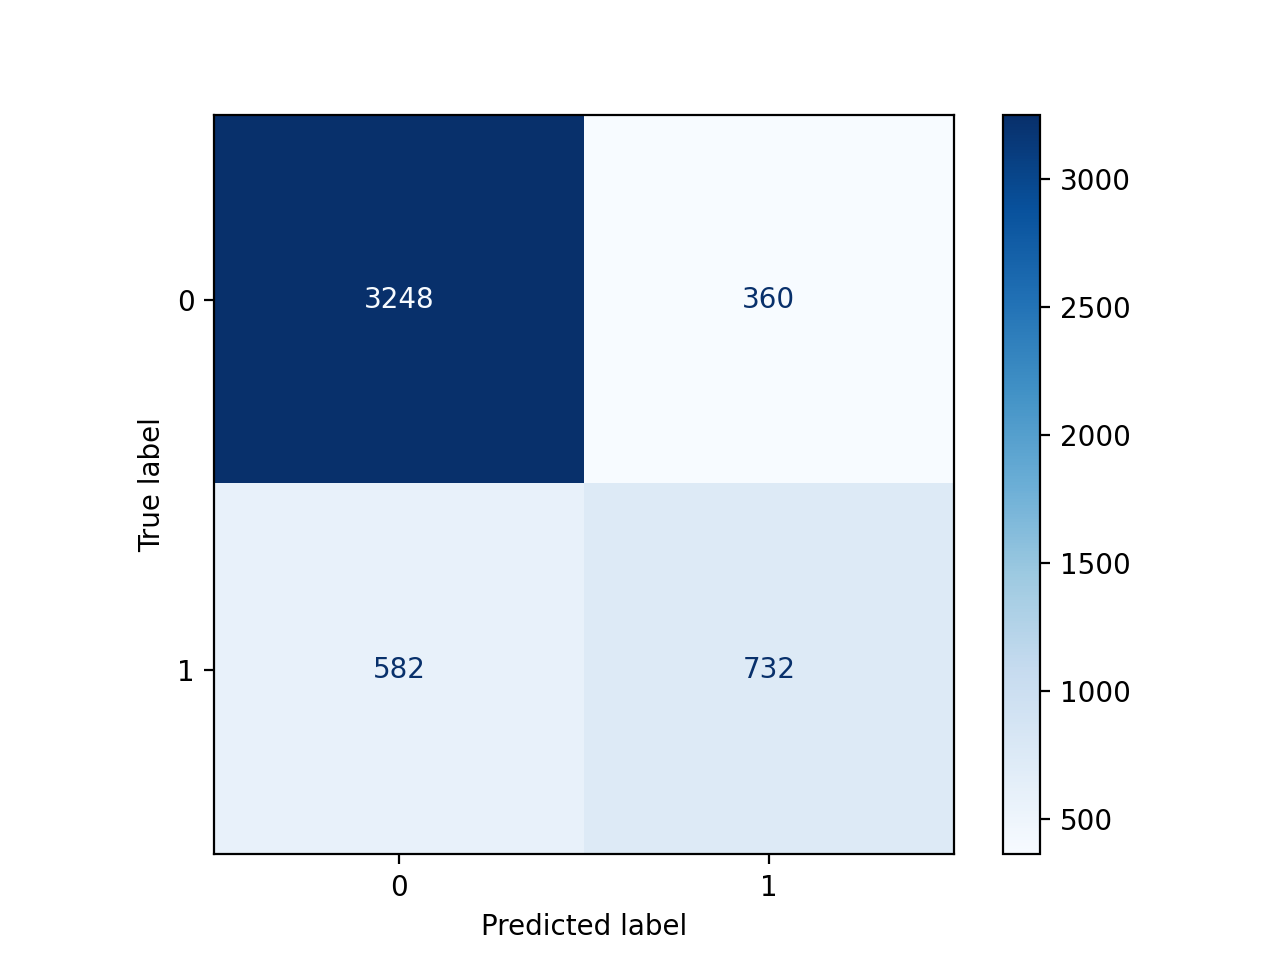

In [588]:
# Performance (train) --------------------------------
# Fitting
model_logit = LogisticRegression(penalty='none', random_state=0) 
model_logit.fit(X_train, y_train)

# Predictions
pred = model_logit.predict(X_train)

# Confusion matrix
cm = confusion_matrix(y_true=y_train, y_pred=pred)
ConfusionMatrixDisplay(cm).plot(cmap='Blues')


# Scores
print(classification_report(y_true=y_train, y_pred=pred))

model.append('logit')
set.append('train')
f1.append(round(f1_score(y_true=y_train, y_pred=pred),4))
Acur.append(round(accuracy_score(y_true=y_train, y_pred=pred),4))
Prec.append(round(precision_score(y_true=y_train, y_pred=pred),4))
Rec.append(round(recall_score(y_true=y_train, y_pred=pred),4))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1555
           1       0.65      0.54      0.59       555

    accuracy                           0.80      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.79      0.80      0.80      2110



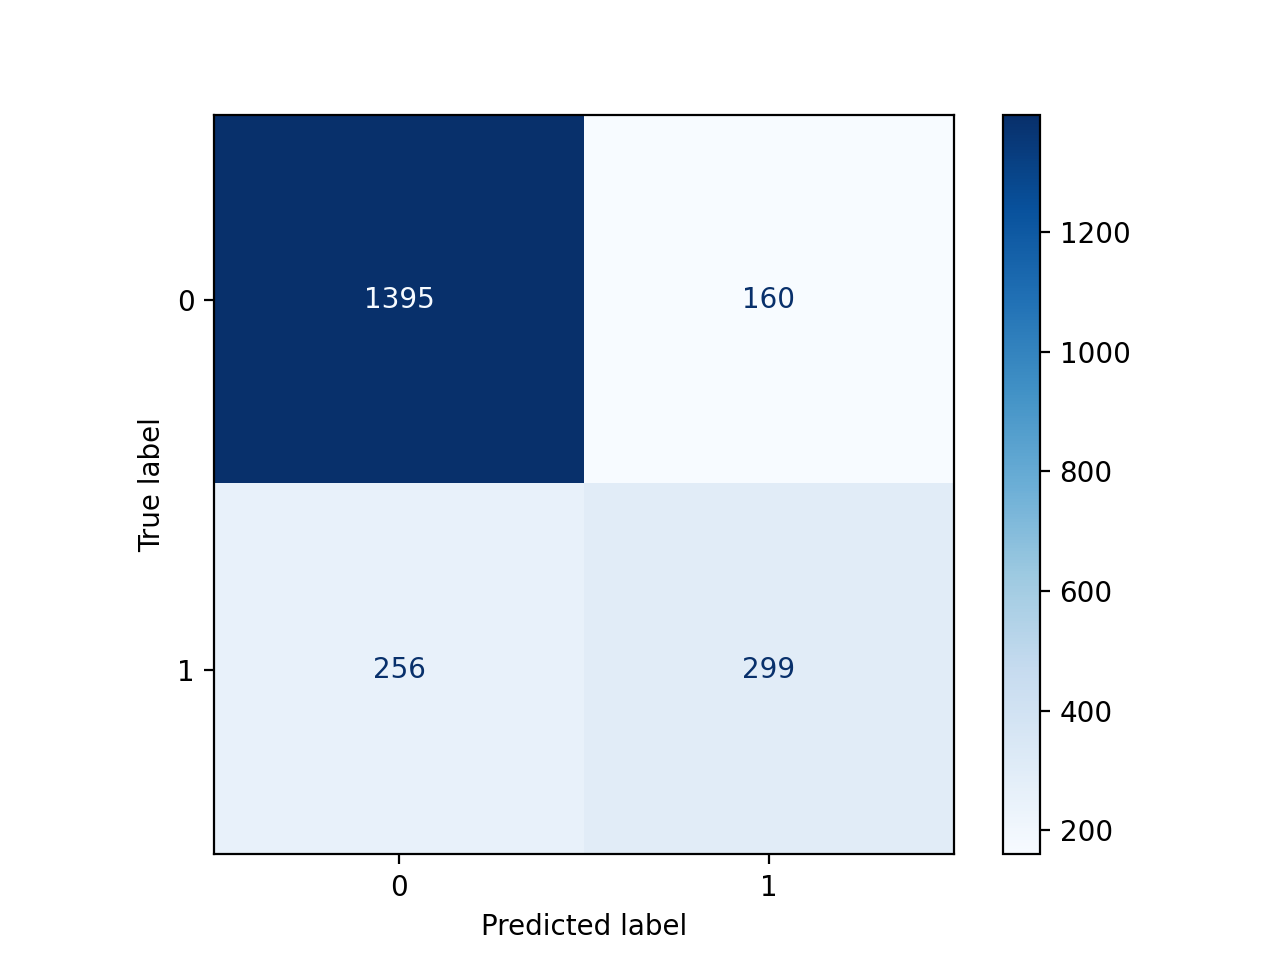

In [589]:
# Performance (test) ---------------------------
# Predictions
pred = model_logit.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_true=y_test, y_pred=pred)
ConfusionMatrixDisplay(cm).plot(cmap='Blues')


# Scores
print(classification_report(y_true=y_test, y_pred=pred))
model.append('logit')
set.append('train')
f1.append(round(f1_score(y_true=y_test, y_pred=pred),4))
Acur.append(round(accuracy_score(y_true=y_test, y_pred=pred),4))
Prec.append(round(precision_score(y_true=y_test, y_pred=pred),4))
Rec.append(round(recall_score(y_true=y_test, y_pred=pred),4))

In [590]:
# Building ROC curve and AUC -------------------------
# Random classifier
RC = [0 for _ in range(len(y_train))]
RC_auc = roc_auc_score(y_train, RC)
RC_fpr, RC_tpr, _ = roc_curve(y_train, RC)

# Logit-train
## Probabilities of positive class
prob = model_logit.predict_proba(X_train)
prob_train_log=prob
prob = prob[:, 1]

## AUC
logit_auc_train = roc_auc_score(y_train, prob)

## ROC curve
logit_fpr_train, logit_tpr_train, logit_thresholds_train = roc_curve(y_train, prob)

## Logit-test
## Probabilities of positive class
prob = model_logit.predict_proba(X_test)
prob_test_log=prob
prob = prob[:, 1]

## AUC
logit_auc_test = roc_auc_score(y_test, prob)

## ROC curve
logit_fpr_test, logit_tpr_test, logit_thresholds_test = roc_curve(y_test, prob)

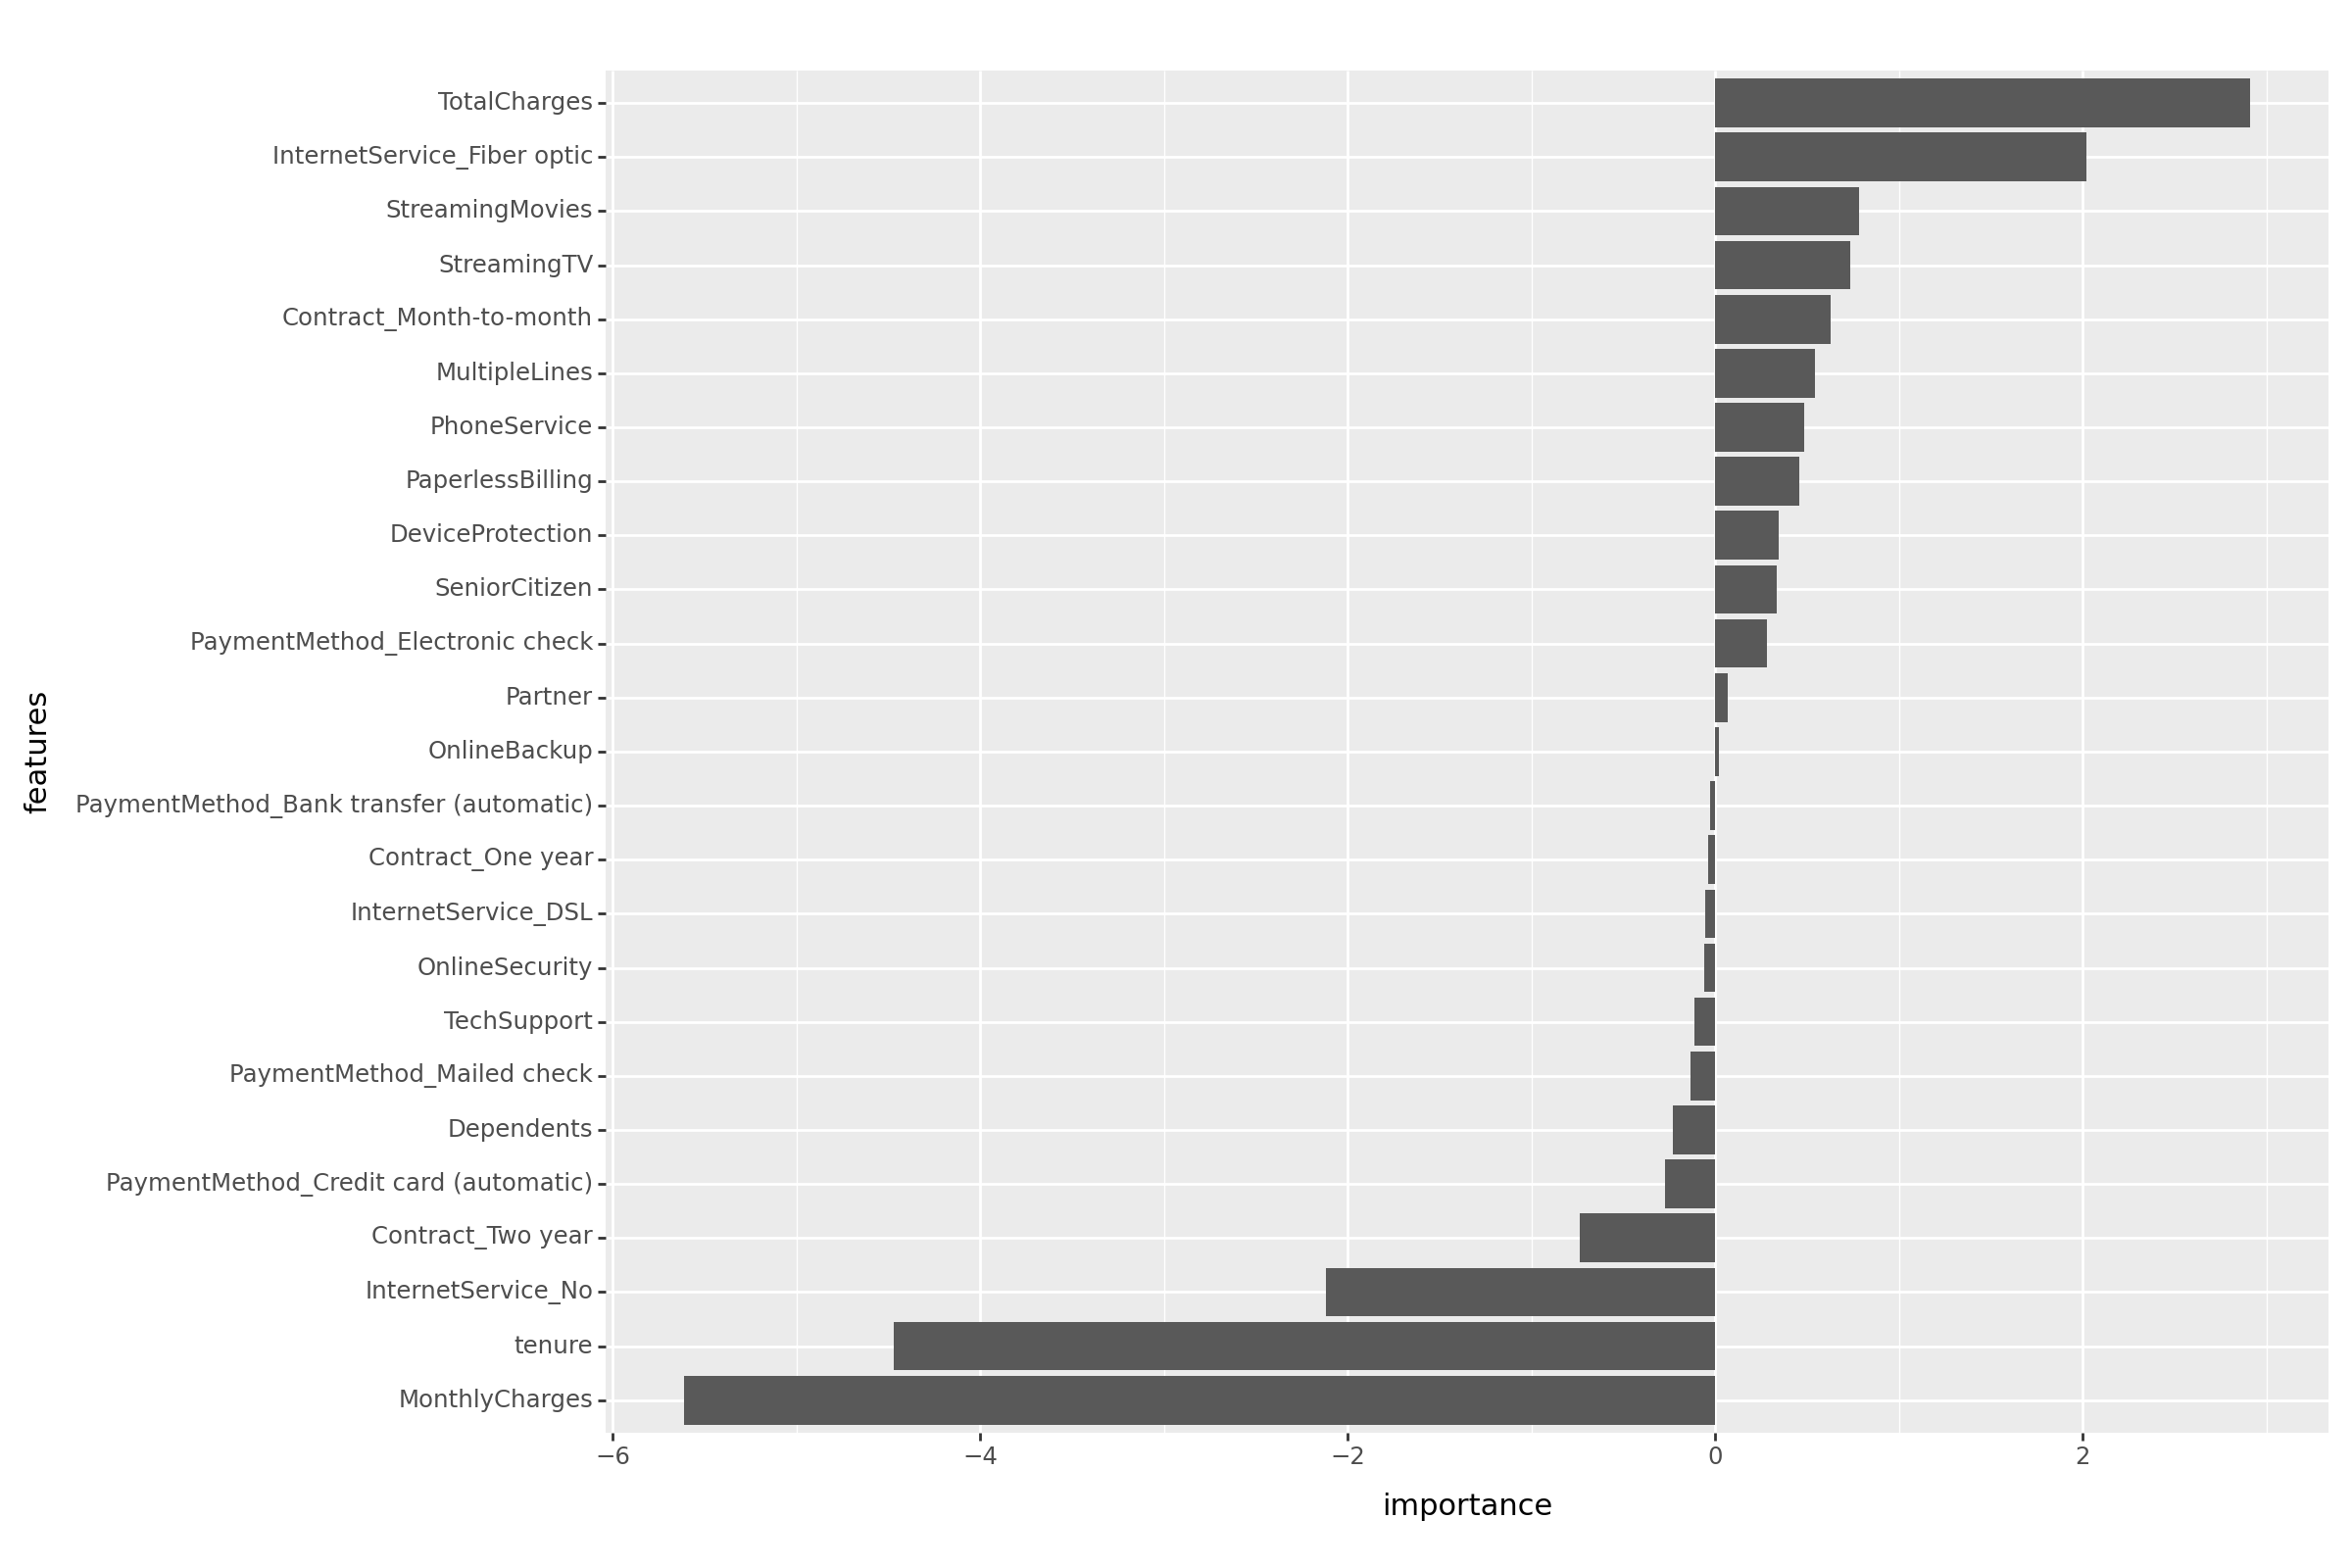

In [592]:
# Feature importance
importance = pd.DataFrame({'features': X_train.columns, 'importance' : model_logit.coef_[0]})
importance_order = importance.sort_values('importance', ascending=True)['features'].to_list()

print(ggplot(importance, aes(x='features', y='importance')) + scale_x_discrete(limits=importance_order) 
    + geom_col() + coord_flip() + theme(figure_size=(12, 8)  )
)

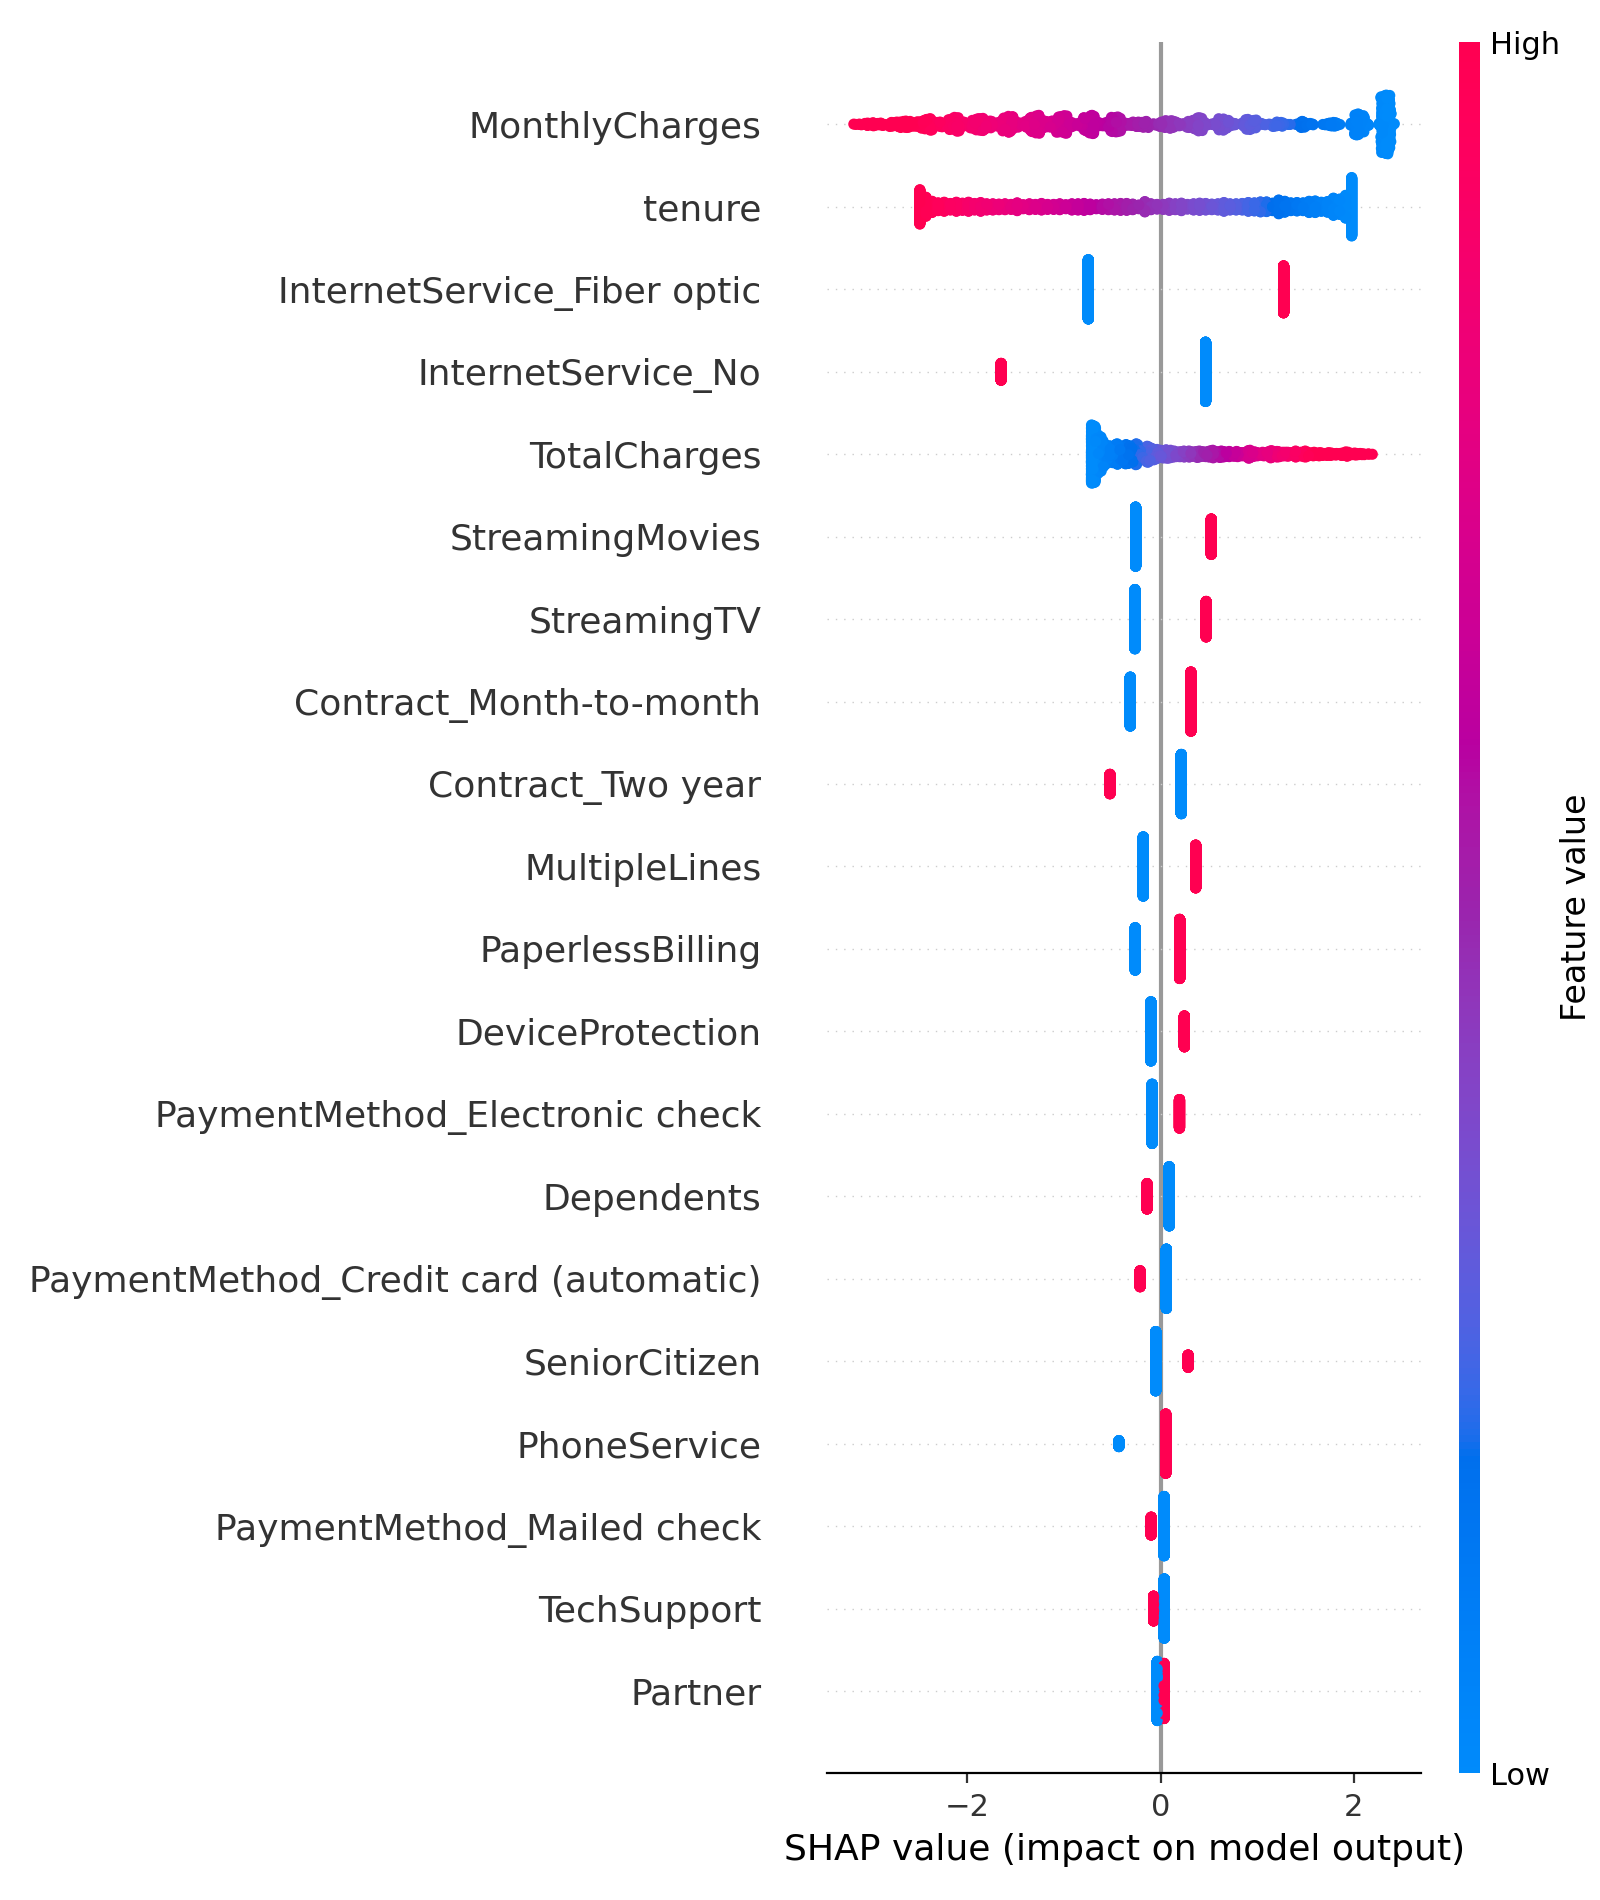

In [593]:
# Analisis de variables y valores. mediante Shap.
shap.initjs()

masker = shap.maskers.Independent(data = X_test)

explainer = shap.LinearExplainer(model_logit, masker=masker)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)

### Logit Regularizado

In [596]:
C = np.linspace(0.01,0.02,21)

hp = {'C': C, #[0.015, 0.016, 0.017, 0.018, 0.019, 0.020, 0.021, 0.022, 0.023] 
        'solver':['newton-cg','lbfgs','liblinear','sag','saga'], 
        'penalty':['l1', 'l2', 'elasticnet']}

model_logitR = LogisticRegression(random_state=0)
grid = GridSearchCV(model_logitR, hp, cv = cv, scoring=['accuracy', 'f1', 'precision', 'recall'], refit="f1", return_train_score=True)
grid.fit(X_train, y_train)

grid_results_logr=grid.cv_results_
print(f'Optimal parameters: {grid.best_params_}')
print('Train f1-score: %.4f' % grid.score(X_train, y_train))
print('Test f1-score: %.4f' % grid.score(X_test, y_test))

Optimal parameters: {'C': 0.02, 'penalty': 'l2', 'solver': 'liblinear'}
Train f1-score: 0.5849
Test f1-score: 0.5315


{'C': 0.02, 'penalty': 'l2', 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      3608
           1       0.68      0.51      0.58      1314

    accuracy                           0.81      4922
   macro avg       0.76      0.71      0.73      4922
weighted avg       0.80      0.81      0.80      4922



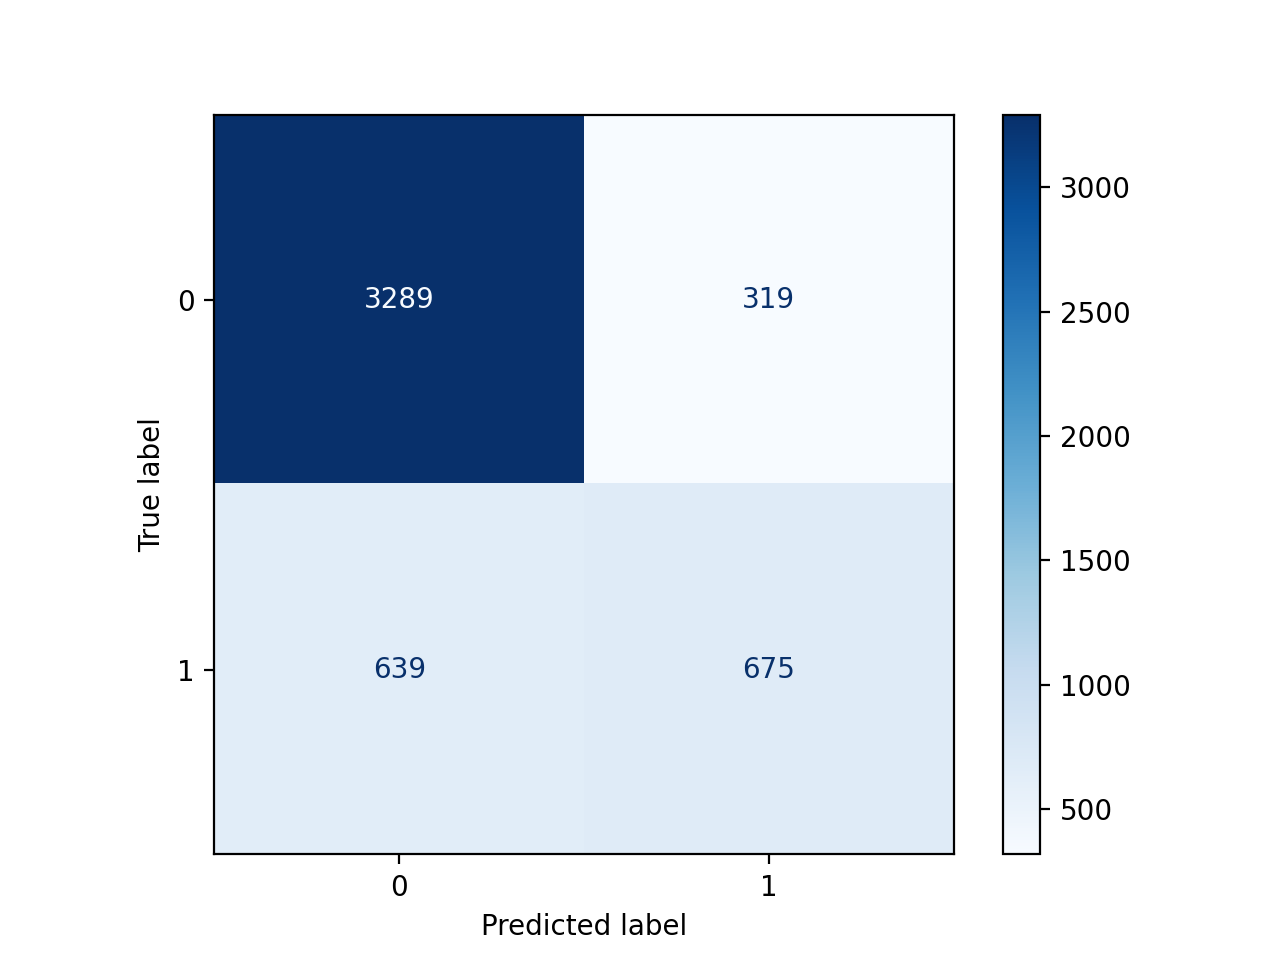

In [598]:
# Performance (train) -----------------------------------------

print(grid.best_params_) 
model_logitR = LogisticRegression(penalty=grid.best_params_['penalty'],C=grid.best_params_['C'],solver=grid.best_params_['solver'])


# Fitting
model_logitR.fit(X_train, y_train)

# Predictions
pred = model_logitR.predict(X_train)


# Confusion matrix
cm = confusion_matrix(y_true=y_train, y_pred=pred)
ConfusionMatrixDisplay(cm).plot(cmap='Blues')


# Scores
print(classification_report(y_true=y_train, y_pred=pred))

# Store accuracy
model.append('Logit-Reg')
set.append('train')
f1.append(round(f1_score(y_true=y_train, y_pred=pred),4))
Acur.append(round(accuracy_score(y_true=y_train, y_pred=pred),4))
Prec.append(round(precision_score(y_true=y_train, y_pred=pred),4))
Rec.append(round(recall_score(y_true=y_train, y_pred=pred),4))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1555
           1       0.64      0.46      0.53       555

    accuracy                           0.79      2110
   macro avg       0.73      0.68      0.70      2110
weighted avg       0.77      0.79      0.78      2110



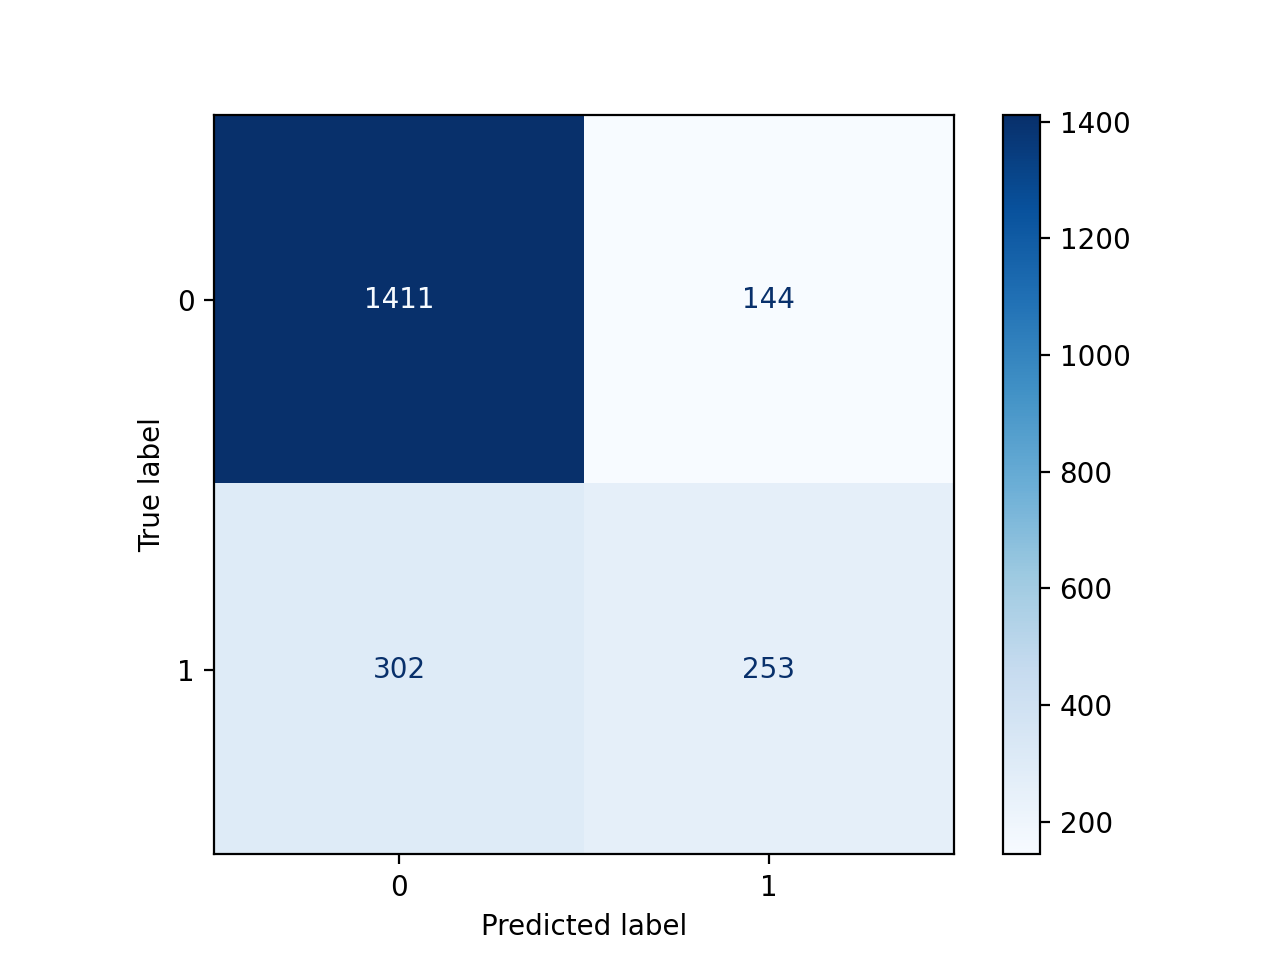

In [599]:
# Performance (test) -----------------------------------------
# Predictions
pred = model_logitR.predict(X_test)

# Confusion matrix
# Confusion matrix
cm = confusion_matrix(y_true=y_test, y_pred=pred)
ConfusionMatrixDisplay(cm).plot(cmap='Blues')


# Scores
print(classification_report(y_true=y_test, y_pred=pred))

# Store accuracy
model.append('Logit-Reg')
set.append('test')
f1.append(round(f1_score(y_true=y_test, y_pred=pred),4))
Acur.append(round(accuracy_score(y_true=y_test, y_pred=pred),4))
Prec.append(round(precision_score(y_true=y_test, y_pred=pred),4))
Rec.append(round(recall_score(y_true=y_test, y_pred=pred),4))

In [601]:
# Building ROC curve and AUC -----------------------------
# Logit-train
## Probabilities of positive class
prob = model_logitR.predict_proba(X_train)
prob_train_logr=prob
prob = prob[:, 1]

## AUC
logitP_auc_train = roc_auc_score(y_train, prob)

## ROC curve
logitP_fpr_train, logitP_tpr_train, logitP_thresholds_train = roc_curve(y_train, prob)

# Logit-test
## Probabilities of positive class
prob = model_logit.predict_proba(X_test)
prob_test_logr=prob
prob = prob[:, 1]

## AUC
logitP_auc_test = roc_auc_score(y_test, prob)

## ROC curve
logitP_fpr_test, logitP_tpr_test, logitP_thresholds_test = roc_curve(y_test, prob)





## k-nearest neighbors (KNN)

In [602]:
model_knn = KNeighborsClassifier()
k_range = list(range(2,11))
param_grid = dict(n_neighbors=k_range)

grid = GridSearchCV(model_knn, param_grid, cv=cv, scoring=['accuracy', 'f1', 'precision', 'recall'], refit="f1", return_train_score=True)
grid.fit(X_train, y_train)

print(f'Optimal parameters: {grid.best_params_}')
print('Train f1-score: %.4f' % grid.score(X_train, y_train))
print('Test f1-score: %.4f' % grid.score(X_test, y_test))

Optimal parameters: {'n_neighbors': 9}
Train f1-score: 0.6457
Test f1-score: 0.5448


{'n_neighbors': 9}
              precision    recall  f1-score   support

           0       0.86      0.89      0.88      3608
           1       0.68      0.62      0.65      1314

    accuracy                           0.82      4922
   macro avg       0.77      0.75      0.76      4922
weighted avg       0.81      0.82      0.82      4922



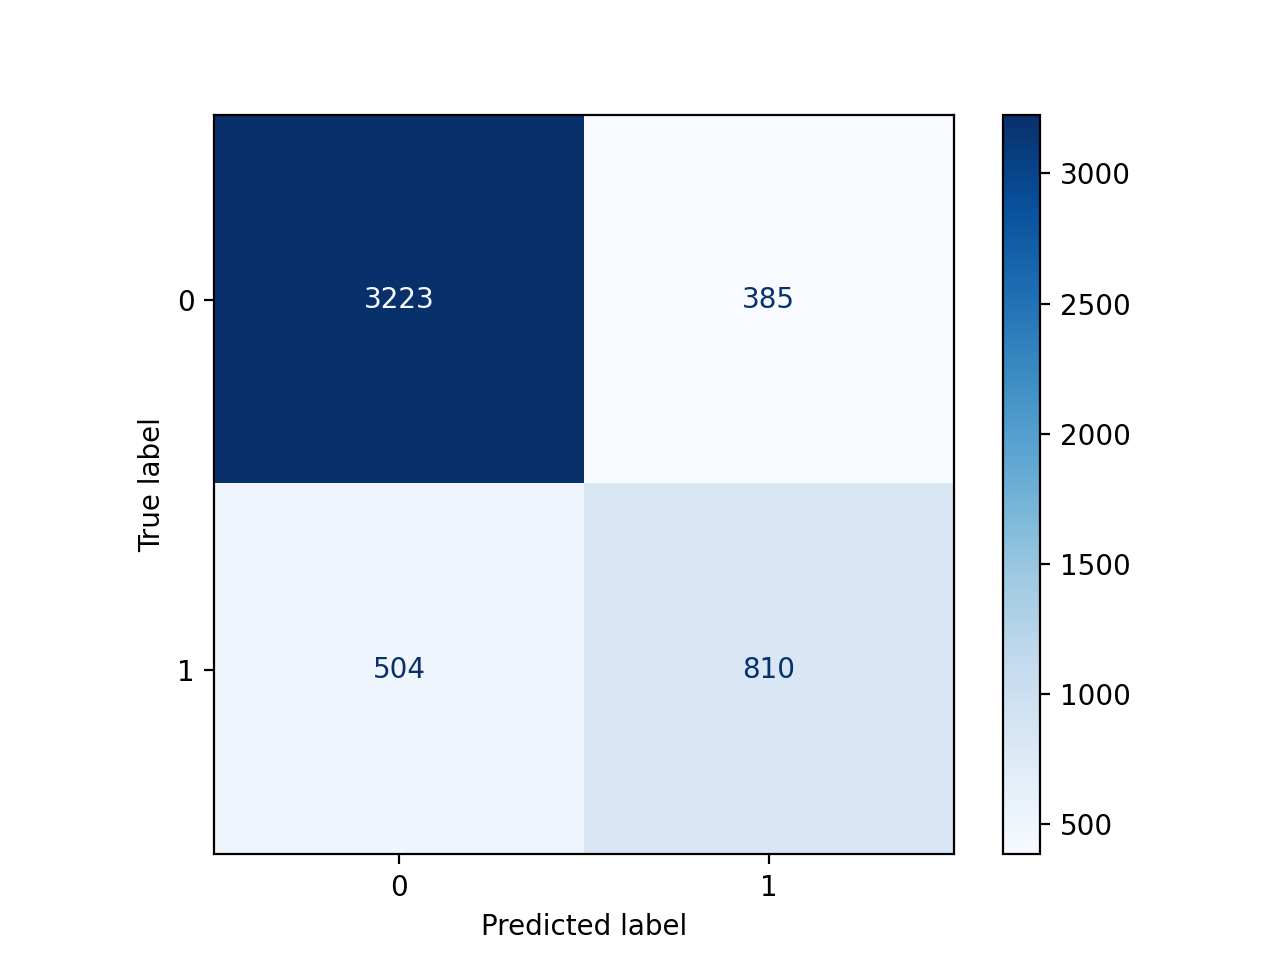

In [604]:
# Performance (train) -----------------------

print(grid.best_params_) 
model_knn = KNeighborsClassifier(n_neighbors=grid.best_params_['n_neighbors'])


# Model fitting
model_knn.fit(X_train, y_train)

# Predictions
pred = model_knn.predict(X_train)

# Confusion matrix
cm = confusion_matrix(y_true=y_train, y_pred=pred)
ConfusionMatrixDisplay(cm).plot(cmap='Blues')
plt.savefig("mc_knn_train.png")

# Scores
print(classification_report(y_true=y_train, y_pred=pred))

# Store accuracy
model.append('knn')
set.append('train')
f1.append(round(f1_score(y_true=y_train, y_pred=pred),4))
Acur.append(round(accuracy_score(y_true=y_train, y_pred=pred),4))
Prec.append(round(precision_score(y_true=y_train, y_pred=pred),4))
Rec.append(round(recall_score(y_true=y_train, y_pred=pred),4))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1555
           1       0.56      0.53      0.54       555

    accuracy                           0.77      2110
   macro avg       0.70      0.69      0.69      2110
weighted avg       0.76      0.77      0.77      2110



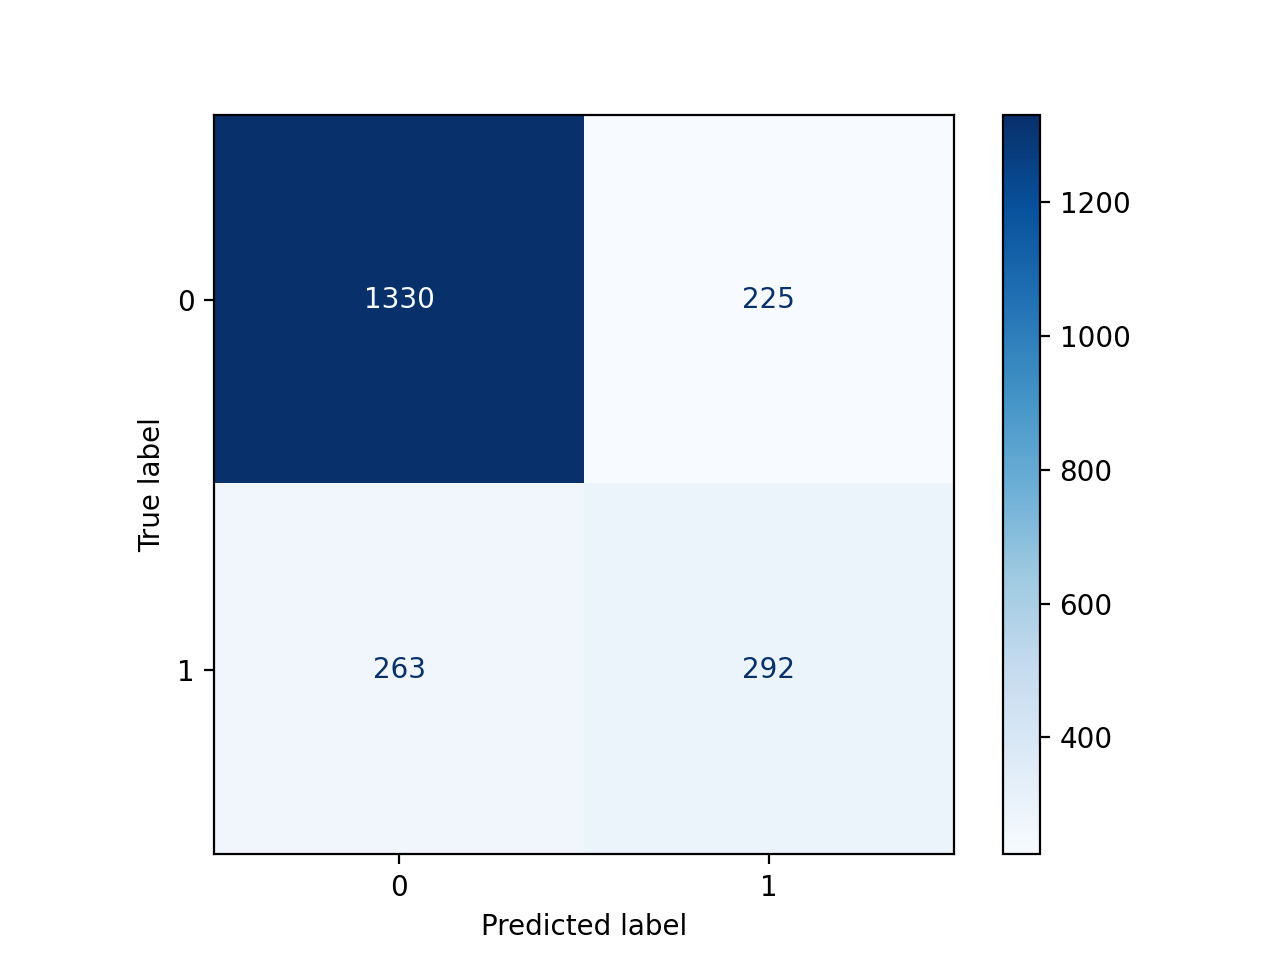

In [605]:
# Performance (test) ----------------------------
# Predictions
pred = model_knn.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_true=y_test, y_pred=pred)
ConfusionMatrixDisplay(cm).plot(cmap='Blues')

# Scores
print(classification_report(y_true=y_test, y_pred=pred))

# Store f1-score
model.append('knn')
set.append('test')
f1.append(round(f1_score(y_true=y_test, y_pred=pred),4))
Acur.append(round(accuracy_score(y_true=y_test, y_pred=pred),4))
Prec.append(round(precision_score(y_true=y_test, y_pred=pred),4))
Rec.append(round(recall_score(y_true=y_test, y_pred=pred),4))

In [606]:
# Building ROC curve and AUC --------------------------------
# KNN-train
## Probabilities of positive class
prob = model_knn.predict_proba(X_train)
prob_train_knn=prob
prob = prob[:, 1]

## AUC
knn_auc_train = roc_auc_score(y_train, prob)

## ROC curve
knn_fpr_train, knn_tpr_train, knn_thresholds_train = roc_curve(y_train, prob)

# KNN-test
## Probabilities of positive class
prob = model_knn.predict_proba(X_test)
prob_test_knn=prob
prob = prob[:, 1]

## AUC
knn_auc_test = roc_auc_score(y_test, prob)

## ROC curve
knn_fpr_test, knn_tpr_test, knn_thresholds_test = roc_curve(y_test, prob)

## Support vector machine (SVM)

In [607]:
# Grid-search 

model_svm = SVC(random_state=0)
param_grid = {'C':[0.1, 1, 10],'gamma':[1,0.1,0.01], 'kernel':['rbf','linear']}
grid = GridSearchCV(model_svm, param_grid, cv=cv, scoring=['accuracy', 'f1', 'precision', 'recall'], refit="f1", return_train_score=True)
grid.fit(X_train, y_train)

print(f'Optimal parameters: {grid.best_params_}')
print('Train f1-score: %.4f' % grid.score(X_train, y_train))
print('Test f1-score: %.4f' % grid.score(X_test, y_test))

Optimal parameters: {'C': 1, 'gamma': 1, 'kernel': 'linear'}
Train f1-score: 0.5930
Test f1-score: 0.5893


{'C': 1, 'gamma': 1, 'kernel': 'linear'}
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      3608
           1       0.66      0.54      0.59      1314

    accuracy                           0.80      4922
   macro avg       0.75      0.72      0.73      4922
weighted avg       0.79      0.80      0.80      4922



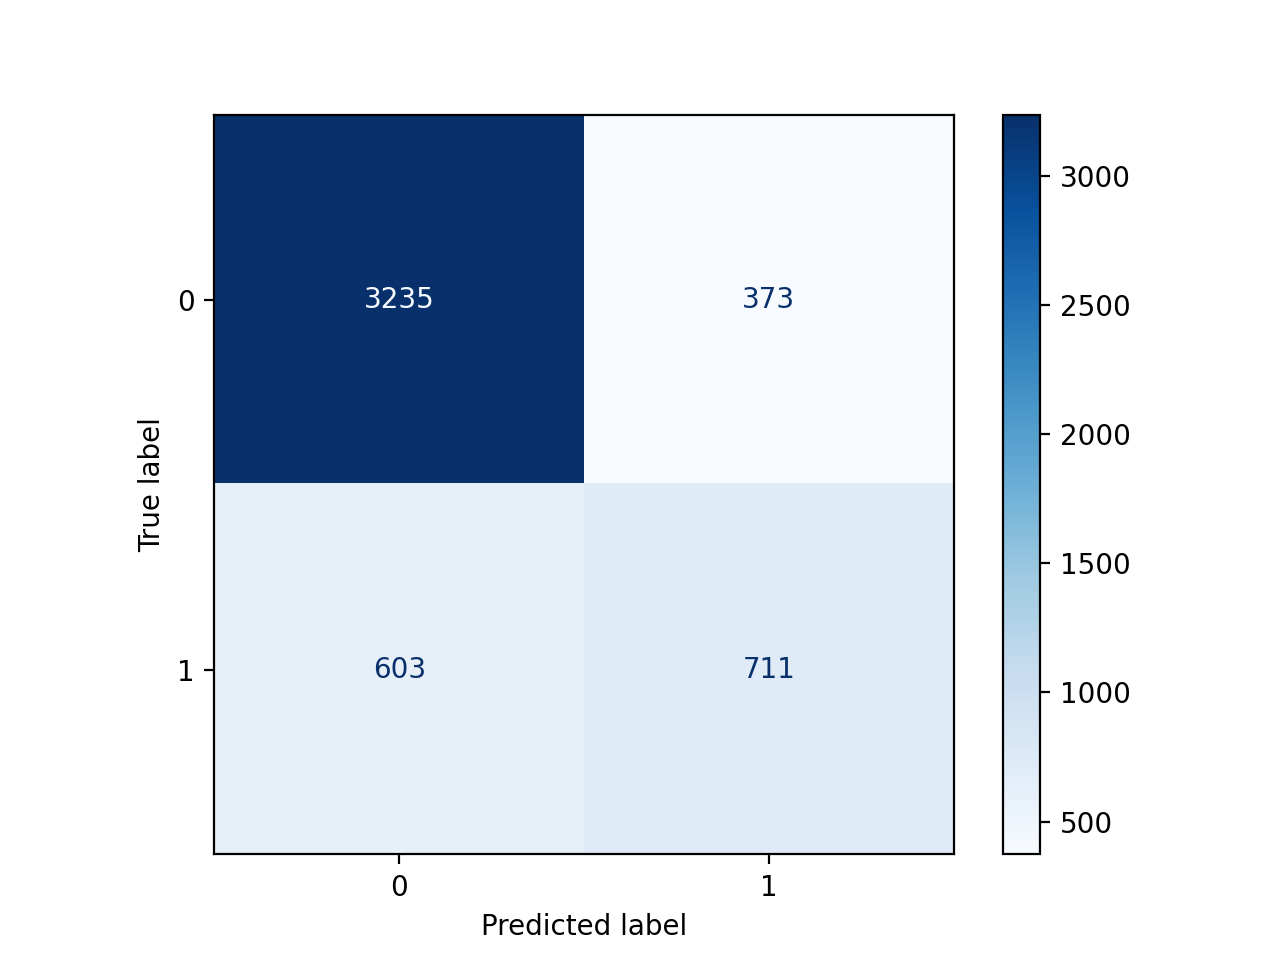

In [609]:
# Performance (train) -----------------------

print(grid.best_params_) 
model_svm = SVC(C=grid.best_params_['C'], gamma=grid.best_params_['gamma'], kernel=grid.best_params_['kernel'], probability=True, random_state=0)


# Model fitting
model_svm.fit(X_train, y_train)

# Predictions
pred = model_svm.predict(X_train)

# Confusion matrix
cm = confusion_matrix(y_true=y_train, y_pred=pred)
ConfusionMatrixDisplay(cm).plot(cmap='Blues')
plt.savefig("mc_svm_train.png")

# Scores
print(classification_report(y_true=y_train, y_pred=pred))

# Store f1-score
model.append('svm')
set.append('train')
f1.append(round(f1_score(y_true=y_train, y_pred=pred),4))
Acur.append(round(accuracy_score(y_true=y_train, y_pred=pred),4))
Prec.append(round(precision_score(y_true=y_train, y_pred=pred),4))
Rec.append(round(recall_score(y_true=y_train, y_pred=pred),4))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1555
           1       0.66      0.54      0.59       555

    accuracy                           0.80      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.79      0.80      0.80      2110



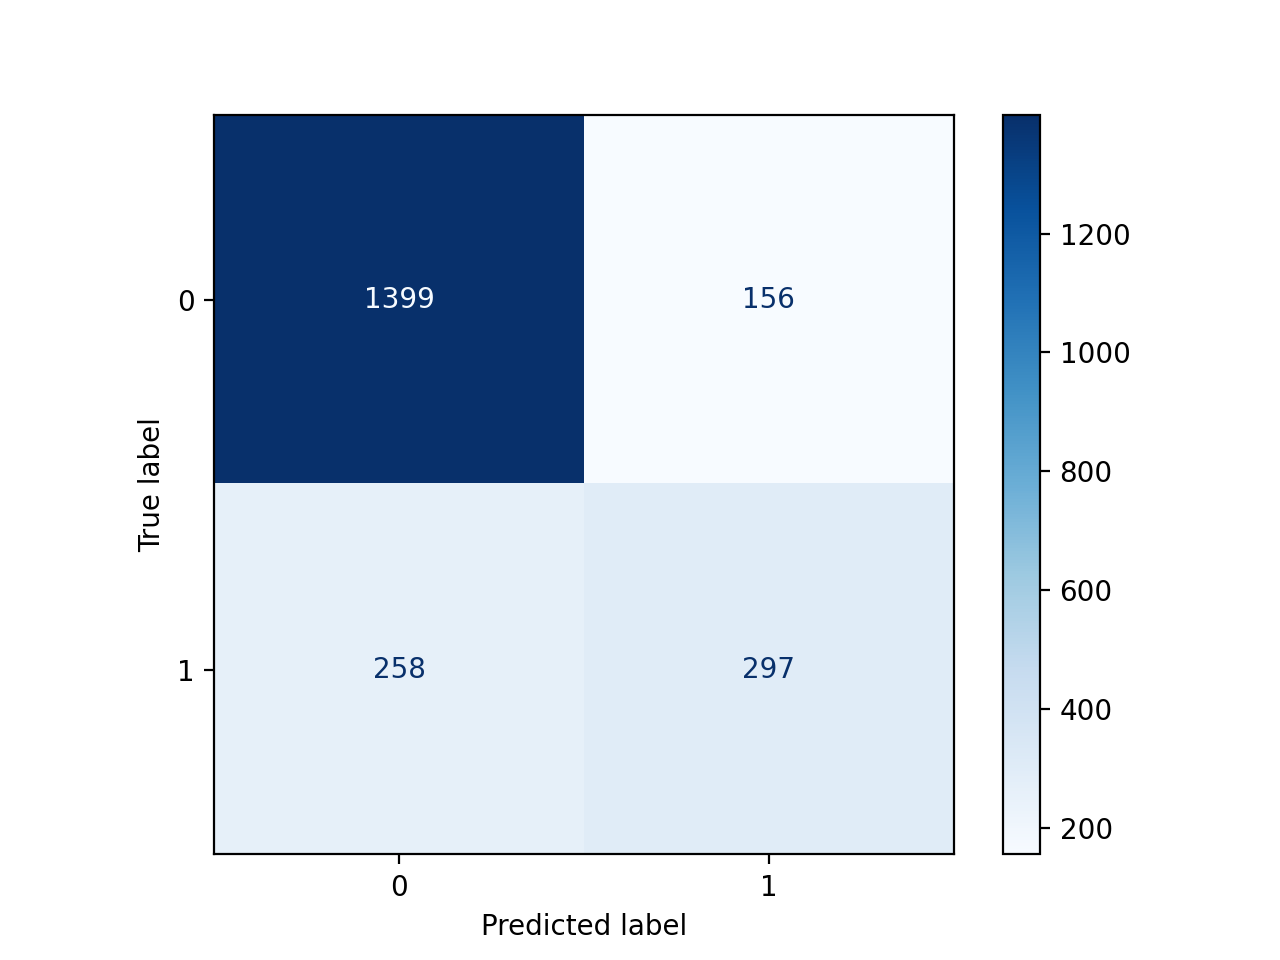

In [610]:
# Performance (test) ----------------------------
# Predictions
pred = model_svm.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_true=y_test, y_pred=pred)
ConfusionMatrixDisplay(cm).plot(cmap='Blues')
plt.savefig("mc_svm_test.png")

# Scores
print(classification_report(y_true=y_test, y_pred=pred))

# Store f1-score
model.append('svm')
set.append('test')
f1.append(round(f1_score(y_true=y_test, y_pred=pred),4))
Acur.append(round(accuracy_score(y_true=y_test, y_pred=pred),4))
Prec.append(round(precision_score(y_true=y_test, y_pred=pred),4))
Rec.append(round(recall_score(y_true=y_test, y_pred=pred),4))

In [611]:
# Building ROC curve and AUC ---------------------------
# SVM-train
## Probabilities of positive class
prob = model_svm.predict_proba(X_train)
prob_train_svm=prob
prob = prob[:, 1]

## AUC
svm_auc_train = roc_auc_score(y_train, prob)

## ROC curve
svm_fpr_train, svm_tpr_train, svm_thresholds_train = roc_curve(y_train, prob)

# SVM-test
## Probabilities of positive class
prob = model_svm.predict_proba(X_test)
prob_test_svm=prob
prob = prob[:, 1]

## AUC
svm_auc_test = roc_auc_score(y_test, prob)

## ROC curve
svm_fpr_test, svm_tpr_test, svm_thresholds_test = roc_curve(y_test, prob)

## Naive Bayes

In [612]:
# Cross Validate
model_NB = GaussianNB()
hp = {}
grid = GridSearchCV(model_NB, hp, cv = cv, scoring=['accuracy', 'f1', 'precision', 'recall'], refit="f1", return_train_score=True)
grid.fit(X_train, y_train)

grid_results_logr=grid.cv_results_
print(f'Optimal parameters: {grid.best_params_}')
print('Train f1-score: %.4f' % grid.score(X_train, y_train))
print('Test f1-score: %.4f' % grid.score(X_test, y_test))

Optimal parameters: {}
Train f1-score: 0.6209
Test f1-score: 0.6154


              precision    recall  f1-score   support

           0       0.90      0.74      0.81      3608
           1       0.52      0.78      0.62      1314

    accuracy                           0.75      4922
   macro avg       0.71      0.76      0.72      4922
weighted avg       0.80      0.75      0.76      4922



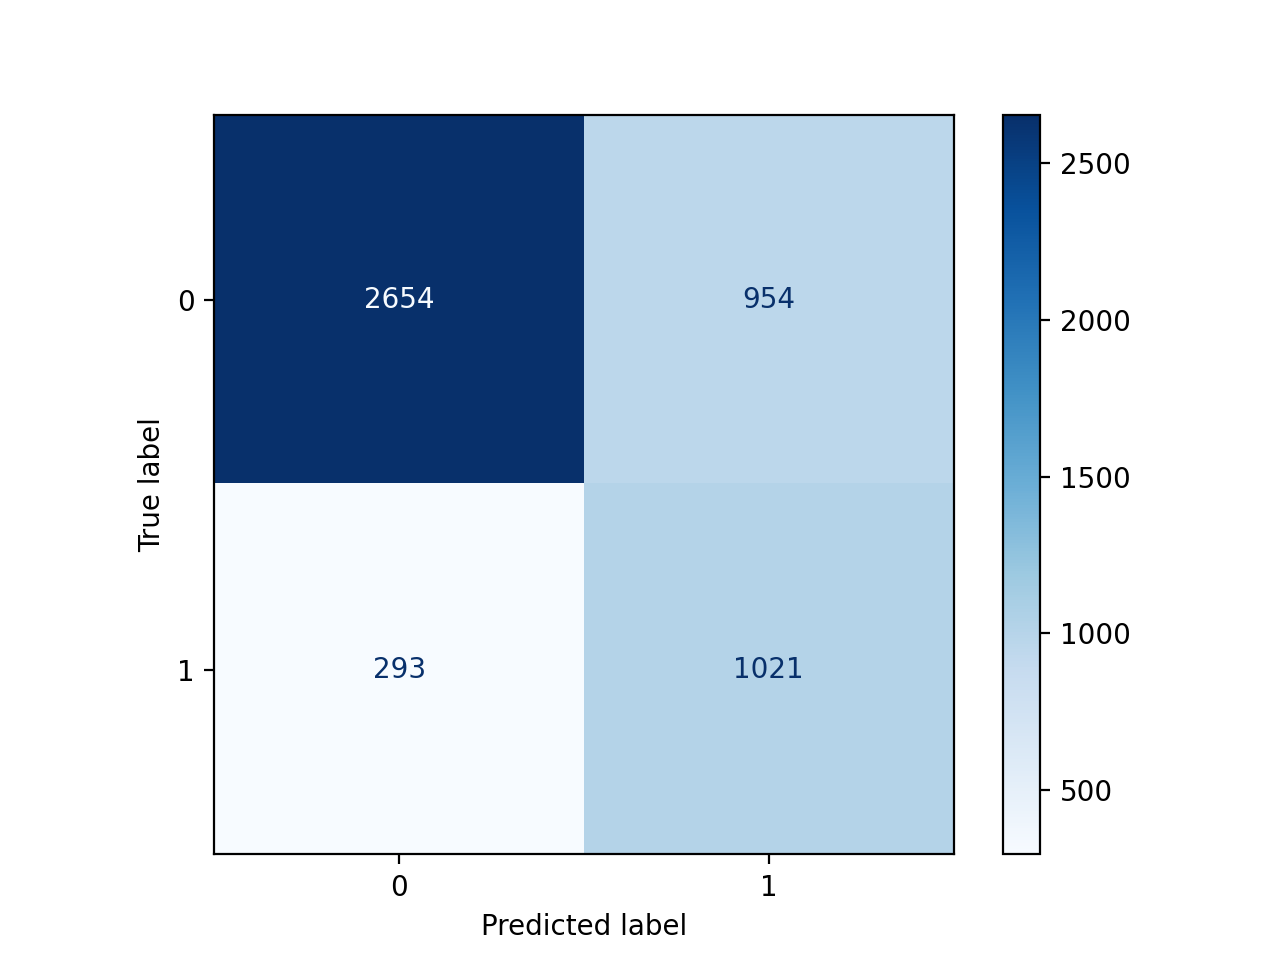

In [614]:
# Performance (train) -----------------------
# Model fitting
model_NB = GaussianNB()
model_NB.fit(X_train, y_train)

# Predictions
pred = model_NB.predict(X_train)

# Confusion matrix
cm = confusion_matrix(y_true=y_train, y_pred=pred)
ConfusionMatrixDisplay(cm).plot(cmap='Blues')
plt.savefig("mc_nb_train.png")

# Scores
print(classification_report(y_true=y_train, y_pred=pred))

# Store f1-score
model.append('NB')
set.append('train')
f1.append(round(f1_score(y_true=y_train, y_pred=pred),4))
Acur.append(round(accuracy_score(y_true=y_train, y_pred=pred),4))
Prec.append(round(precision_score(y_true=y_train, y_pred=pred),4))
Rec.append(round(recall_score(y_true=y_train, y_pred=pred),4))

              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1555
           1       0.51      0.78      0.62       555

    accuracy                           0.74      2110
   macro avg       0.71      0.76      0.71      2110
weighted avg       0.80      0.74      0.76      2110



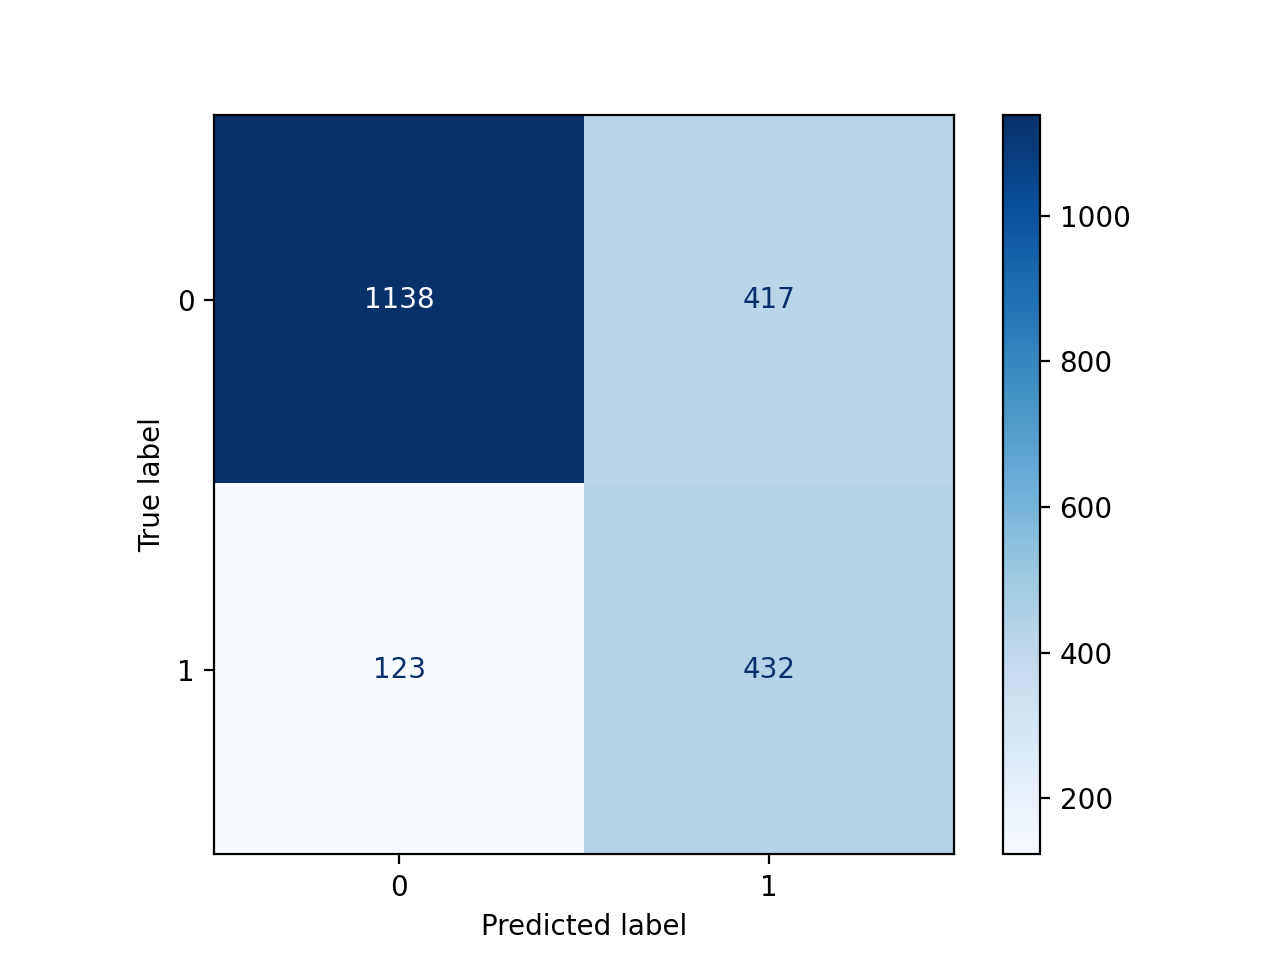

In [615]:
# Performance (test) ----------------------------
# Predictions
pred = model_NB.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_true=y_test, y_pred=pred)
ConfusionMatrixDisplay(cm).plot(cmap='Blues')


# Scores
print(classification_report(y_true=y_test, y_pred=pred))

# Store f1-score
model.append('NB')
set.append('test')
f1.append(round(f1_score(y_true=y_test, y_pred=pred),4))
Acur.append(round(accuracy_score(y_true=y_test, y_pred=pred),4))
Prec.append(round(precision_score(y_true=y_test, y_pred=pred),4))
Rec.append(round(recall_score(y_true=y_test, y_pred=pred),4))

In [616]:
# Building ROC curve and AUC ---------------------------
# NB-train
## Probabilities of positive class
prob = model_NB.predict_proba(X_train)
prob_train_nb=prob
prob = prob[:, 1]

## AUC
NB_auc_train = roc_auc_score(y_train, prob)

## ROC curve
NB_fpr_train, NB_tpr_train, NB_thresholds_train = roc_curve(y_train, prob)

# NB-test
## Probabilities of positive class
prob = model_NB.predict_proba(X_test)
prob_test_nb=prob
prob = prob[:, 1]

## AUC
NB_auc_test = roc_auc_score(y_test, prob)

## ROC curve
NB_fpr_test, NB_tpr_test, NB_thresholds_test = roc_curve(y_test, prob)

## Decision tree

In [617]:
# Grid-search 

model_tree = DecisionTreeClassifier(random_state=0)
param_grid = {'criterion':['gini', 'entropy'],'max_depth': list(range(1, 21))}
  
grid = GridSearchCV(model_tree, param_grid, cv=cv, scoring=['accuracy', 'f1', 'precision', 'recall'], refit="f1", return_train_score=True)
grid.fit(X_train, y_train)

print(f'Optimal parameters: {grid.best_params_}')
print('Train accuracy: %.4f' % grid.score(X_train, y_train))
print('Test accuracy: %.4f' % grid.score(X_test, y_test))

Optimal parameters: {'criterion': 'gini', 'max_depth': 2}
Train accuracy: 0.5797
Test accuracy: 0.5855


{'criterion': 'gini', 'max_depth': 2}
              precision    recall  f1-score   support

           0       0.85      0.81      0.83      3608
           1       0.55      0.62      0.58      1314

    accuracy                           0.76      4922
   macro avg       0.70      0.72      0.71      4922
weighted avg       0.77      0.76      0.77      4922



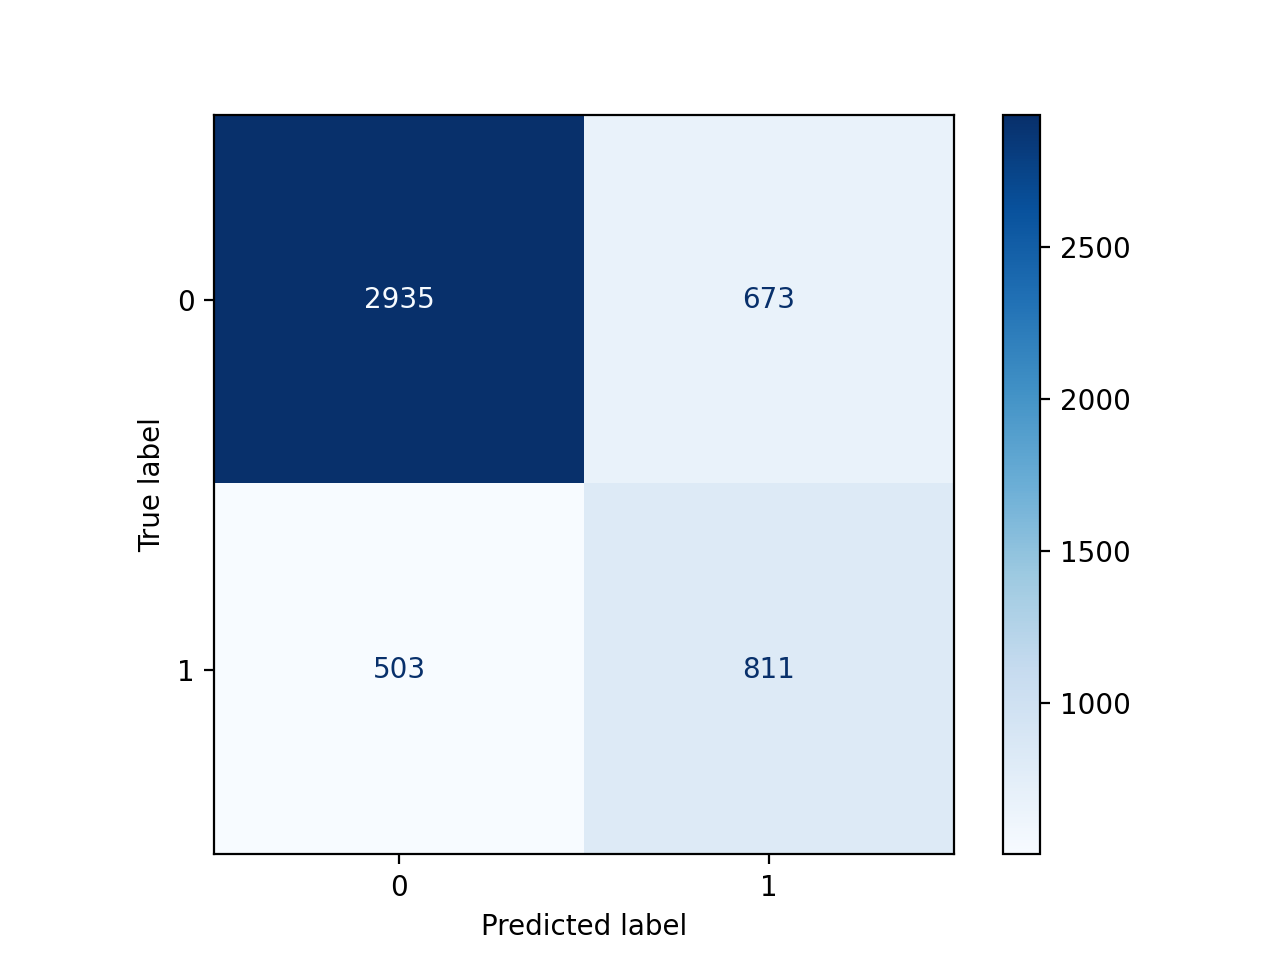

In [619]:
# Performance (train) -----------------------

print(grid.best_params_) 
model_tree = DecisionTreeClassifier(criterion=grid.best_params_['criterion'], max_depth=grid.best_params_['max_depth'])

# Model fitting
model_tree.fit(X_train, y_train)

# Predictions
pred = model_tree.predict(X_train)

# Confusion matrix
cm = confusion_matrix(y_true=y_train, y_pred=pred)
ConfusionMatrixDisplay(cm).plot(cmap='Blues')


# Scores
print(classification_report(y_true=y_train, y_pred=pred))

# Store f1-score
model.append('tree')
set.append('train')
f1.append(round(f1_score(y_true=y_train, y_pred=pred),4))
Acur.append(round(accuracy_score(y_true=y_train, y_pred=pred),4))
Prec.append(round(precision_score(y_true=y_train, y_pred=pred),4))
Rec.append(round(recall_score(y_true=y_train, y_pred=pred),4))

              precision    recall  f1-score   support

           0       0.86      0.81      0.84      1555
           1       0.55      0.63      0.59       555

    accuracy                           0.76      2110
   macro avg       0.70      0.72      0.71      2110
weighted avg       0.78      0.76      0.77      2110



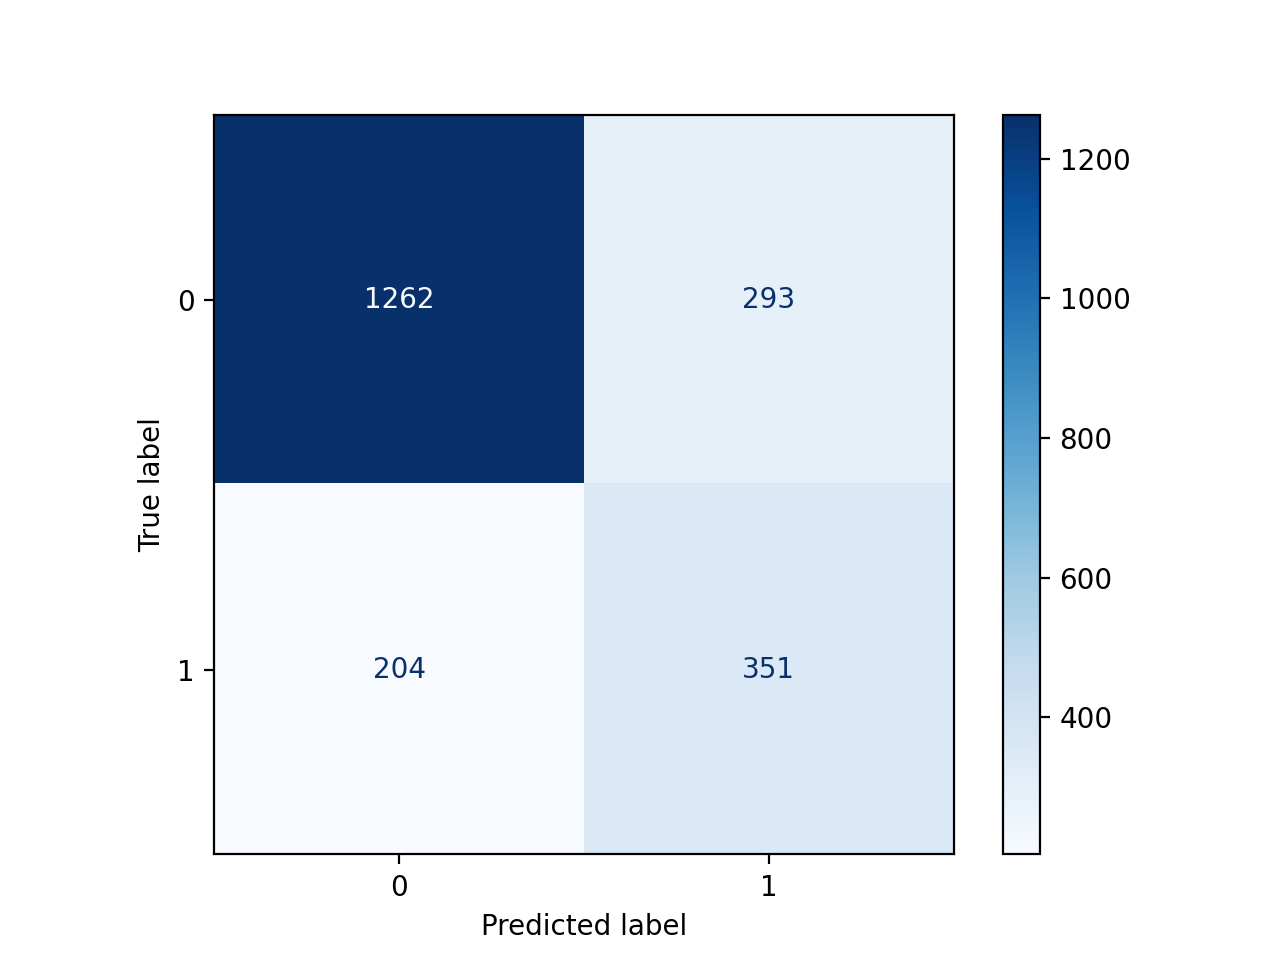

In [621]:
# Performance (test) ----------------------------
# Predictions
pred = model_tree.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_true=y_test, y_pred=pred)
ConfusionMatrixDisplay(cm).plot(cmap='Blues')


# Scores
print(classification_report(y_true=y_test, y_pred=pred))

# Store f1-score
model.append('tree')
set.append('test')
f1.append(round(f1_score(y_true=y_test, y_pred=pred),4))
Acur.append(round(accuracy_score(y_true=y_test, y_pred=pred),4))
Prec.append(round(precision_score(y_true=y_test, y_pred=pred),4))
Rec.append(round(recall_score(y_true=y_test, y_pred=pred),4))

In [622]:
# Building ROC curve and AUC ----------------------------
# Tree-train
## Probabilities of positive class
prob = model_tree.predict_proba(X_train)
prob_train_dt=prob
prob = prob[:, 1]

## AUC
tree_auc_train = roc_auc_score(y_train, prob)

## ROC curve
tree_fpr_train, tree_tpr_train, tree_thresholds_train = roc_curve(y_train, prob)

# Tree-test
## Probabilities of positive class
prob = model_tree.predict_proba(X_test)
prob_test_dt=prob
prob = prob[:, 1]

## AUC
tree_auc_test = roc_auc_score(y_test, prob)

## ROC curve
tree_fpr_test, tree_tpr_test, tree_thresholds_test = roc_curve(y_test, prob)

## Random Forest

In [623]:
# Grid-search

model_rf = RandomForestClassifier(random_state=0)

param_grid = {'n_estimators': [100,200],'max_depth': list(range(10,15)), 'max_features': ['sqrt', 'log2', None]}
  
grid = GridSearchCV(model_rf, param_grid, cv=cv, scoring=['accuracy', 'f1', 'precision', 'recall'], refit="f1", return_train_score=True)
grid.fit(X_train, y_train)

print(f'Optimal parameters: {grid.best_params_}')
print('Train accuracy: %.4f' % grid.score(X_train, y_train))
print('Test accuracy: %.4f' % grid.score(X_test, y_test))

Optimal parameters: {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 200}
Train accuracy: 0.7555
Test accuracy: 0.5653


{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      3608
           1       0.83      0.69      0.76      1314

    accuracy                           0.88      4922
   macro avg       0.86      0.82      0.84      4922
weighted avg       0.88      0.88      0.88      4922



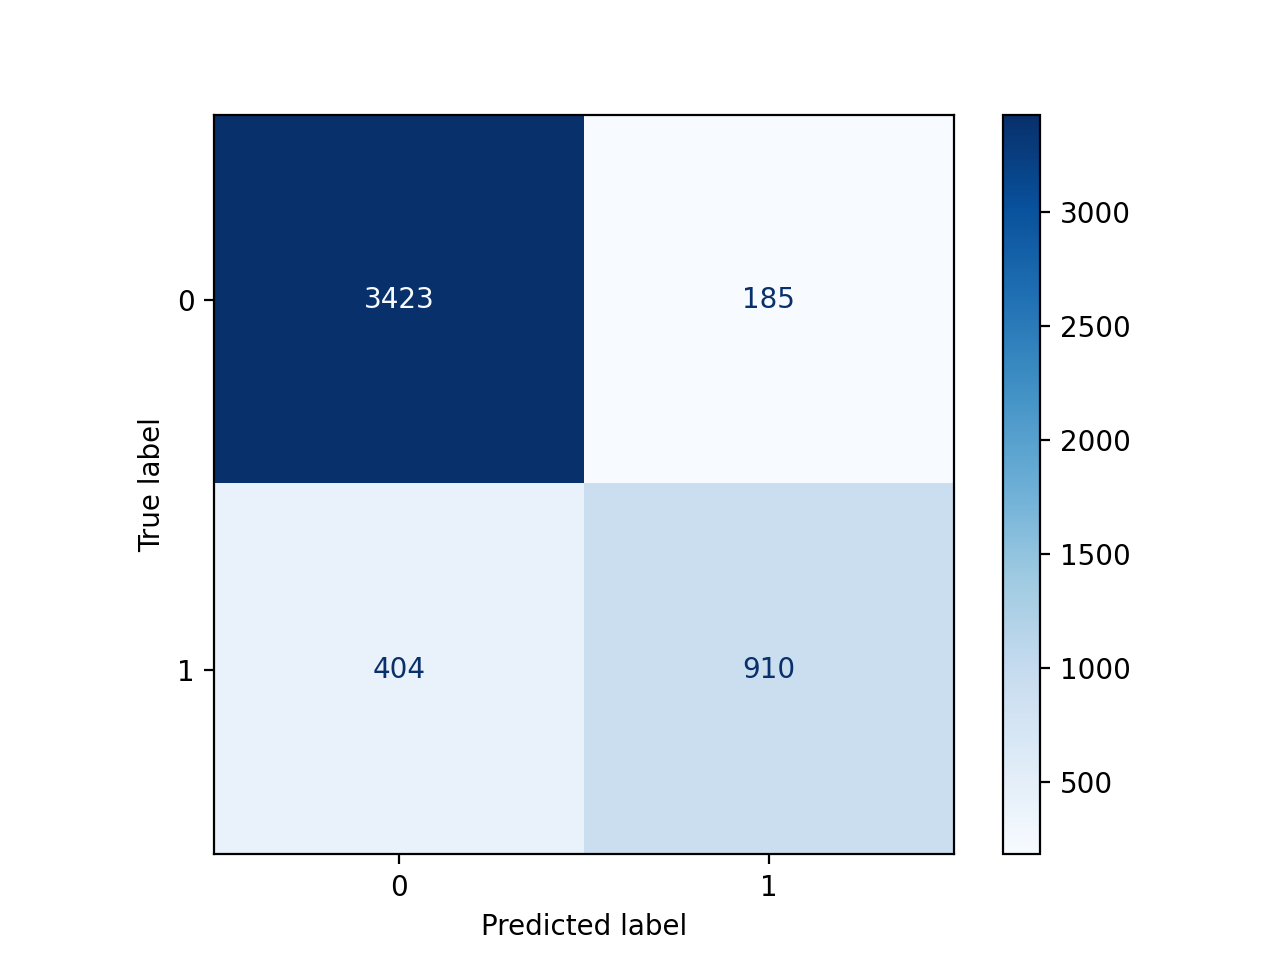

In [625]:
# Performance (train) -----------------------

print(grid.best_params_) 
model_rf = RandomForestClassifier(n_estimators=grid.best_params_['n_estimators'], max_depth=grid.best_params_['max_depth'], max_features=grid.best_params_['max_features'], random_state=0)

# Model fitting
model_rf.fit(X_train, y_train)

# Predictions
pred = model_rf.predict(X_train)

# Confusion matrix
cm = confusion_matrix(y_true=y_train, y_pred=pred)
ConfusionMatrixDisplay(cm).plot(cmap='Blues')


# Scores
print(classification_report(y_true=y_train, y_pred=pred))

# Store f1-score
model.append('RF')
set.append('train')
f1.append(round(f1_score(y_true=y_train, y_pred=pred),4))
Acur.append(round(accuracy_score(y_true=y_train, y_pred=pred),4))
Prec.append(round(precision_score(y_true=y_train, y_pred=pred),4))
Rec.append(round(recall_score(y_true=y_train, y_pred=pred),4))

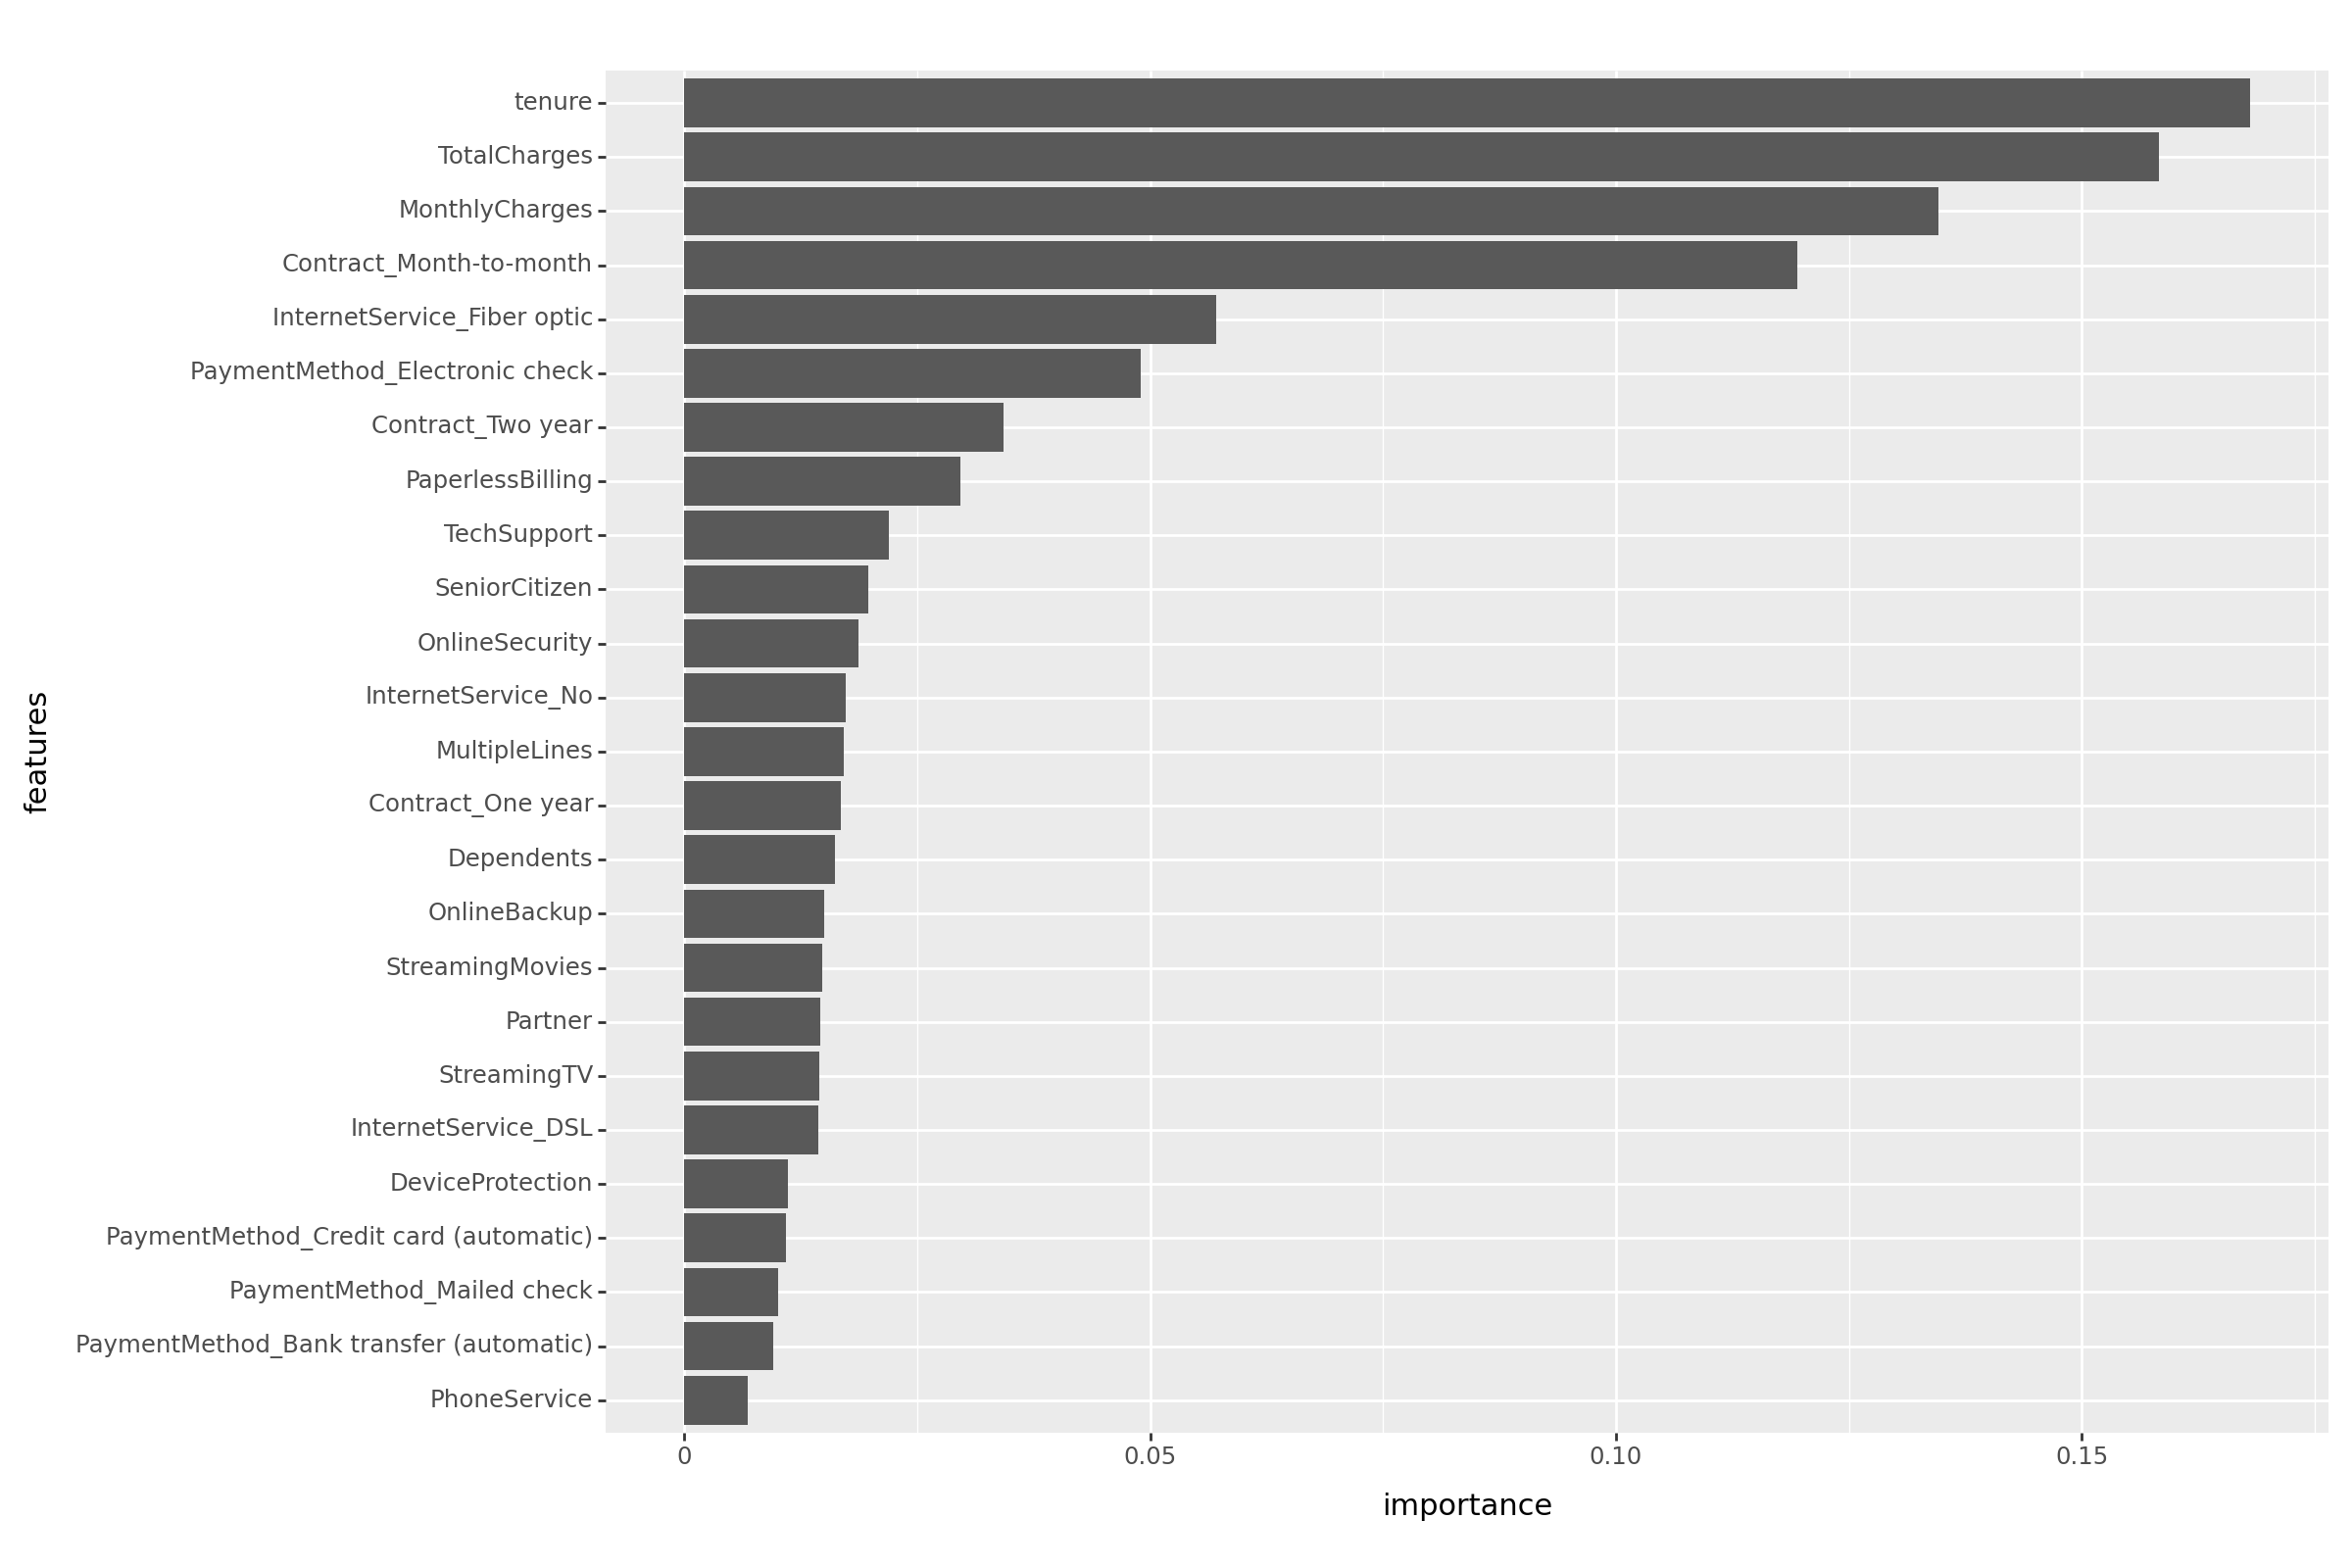

<Figure size 640x480 with 0 Axes>

In [626]:

# Feature importance
importance = pd.DataFrame({'features': X_train.columns.values, 'importance' : model_rf.feature_importances_})
importance_order = importance.sort_values('importance', ascending=True)['features'].to_list()

print(ggplot(importance, aes(x='features', y='importance')) + scale_x_discrete(limits=importance_order) 
    + geom_col() + coord_flip() + theme(figure_size=(12, 8))
)





              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1555
           1       0.65      0.50      0.57       555

    accuracy                           0.80      2110
   macro avg       0.74      0.70      0.72      2110
weighted avg       0.79      0.80      0.79      2110



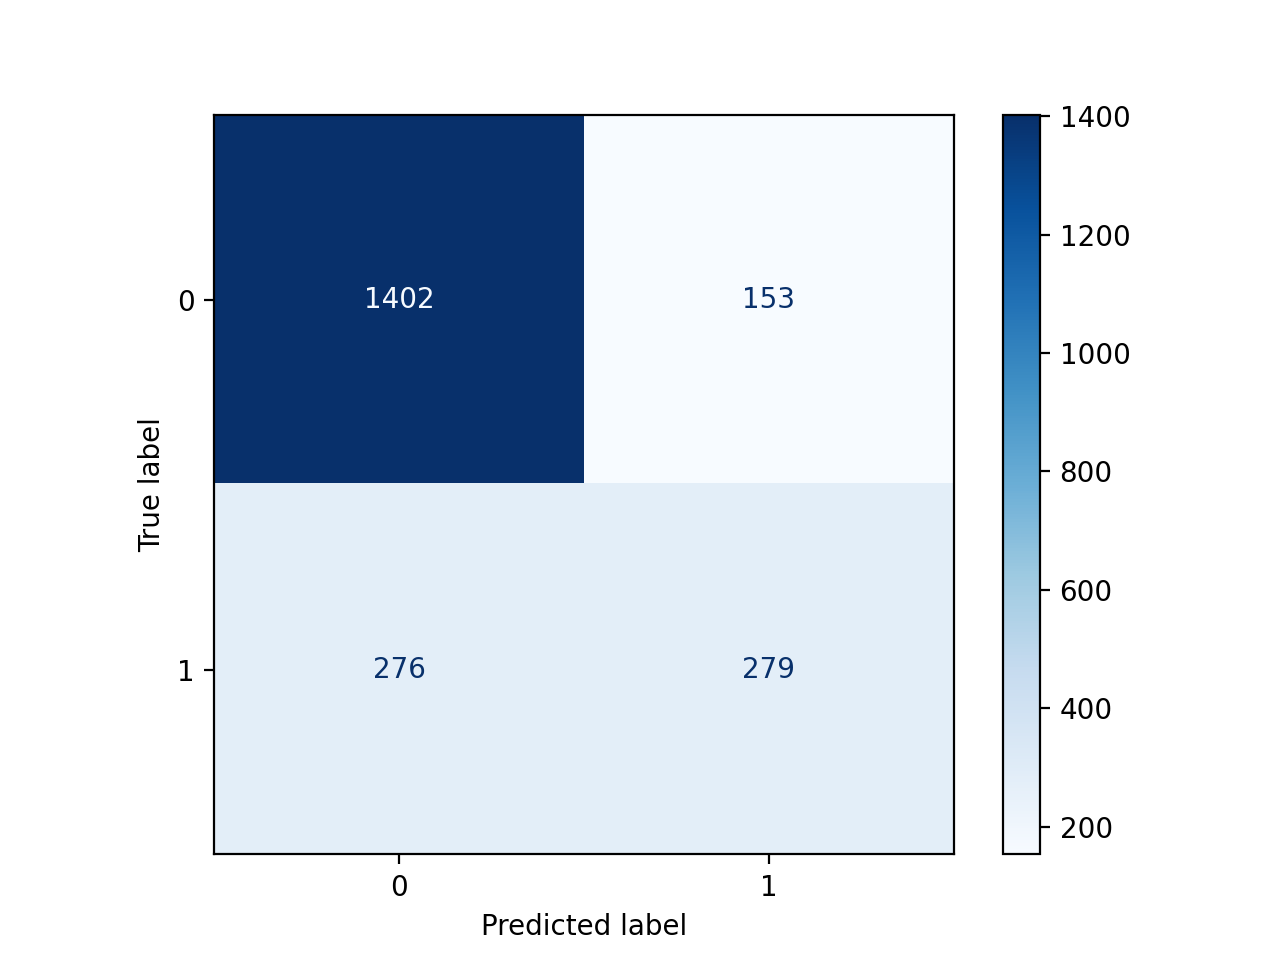

In [627]:
# Performance (test) ----------------------------
# Predictions
pred = model_rf.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_true=y_test, y_pred=pred)
ConfusionMatrixDisplay(cm).plot(cmap='Blues')


# Scores
print(classification_report(y_true=y_test, y_pred=pred))

# Store f1-score
model.append('RF')
set.append('test')
f1.append(round(f1_score(y_true=y_test, y_pred=pred),4))
Acur.append(round(accuracy_score(y_true=y_test, y_pred=pred),4))
Prec.append(round(precision_score(y_true=y_test, y_pred=pred),4))
Rec.append(round(recall_score(y_true=y_test, y_pred=pred),4))

In [628]:
# Building ROC curve and AUC ---------------------------
# RF-train
## Probabilities of positive class
prob = model_rf.predict_proba(X_train)
prob_train_rf=prob
prob = prob[:, 1]

## AUC
rf_auc_train = roc_auc_score(y_train, prob)

## ROC curve
rf_fpr_train, rf_tpr_train, rf_thresholds_train = roc_curve(y_train, prob)

# RF-test
## Probabilities of positive class
prob = model_rf.predict_proba(X_test)
prob_test_rf=prob
prob = prob[:, 1]

## AUC
rf_auc_test = roc_auc_score(y_test, prob)

## ROC curve
rf_fpr_test, rf_tpr_test, rf_thresholds_test = roc_curve(y_test, prob)

## Gradiente Boosting

In [629]:
# Grid-search

model_gb = GradientBoostingClassifier(random_state=0)
  #param_grid = {'n_estimators': [25, 50, 100,150],'max_depth': list(range(1, 21)), 'max_features': ['sqrt', 'log2', None], 'max_leaf_nodes': list(range(1, 21))}
param_grid = {'n_estimators': [200,300,400],'max_depth': list(range(2,5))}
grid = GridSearchCV(model_gb, param_grid, cv=cv, scoring=['accuracy', 'f1', 'precision', 'recall'], refit="f1", return_train_score=True)
grid.fit(X_train, y_train)

print(f'Optimal parameters: {grid.best_params_}')
print('Train accuracy: %.4f' % grid.score(X_train, y_train))
print('Test accuracy: %.4f' % grid.score(X_test, y_test))

Optimal parameters: {'max_depth': 2, 'n_estimators': 200}
Train accuracy: 0.6488
Test accuracy: 0.5666


{'max_depth': 2, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      3608
           1       0.72      0.59      0.65      1314

    accuracy                           0.83      4922
   macro avg       0.79      0.75      0.77      4922
weighted avg       0.82      0.83      0.82      4922



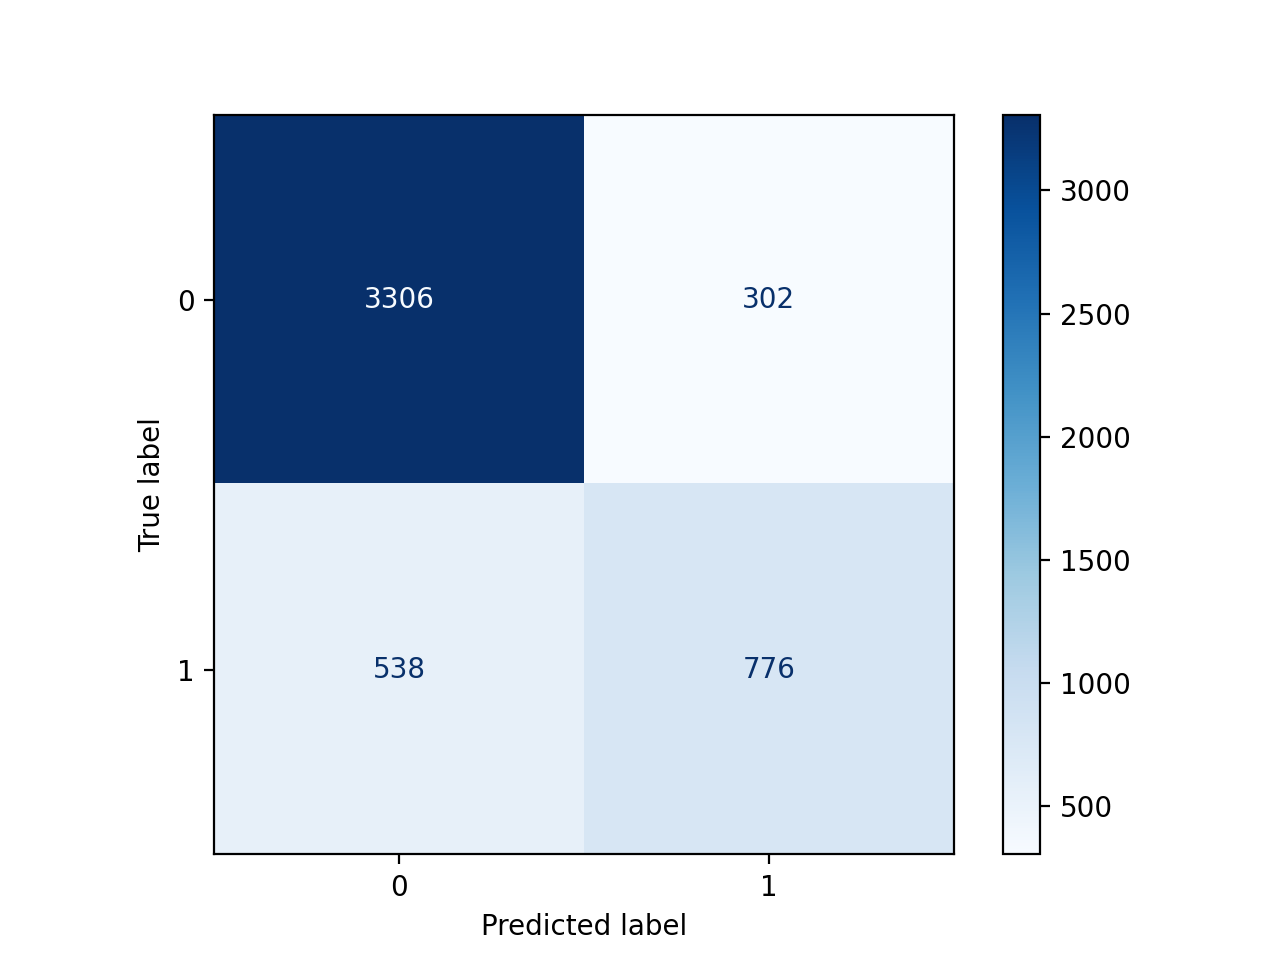

In [631]:
# Performance (train) -----------------------

print(grid.best_params_) 
model_gb = GradientBoostingClassifier(n_estimators=grid.best_params_['n_estimators'], max_depth=grid.best_params_['max_depth'], random_state=0)


# Model fitting
model_gb.fit(X_train, y_train)

# Predictions
pred = model_gb.predict(X_train)

# Confusion matrix
cm = confusion_matrix(y_true=y_train, y_pred=pred)
ConfusionMatrixDisplay(cm).plot(cmap='Blues')


# Scores
print(classification_report(y_true=y_train, y_pred=pred))

# Store f1-score
model.append('GB')
set.append('train')
f1.append(round(f1_score(y_true=y_train, y_pred=pred),4))
Acur.append(round(accuracy_score(y_true=y_train, y_pred=pred),4))
Prec.append(round(precision_score(y_true=y_train, y_pred=pred),4))
Rec.append(round(recall_score(y_true=y_train, y_pred=pred),4))

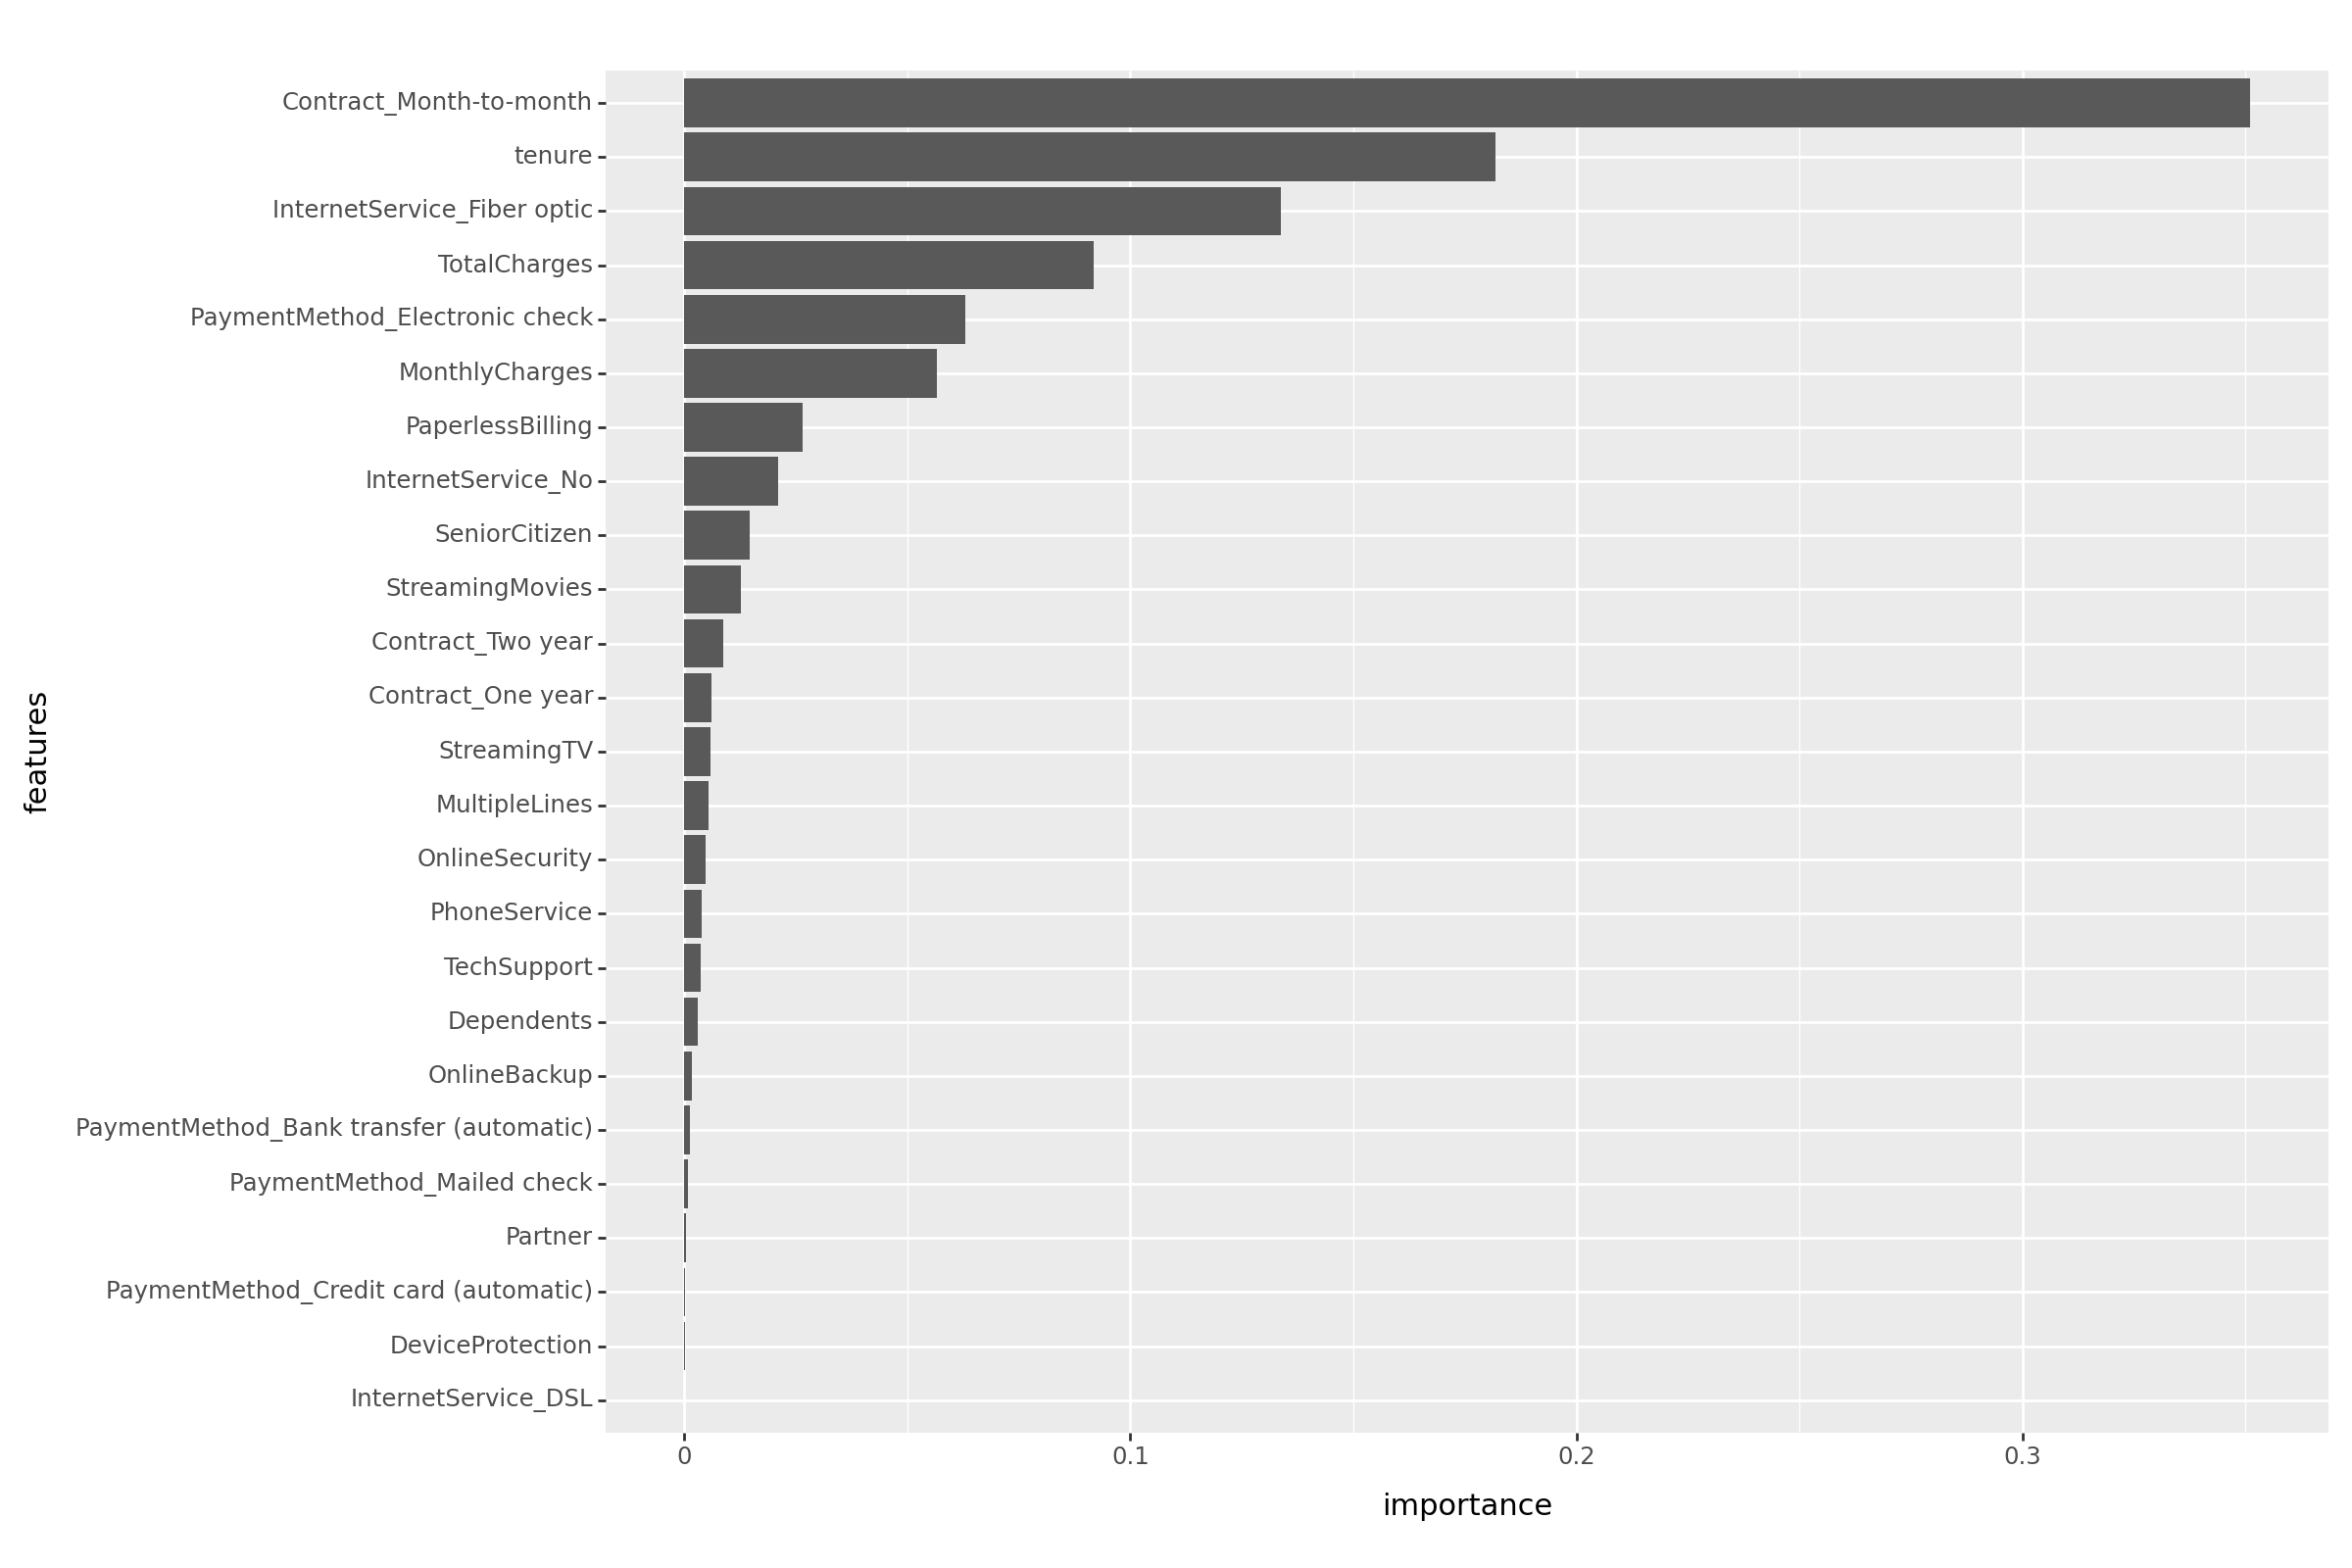

<Figure size 640x480 with 0 Axes>

In [632]:

# Feature importance
importance = pd.DataFrame({'features': X_train.columns.values, 'importance' : model_gb.feature_importances_})
importance_order = importance.sort_values('importance', ascending=True)['features'].to_list()

print(ggplot(importance, aes(x='features', y='importance')) + scale_x_discrete(limits=importance_order) 
    + geom_col() + coord_flip() + theme(figure_size=(12, 8))
)




              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1555
           1       0.63      0.51      0.57       555

    accuracy                           0.79      2110
   macro avg       0.73      0.70      0.72      2110
weighted avg       0.78      0.79      0.79      2110



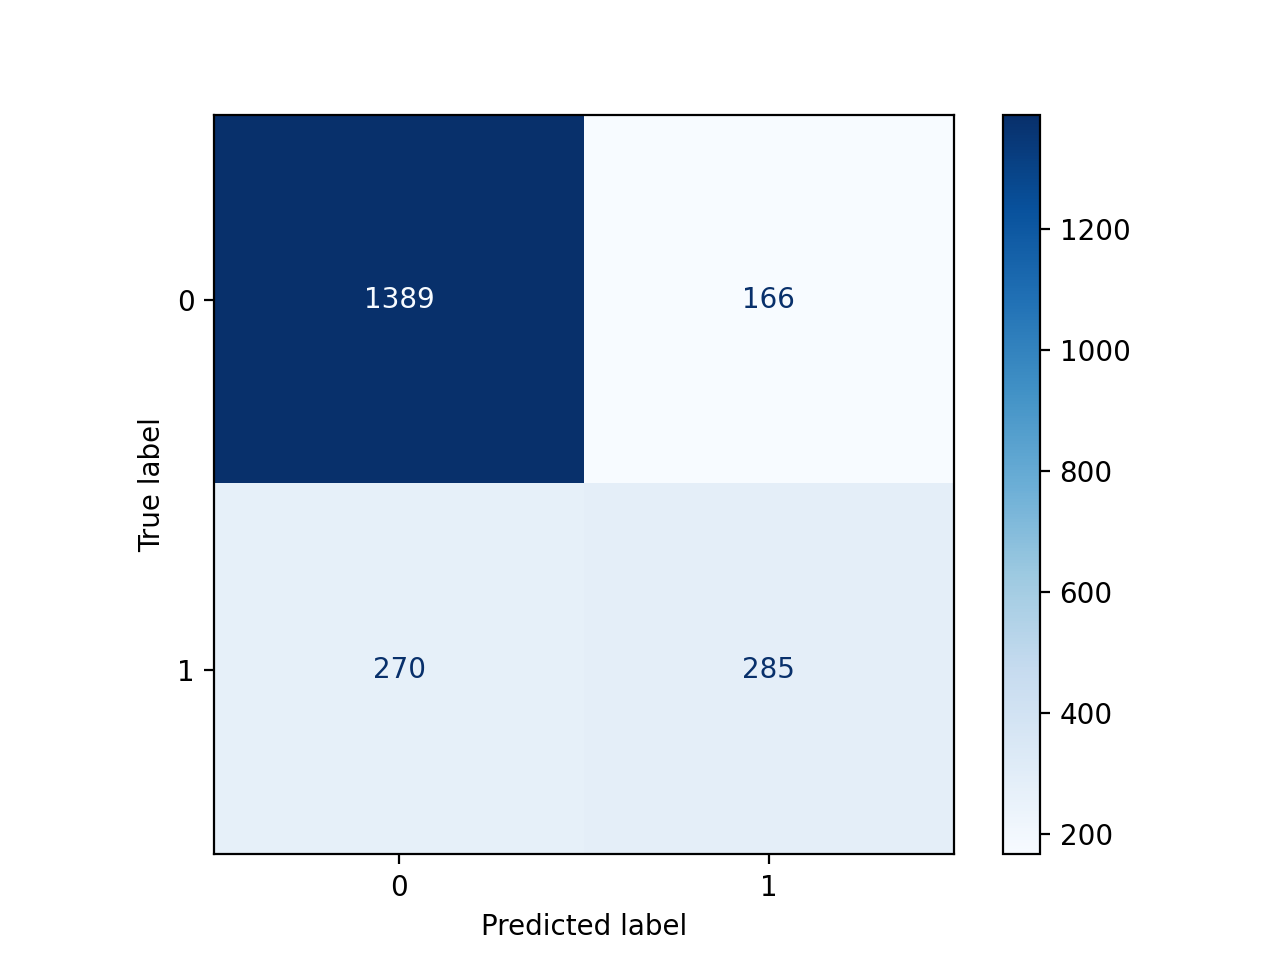

In [633]:
# Performance (test) ----------------------------
# Predictions
pred = model_gb.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_true=y_test, y_pred=pred)
ConfusionMatrixDisplay(cm).plot(cmap='Blues')


# Scores
print(classification_report(y_true=y_test, y_pred=pred))

# Store f1-score
model.append('GB')
set.append('test')
f1.append(round(f1_score(y_true=y_test, y_pred=pred),4))
Acur.append(round(accuracy_score(y_true=y_test, y_pred=pred),4))
Prec.append(round(precision_score(y_true=y_test, y_pred=pred),4))
Rec.append(round(recall_score(y_true=y_test, y_pred=pred),4))

In [634]:
# Building ROC curve and AUC --------------------------
# GB-train
## Probabilities of positive class
prob = model_gb.predict_proba(X_train)
prob_train_gb=prob
prob = prob[:, 1]

## AUC
gb_auc_train = roc_auc_score(y_train, prob)

## ROC curve
gb_fpr_train, gb_tpr_train, gb_thresholds_train = roc_curve(y_train, prob)

# GB-test
## Probabilities of positive class
prob = model_gb.predict_proba(X_test)
prob_test_gb=prob
prob = prob[:, 1]

## AUC
gb_auc_test = roc_auc_score(y_test, prob)

## ROC curve
gb_fpr_test, gb_tpr_test, gb_thresholds_test = roc_curve(y_test, prob)

## Histogram Gradient Boosting

In [635]:
# Grid-search

model_hgb = HistGradientBoostingClassifier(random_state=0)
param_grid = {'max_iter': [100,200,400],
                'max_depth': list(range(2,5)),
                'max_bins': [50,100,200,255]}
grid = GridSearchCV(model_hgb, param_grid, cv=cv, scoring=['accuracy', 'f1', 'precision', 'recall'], refit="f1", return_train_score=True)
grid.fit(X_train, y_train)

print(f'Optimal parameters: {grid.best_params_}')
print('Train accuracy: %.4f' % grid.score(X_train, y_train))
print('Test accuracy: %.4f' % grid.score(X_test, y_test))

Optimal parameters: {'max_bins': 50, 'max_depth': 2, 'max_iter': 200}
Train accuracy: 0.6256
Test accuracy: 0.5914


{'max_bins': 50, 'max_depth': 2, 'max_iter': 200}
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      3608
           1       0.70      0.56      0.63      1314

    accuracy                           0.82      4922
   macro avg       0.78      0.74      0.75      4922
weighted avg       0.81      0.82      0.81      4922



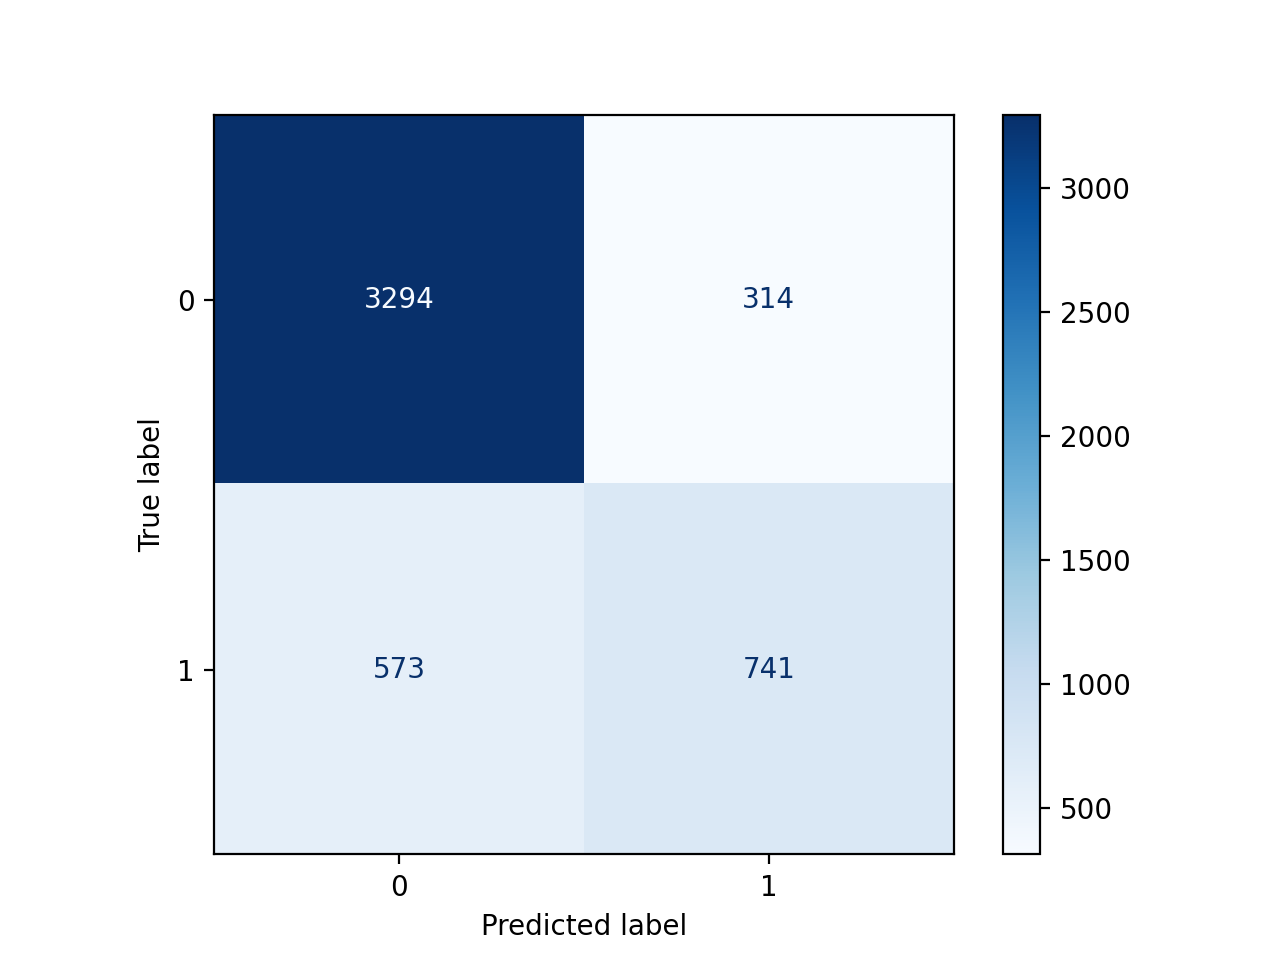

In [637]:
# Performance (train) -----------------------
from sklearn.ensemble import HistGradientBoostingClassifier

print(grid.best_params_) 
model_hgb = HistGradientBoostingClassifier(max_bins=grid.best_params_['max_bins'], max_iter=grid.best_params_['max_iter'], max_depth=grid.best_params_['max_depth'], random_state=0)

# Model fitting
model_hgb.fit(X_train, y_train)

# Predictions
pred = model_hgb.predict(X_train)

# Confusion matrix
cm = confusion_matrix(y_true=y_train, y_pred=pred)
ConfusionMatrixDisplay(cm).plot(cmap='Blues')


# Scores
print(classification_report(y_true=y_train, y_pred=pred))

# Store f1-score
model.append('HGB')
set.append('train')
f1.append(round(f1_score(y_true=y_train, y_pred=pred),4))
Acur.append(round(accuracy_score(y_true=y_train, y_pred=pred),4))
Prec.append(round(precision_score(y_true=y_train, y_pred=pred),4))
Rec.append(round(recall_score(y_true=y_train, y_pred=pred),4))

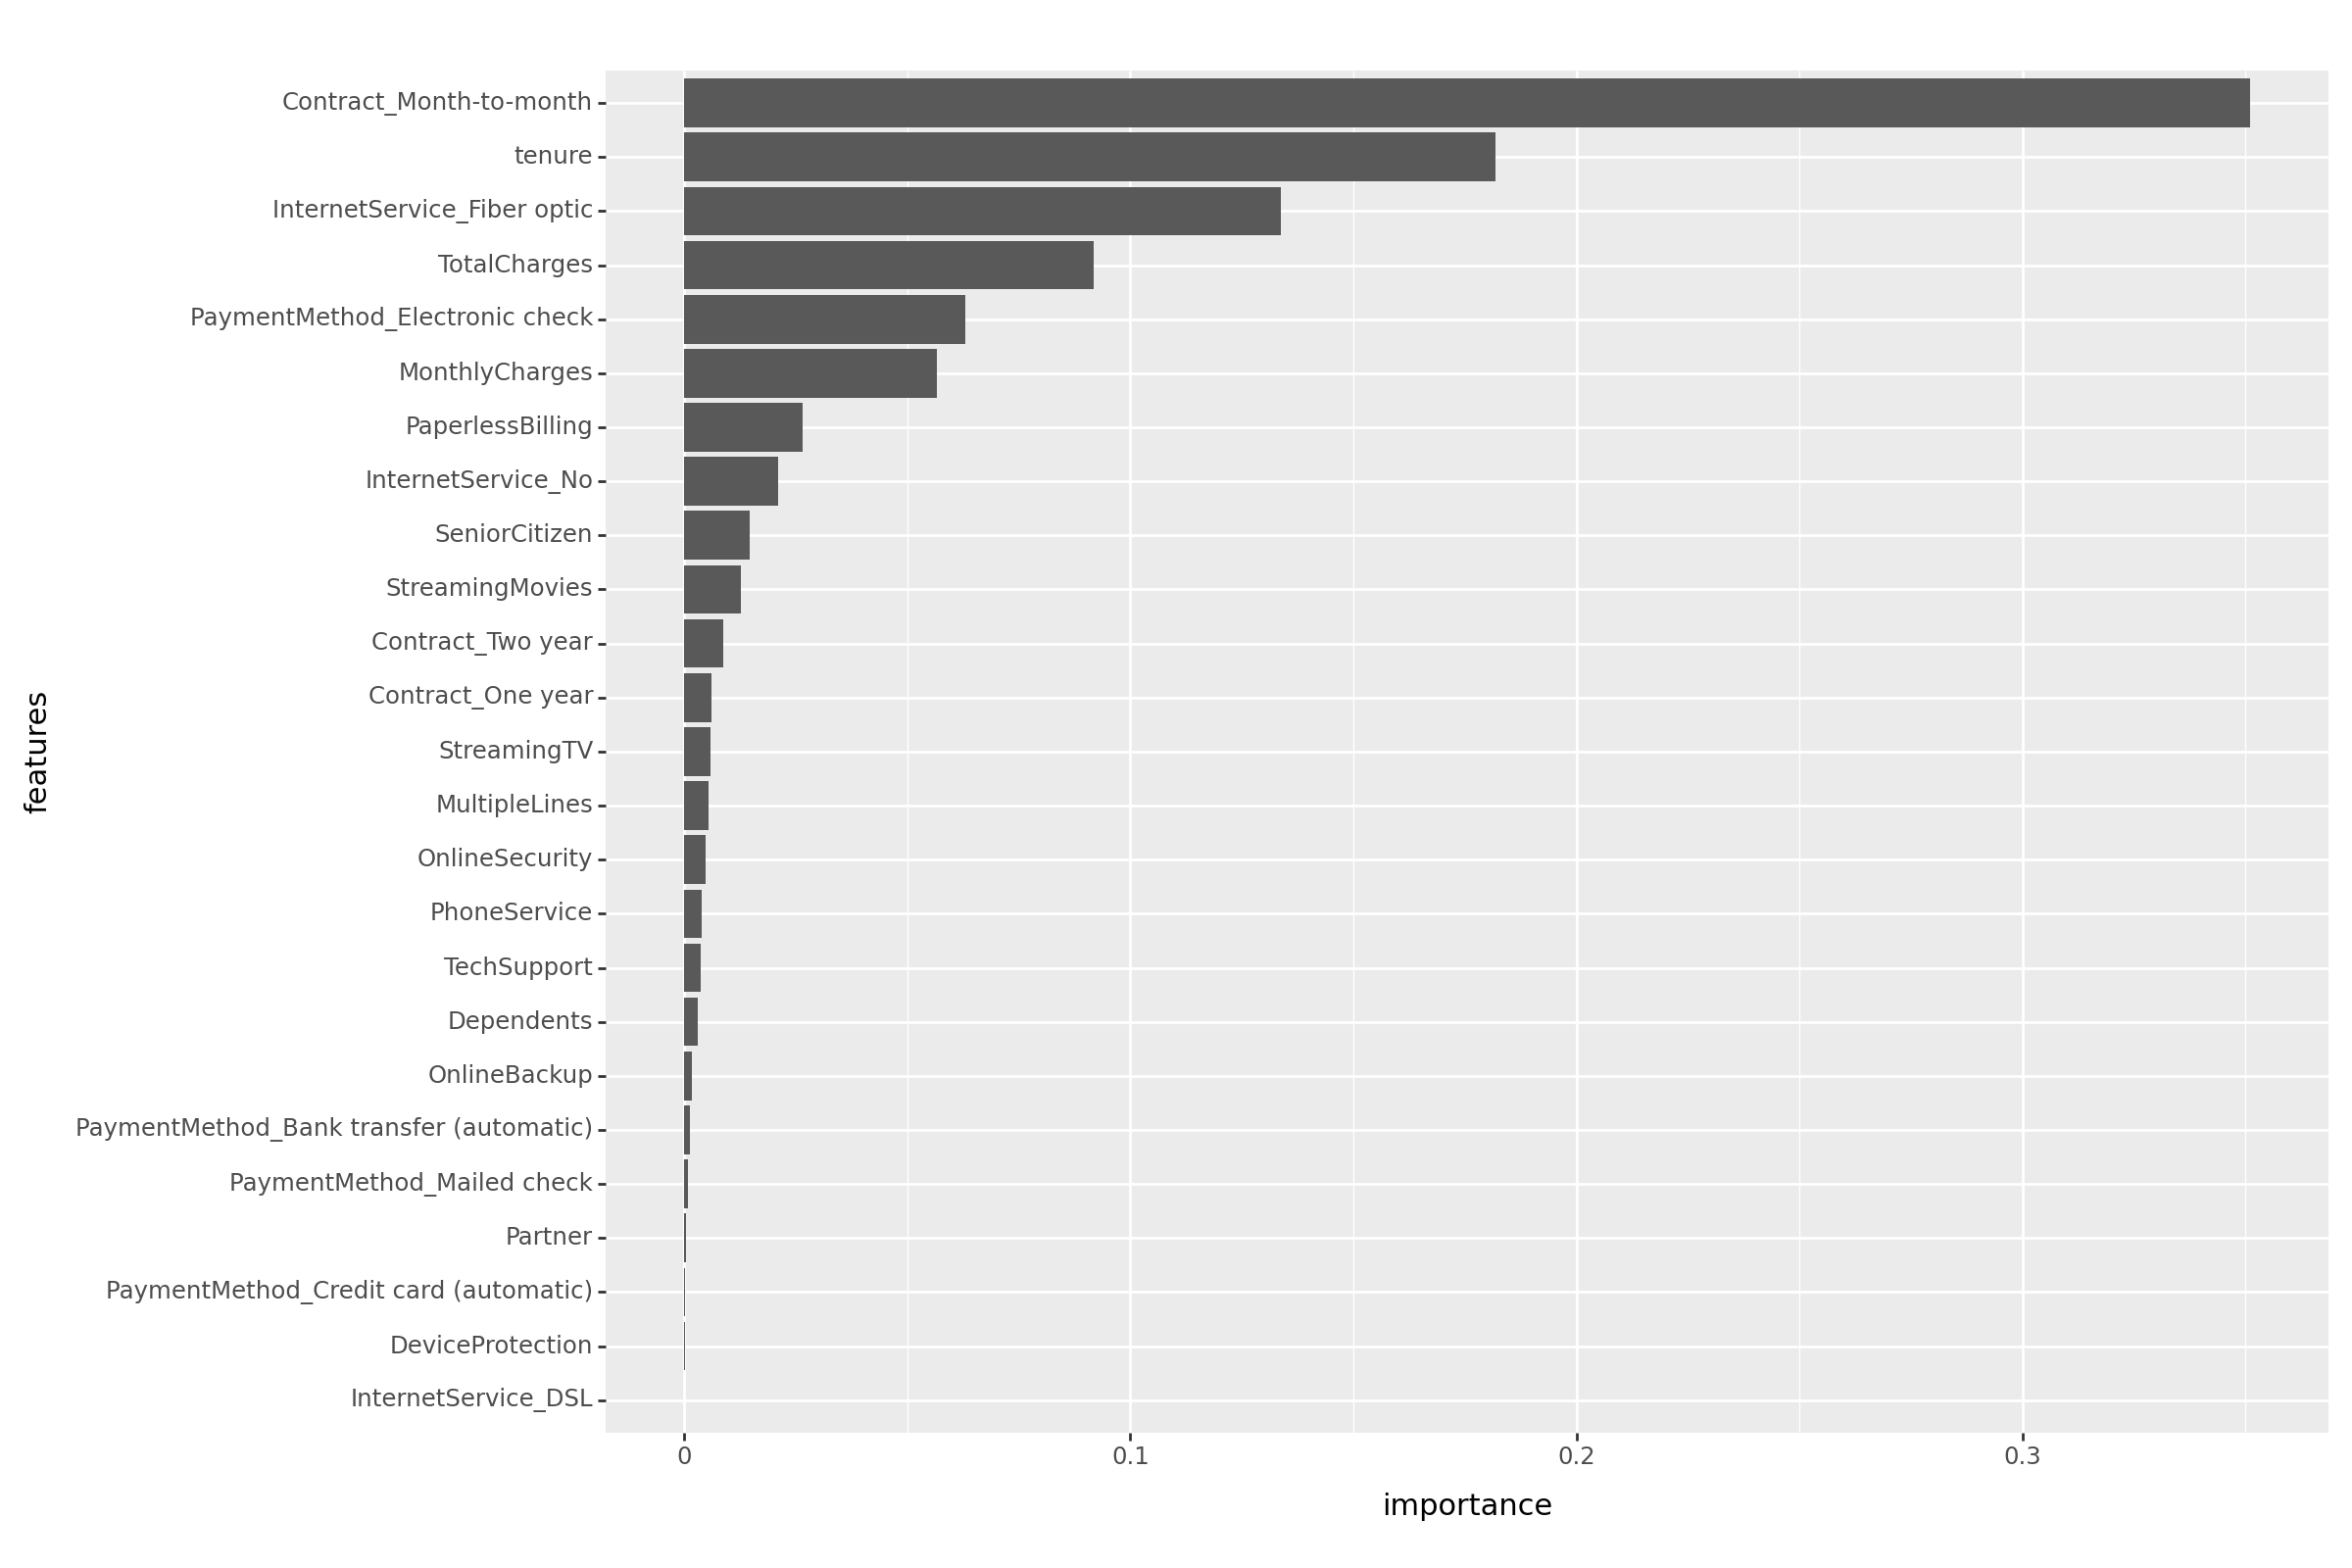

In [638]:

# Feature importance
importance = pd.DataFrame({'features': X_train.columns.values, 'importance' : model_gb.feature_importances_})
importance_order = importance.sort_values('importance', ascending=True)['features'].to_list()

print(ggplot(importance, aes(x='features', y='importance')) + scale_x_discrete(limits=importance_order) 
    + geom_col() + coord_flip() + theme(figure_size=(12, 8))
)


              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1555
           1       0.66      0.53      0.59       555

    accuracy                           0.81      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.80      0.81      0.80      2110



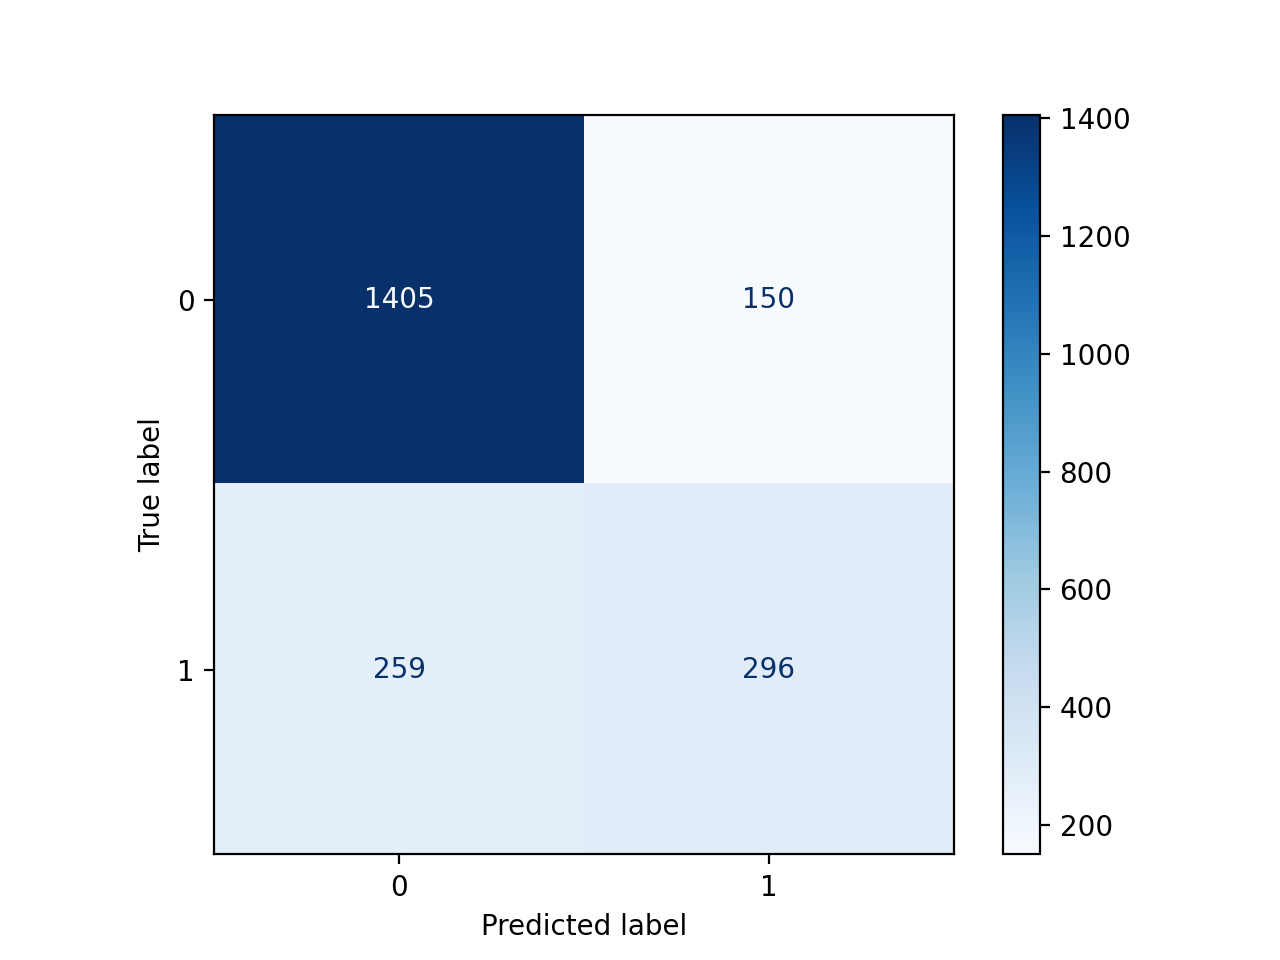

In [639]:
# Performance (test) ----------------------------
# Predictions
pred = model_hgb.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_true=y_test, y_pred=pred)
ConfusionMatrixDisplay(cm).plot(cmap='Blues')


# Scores
print(classification_report(y_true=y_test, y_pred=pred))

# Store f1-score
model.append('HGB')
set.append('test')
f1.append(round(f1_score(y_true=y_test, y_pred=pred),4))
Acur.append(round(accuracy_score(y_true=y_test, y_pred=pred),4))
Prec.append(round(precision_score(y_true=y_test, y_pred=pred),4))
Rec.append(round(recall_score(y_true=y_test, y_pred=pred),4))

In [640]:
# Building ROC curve and AUC -----------------------------
# Tree-train
## Probabilities of positive class
prob = model_hgb.predict_proba(X_train)
prob_train_hgb=prob
prob = prob[:, 1]

## AUC
hgb_auc_train = roc_auc_score(y_train, prob)

## ROC curve
hgb_fpr_train, hgb_tpr_train, hgb_thresholds_train = roc_curve(y_train, prob)

# Tree-test
## Probabilities of positive class
prob = model_hgb.predict_proba(X_test)
prob_test_hgb=prob
prob = prob[:, 1]

## AUC
hgb_auc_test = roc_auc_score(y_test, prob)

## ROC curve
hgb_fpr_test, hgb_tpr_test, hgb_thresholds_test = roc_curve(y_test, prob)

## Summary of results

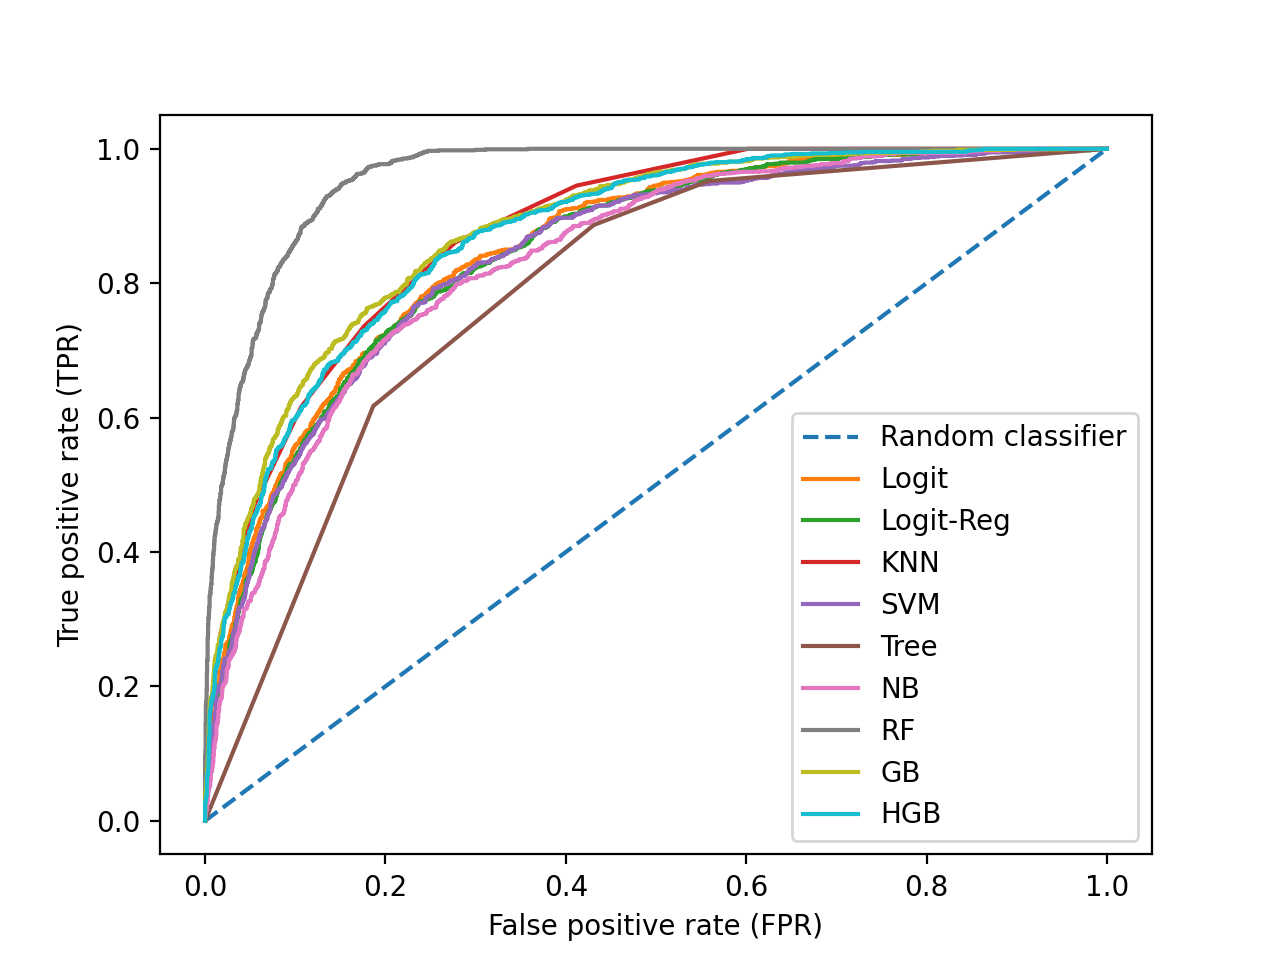

Train:
AUC logit = 0.8514
AUC logit-Reg = 0.8458
AUC KNN = 0.8775
AUC SVM = 0.8413
AUC tree = 0.7895
AUC NB = 0.8351
AUC RF = 0.9583
AUC GB = 0.8780
AUC HGB = 0.8712


<Figure size 640x480 with 0 Axes>

In [641]:
# Plot ROC curves - train ------------------------------------------------
plt.plot(RC_fpr, RC_tpr, linestyle='--', label='Random classifier')
plt.plot(logit_fpr_train, logit_tpr_train, label='Logit')
plt.plot(logitP_fpr_train, logitP_tpr_train, label='Logit-Reg')
#plt.plot(logitWOE_fpr_train, logitWOE_tpr_train, label='Logit-WOE')
plt.plot(knn_fpr_train, knn_tpr_train, label='KNN')
plt.plot(svm_fpr_train, svm_tpr_train, label='SVM')
plt.plot(tree_fpr_train, tree_tpr_train, label='Tree')
plt.plot(NB_fpr_train, NB_tpr_train, label='NB')
plt.plot(rf_fpr_train, rf_tpr_train, label='RF')
plt.plot(gb_fpr_train, gb_tpr_train, label='GB')
plt.plot(hgb_fpr_train, hgb_tpr_train, label='HGB')

plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')
#plt.title('ROC curves - train')
plt.legend()
plt.show()


print('Train:')
print('AUC logit = %.4f' % (logit_auc_train))
print('AUC logit-Reg = %.4f' % (logitP_auc_train))
#print('AUC logit-WOE = %.4f' % (logitWOE_auc_train))
print('AUC KNN = %.4f' % (knn_auc_train))
print('AUC SVM = %.4f' % (svm_auc_train))
print('AUC tree = %.4f' % (tree_auc_train))
print('AUC NB = %.4f' % (NB_auc_train))
print('AUC RF = %.4f' % (rf_auc_train))
print('AUC GB = %.4f' % (gb_auc_train))
print('AUC HGB = %.4f' % (hgb_auc_train))

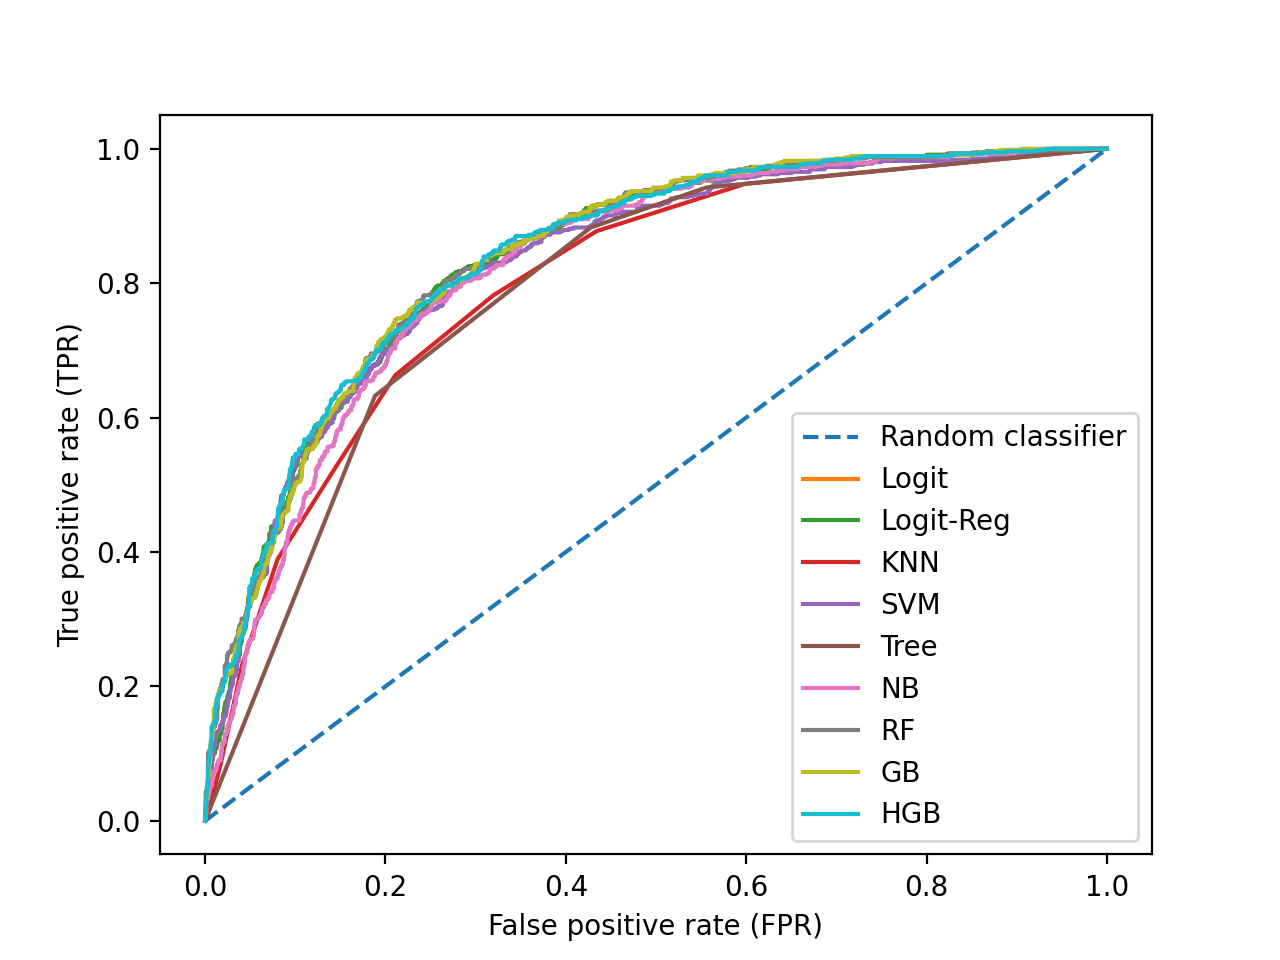

Test:
AUC logit = 0.8373
AUC logit-Reg = 0.8373
AUC KNN = 0.8000
AUC SVM = 0.8283
AUC tree = 0.7892
AUC NB = 0.8238
AUC RF = 0.8407
AUC GB = 0.8406
AUC HGB = 0.8410


<Figure size 640x480 with 0 Axes>

In [642]:
# Plot ROC curve - test ------------------------------------------------
plt.plot(RC_fpr, RC_tpr, linestyle='--', label='Random classifier')
plt.plot(logit_fpr_test, logit_tpr_test, label='Logit')
plt.plot(logitP_fpr_test, logitP_tpr_test, label='Logit-Reg')
#plt.plot(logitWOE_fpr_test, logitWOE_tpr_test, label='Logit-WOE')
plt.plot(knn_fpr_test, knn_tpr_test, label='KNN')
plt.plot(svm_fpr_test, svm_tpr_test, label='SVM')
plt.plot(tree_fpr_test, tree_tpr_test, label='Tree')
plt.plot(NB_fpr_test, NB_tpr_test, label='NB')
plt.plot(rf_fpr_test, rf_tpr_test, label='RF')
plt.plot(gb_fpr_test, gb_tpr_test, label='GB')
plt.plot(hgb_fpr_test, hgb_tpr_test, label='HGB')

plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')
#plt.title('ROC curves - test')
plt.legend()
plt.show()


print('Test:')
print('AUC logit = %.4f' % (logit_auc_test))
print('AUC logit-Reg = %.4f' % (logitP_auc_test))
#print('AUC logit-WOE = %.4f' % (logitWOE_auc_test))
print('AUC KNN = %.4f' % (knn_auc_test))
print('AUC SVM = %.4f' % (svm_auc_test))
print('AUC tree = %.4f' % (tree_auc_test))
print('AUC NB = %.4f' % (NB_auc_test))
print('AUC RF = %.4f' % (rf_auc_test))
print('AUC GB = %.4f' % (gb_auc_test))
print('AUC HGB = %.4f' % (hgb_auc_test))

In [643]:
# Summary table --------------------------------
table = pd.DataFrame({'model':model,'set':set,'f1-score':f1, 'Accuracy':Acur,'Precision':Prec,'Recall': Rec})

print(table.to_string(index=False))

# El Accuracy no es una buena metrica, dado que esta muy desbalanceado el dataset.

    model   set  f1-score  Accuracy  Precision  Recall
    logit train    0.6085    0.8086     0.6703  0.5571
    logit train    0.5897    0.8028     0.6514  0.5387
Logit-Reg train    0.5849    0.8054     0.6791  0.5137
Logit-Reg  test    0.5315    0.7886     0.6373  0.4559
      knn train    0.6457    0.8194     0.6778  0.6164
      knn  test    0.5448    0.7687     0.5648  0.5261
      svm train    0.5930    0.8017     0.6559  0.5411
      svm  test    0.5893    0.8038     0.6556  0.5351
       NB train    0.6209    0.7466     0.5170  0.7770
       NB  test    0.6154    0.7441     0.5088  0.7784
     tree train    0.5797    0.7611     0.5465  0.6172
     tree  test    0.5855    0.7645     0.5450  0.6324
       RF train    0.7555    0.8803     0.8311  0.6925
       RF  test    0.5653    0.7967     0.6458  0.5027
       GB train    0.6488    0.8293     0.7199  0.5906
       GB  test    0.5666    0.7934     0.6319  0.5135
      HGB train    0.6256    0.8198     0.7024  0.5639
      HGB 